<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-окружений" data-toc-modified-id="Импорт-окружений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт окружений</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span><ul class="toc-item"><li><span><a href="#Заполняем-пропуски-Model-по-и-бренду-и-году-регистрации-Brand,-RegistrationYear" data-toc-modified-id="Заполняем-пропуски-Model-по-и-бренду-и-году-регистрации-Brand,-RegistrationYear-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Заполняем пропуски <code>Model</code> по и бренду и году регистрации <code>Brand, RegistrationYear</code></a></span></li><li><span><a href="#Заполняем-пропуски-VehicleType-по-модели-и-бренду-авто-Model,-Brand" data-toc-modified-id="Заполняем-пропуски-VehicleType-по-модели-и-бренду-авто-Model,-Brand-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Заполняем пропуски <code>VehicleType</code> по модели и бренду авто <code>Model, Brand</code></a></span></li><li><span><a href="#Заполняем-пропуски-FuelType-по-типу-кузова-VehicleType" data-toc-modified-id="Заполняем-пропуски-FuelType-по-типу-кузова-VehicleType-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Заполняем пропуски <code>FuelType</code> по типу кузова <code>VehicleType</code></a></span></li><li><span><a href="#Заполняем-пропуски-Gearbox-по-типу" data-toc-modified-id="Заполняем-пропуски-Gearbox-по-типу-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Заполняем пропуски <code>Gearbox</code> по типу</a></span></li><li><span><a href="#Repaired" data-toc-modified-id="Repaired-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Repaired</a></span></li><li><span><a href="#Power" data-toc-modified-id="Power-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>Power</a></span></li></ul></li><li><span><a href="#Избавляемся-от-выбросов" data-toc-modified-id="Избавляемся-от-выбросов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Избавляемся от выбросов</a></span></li><li><span><a href="#DataCrawled" data-toc-modified-id="DataCrawled-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DataCrawled</a></span></li><li><span><a href="#RegistrationYear" data-toc-modified-id="RegistrationYear-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>RegistrationYear</a></span></li><li><span><a href="#Power" data-toc-modified-id="Power-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Power</a></span></li><li><span><a href="#Price" data-toc-modified-id="Price-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Price</a></span></li><li><span><a href="#Month-Registration-|-PucturesNumber" data-toc-modified-id="Month-Registration-|-PucturesNumber-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Month Registration | PucturesNumber</a></span></li><li><span><a href="#Датасет-после-обработки" data-toc-modified-id="Датасет-после-обработки-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Датасет после обработки</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Кодирование-и-масштабирование-признаков" data-toc-modified-id="Кодирование-и-масштабирование-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Кодирование и масштабирование признаков</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Затраты-по-времени" data-toc-modified-id="Затраты-по-времени-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Затраты по времени</a></span></li></ul></li></ul></div>

# Определение стоимости автомобилей

##  Импорт окружений

In [65]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import tqdm
from numpy.random import RandomState
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, validation_curve, train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
import lightgbm as lgb
import time
import re

## Подготовка данных

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv')

In [3]:
df[:5]

DateCrawled  Price VehicleType  RegistrationYear Gearbox  Power  \
0  2016-03-24 11:52:17    480         NaN              1993  manual      0   
1  2016-03-24 10:58:45  18300       coupe              2011  manual    190   
2  2016-03-14 12:52:21   9800         suv              2004    auto    163   
3  2016-03-17 16:54:04   1500       small              2001  manual     75   
4  2016-03-31 17:25:20   3600       small              2008  manual     69   

   Model  Kilometer  RegistrationMonth  FuelType       Brand Repaired  \
0   golf     150000                  0    petrol  volkswagen      NaN   
1    NaN     125000                  5  gasoline        audi      yes   
2  grand     125000                  8  gasoline        jeep      NaN   
3   golf     150000                  6    petrol  volkswagen       no   
4  fabia      90000                  7  gasoline       skoda       no   

           DateCreated  NumberOfPictures  PostalCode             LastSeen  
0  2016-03-24 00:00:00                 0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00                 0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00                 0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00                 0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00                 0       60437  2016-04-06 10:17:21

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
type_dict = {
    'DateCrawled': 'datetime64[ns]',
    'DateCreated': 'datetime64[ns]',
    'LastSeen': 'datetime64[ns]'
}
df = df.astype(type_dict)

In [6]:
df.describe()

Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.000000   
mean     4416.656776       2004.234448     110.094337  128211.172535   
std      4514.158514         90.227958     189.850405   37905.341530   
min         0.000000       1000.000000       0.000000    5000.000000   
25%      1050.000000       1999.000000      69.000000  125000.000000   
50%      2700.000000       2003.000000     105.000000  150000.000000   
75%      6400.000000       2008.000000     143.000000  150000.000000   
max     20000.000000       9999.000000   20000.000000  150000.000000   

       RegistrationMonth  NumberOfPictures     PostalCode  
count      354369.000000          354369.0  354369.000000  
mean            5.714645               0.0   50508.689087  
std             3.726421               0.0   25783.096248  
min             0.000000               0.0    1067.000000  
25%             3.000000               0.0   30165.000000  
50%             6.000000               0.0   49413.000000  
75%             9.000000               0.0   71083.000000  
max            12.000000               0.0   99998.000000

In [7]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

<span style=color:blue>**С первого взгляда на датасет видны недочеты: цена машины равная нулю, год регистрации 1000-ого года или будущего, мощность автомобиля равная нулю и свыше 10 000, полное отсутсвие фотографий, а также множество пропусков и некоректные типы данных**

### Работа с пропусками

#### Заполняем пропуски `Model` по и бренду и году регистрации `Brand, RegistrationYear`

In [8]:
#Создадим шаблон сводной таблицы наиболее частой модели бренда для каждого года
mode_model_year = pd.DataFrame(columns=df['RegistrationYear'].unique(), index=df['Brand'].unique())

#Заполним таблицу
for years in tqdm_notebook(df['RegistrationYear'].unique()):
    for brand in df['Brand'].unique():
        model = df.query('RegistrationYear == @years & Brand == @brand').Model.mode()
        try:
            mode_model_year.at[brand, years] = model[0]
        except:
            mode_model_year.at[brand, years] = np.nan
            

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\2084676657.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for years in tqdm_notebook(df['RegistrationYear'].unique()):


  0%|          | 0/151 [00:00<?, ?it/s]

In [9]:
mode_model_year[:3]

1993   2011   2004      2001   2008   1995    1980   2014  \
volkswagen      golf   golf   golf      golf   golf   golf  kaefer   golf   
audi              80     a4     a4        a4     a4     a4     100     a1   
jeep        wrangler  other  grand  cherokee  other  grand   other  other   

             1998   2005  ... 1602 7800 9229 1947 1927 7100 8200 1946 7500  \
volkswagen   golf   golf  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
audi           a4     a4  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
jeep        grand  grand  ...  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

           3500  
volkswagen  NaN  
audi        NaN  
jeep        NaN  

[3 rows x 151 columns]

In [10]:
for brand in tqdm_notebook(df['Brand'].unique()):
    for year in df['RegistrationYear'].unique():
        df.loc[(df['Brand'] == brand) & (df['RegistrationYear'] == year) & (df['Model'].isna()), 'Model'] = \
        mode_model_year.loc[brand, year]

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\3542994631.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for brand in tqdm_notebook(df['Brand'].unique()):


  0%|          | 0/40 [00:00<?, ?it/s]

In [11]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                 3442
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

<span style=color:blue>**Часть отсуствующих моделей авто можно заменить наиболее частым выпуском моделей каждого бренда в зависимости от года**

#### Заполняем пропуски `VehicleType` по модели и бренду авто `Model, Brand`

In [12]:
df['Model_Brand'] = df['Brand'] + " " + df['Model']

In [13]:
vehicle_model_df = df.pivot_table(index='Model_Brand', columns='VehicleType', aggfunc='size')
vehicle_model_df[:3]

VehicleType     bus  convertible  coupe  other  sedan  small  suv  wagon
Model_Brand                                                             
alfa_romeo 145  NaN          NaN    2.0    1.0   13.0   19.0  NaN    NaN
alfa_romeo 147  NaN          NaN   30.0    7.0  361.0   99.0  1.0    4.0
alfa_romeo 156  NaN          NaN   13.0    1.0  318.0    6.0  NaN  300.0

In [14]:
for auto in tqdm_notebook(vehicle_model_df.index):
    df.loc[(df['Model_Brand'] == auto) & (df['VehicleType'].isna()), 'VehicleType'] = \
    vehicle_model_df.loc[auto].idxmax()

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\1132323887.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for auto in tqdm_notebook(vehicle_model_df.index):


  0%|          | 0/297 [00:00<?, ?it/s]

In [15]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType           1088
RegistrationYear         0
Gearbox              19833
Power                    0
Model                 3442
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
Model_Brand           3442
dtype: int64

<span style=color:blue>**Аналогичным способом можно заполнить типы кузова, только за исходные столбцы возьмем модели**

#### Заполняем пропуски `FuelType` по типу кузова `VehicleType`

In [16]:
fuel_vehicle_df = df.pivot_table(index='VehicleType', columns='FuelType', aggfunc='size')
fuel_vehicle_df

FuelType       cng  electric  gasoline  hybrid     lpg  other   petrol
VehicleType                                                           
bus          258.0       2.0   18716.0     7.0   571.0   12.0  10417.0
convertible    3.0       6.0    1517.0     NaN   242.0    6.0  17683.0
coupe          3.0       6.0    2105.0    19.0   319.0    3.0  13162.0
other         14.0      12.0    1454.0     2.0    28.0   42.0   1399.0
sedan         51.0       9.0   26914.0   131.0  1816.0   62.0  67206.0
small         91.0      49.0    7428.0    39.0   529.0   34.0  73120.0
suv            4.0       NaN    6647.0    11.0   588.0    9.0   4670.0
wagon        141.0       5.0   33891.0    23.0  1212.0   26.0  28553.0

AxesSubplot(0.125,0.11;0.775x0.77)


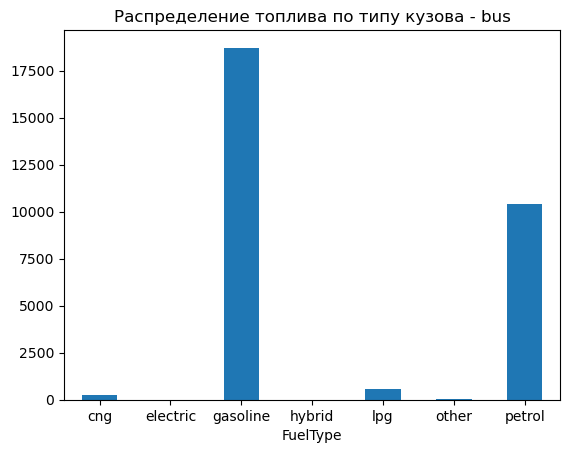

AxesSubplot(0.125,0.11;0.775x0.77)


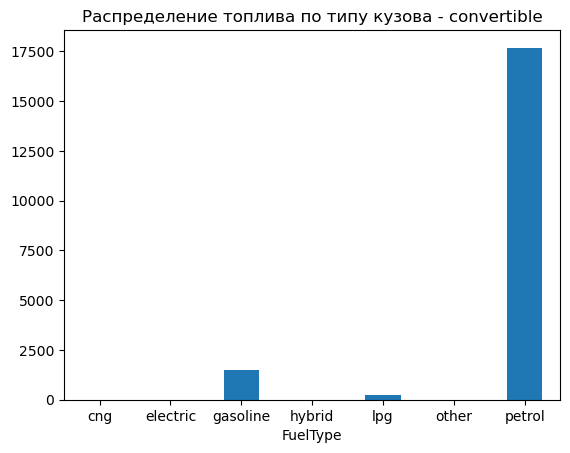

AxesSubplot(0.125,0.11;0.775x0.77)


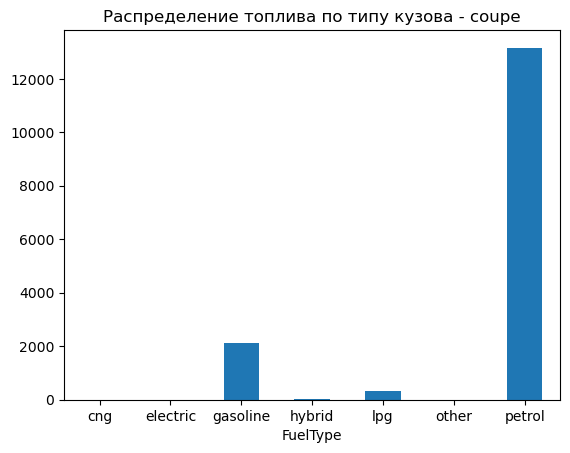

AxesSubplot(0.125,0.11;0.775x0.77)


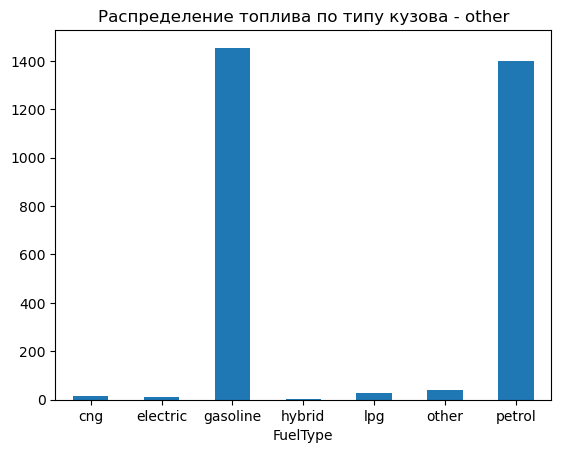

AxesSubplot(0.125,0.11;0.775x0.77)


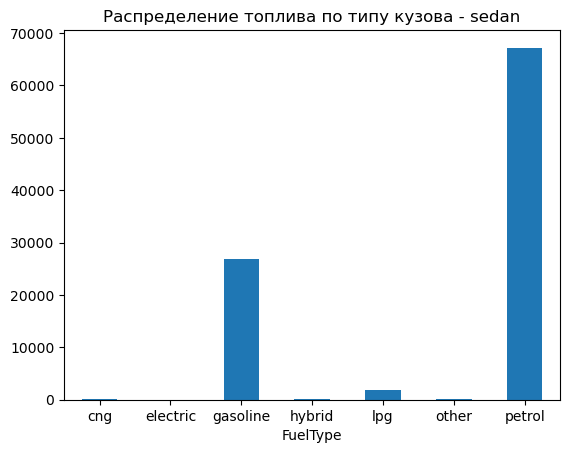

AxesSubplot(0.125,0.11;0.775x0.77)


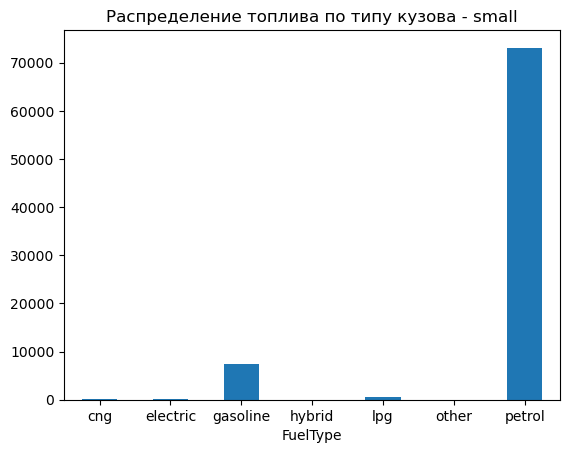

AxesSubplot(0.125,0.11;0.775x0.77)


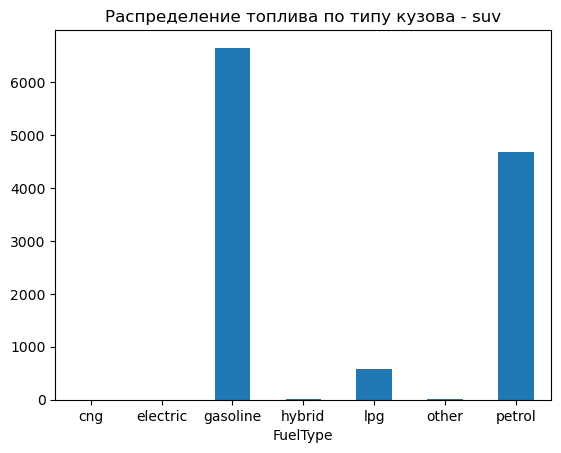

AxesSubplot(0.125,0.11;0.775x0.77)


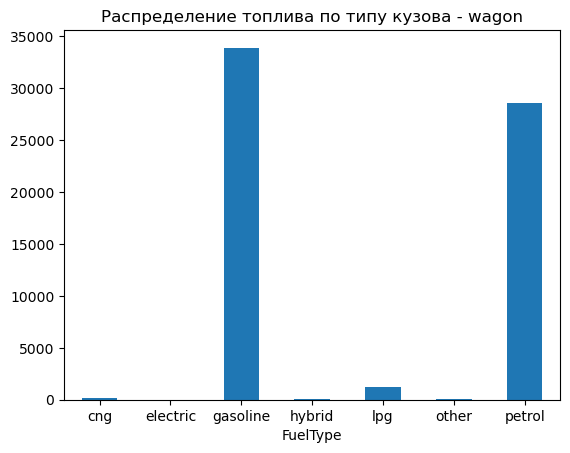

In [17]:
for i in range(len(fuel_vehicle_df)):
    print(fuel_vehicle_df.iloc[i].plot(kind='bar', rot=0))
    plt.title('Распределение топлива по типу кузова - {}'.format(fuel_vehicle_df.index[i]))
    plt.show()

In [18]:
for auto in tqdm_notebook(fuel_vehicle_df.index):
    df.loc[(df['VehicleType'] == auto) & (df['FuelType'].isna()), 'FuelType'] = \
    fuel_vehicle_df.loc[auto].idxmax()

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\2568823539.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for auto in tqdm_notebook(fuel_vehicle_df.index):


  0%|          | 0/8 [00:00<?, ?it/s]

In [19]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType           1088
RegistrationYear         0
Gearbox              19833
Power                    0
Model                 3442
Kilometer                0
RegistrationMonth        0
FuelType               881
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
Model_Brand           3442
dtype: int64

<span style=color:blue>**Пропуски с типом топлива можно отталкиваясь логически, большие авто как: автобус чаще используют газ, нежели бензин, также это подтверждается чартом выше, по этому принципу заполним пропуски с топливом**

#### Заполняем пропуски `Gearbox` по типу

<AxesSubplot:ylabel='RegistrationYear'>

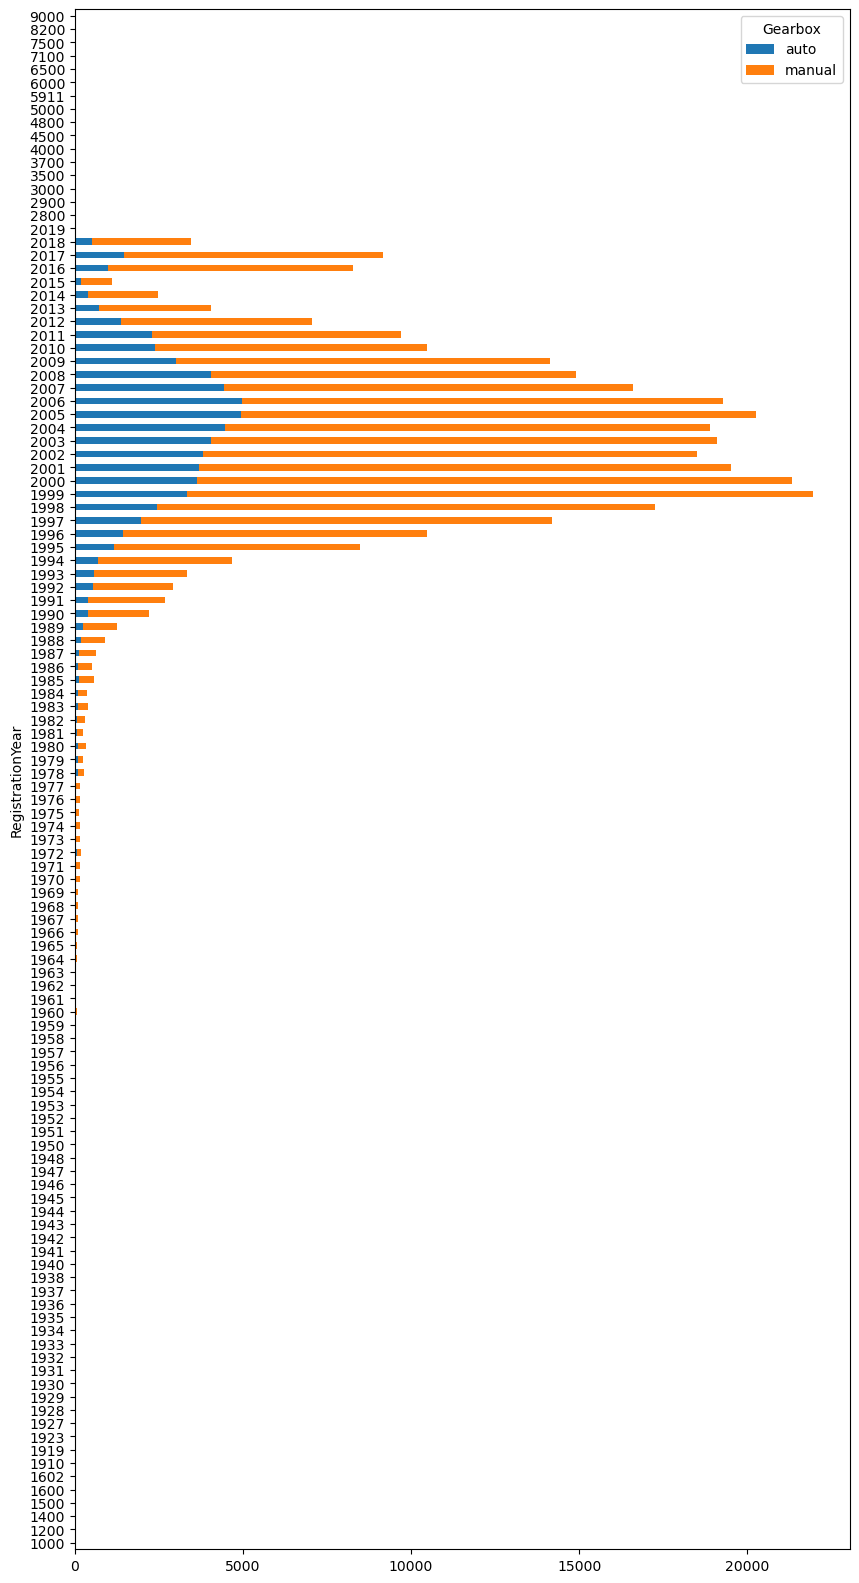

In [20]:
df.pivot_table(index='RegistrationYear', columns='Gearbox', aggfunc='size').plot.barh(figsize=(10, 20), stacked=True, rot=0)

In [21]:
df.loc[(df['RegistrationYear'] < 1987) & (df['Gearbox'].isna()), 'Gearbox'] = 'manual'

<span style=color:blue>**На основании чарта выше, видно что автоматических КПП до 1987 еще не было, или было в мизерном количестве, по это признаку можем сделать первый шаг заполнения**

In [22]:
mode_mode_gearbox = df.pivot_table(index=['Model', 'VehicleType'], columns='Gearbox', aggfunc='size')
mode_mode_gearbox[:5]

Gearbox            auto  manual
Model VehicleType              
100   convertible   1.0     NaN
      coupe         NaN     2.0
      other         NaN     1.0
      sedan        47.0   254.0
      wagon        15.0    94.0

In [23]:
for model in tqdm_notebook(df['Model'].dropna().unique(), desc='Fill process'):
    for vehicle in df['VehicleType'].dropna().unique():
        try:
            df.loc[(df['Model'] == model) & (df['VehicleType'] == vehicle) & (df['Gearbox'].isna()), 'Gearbox'] = \
            mode_mode_gearbox.loc[model, vehicle].idxmax()
        except:
            df.loc[(df['Model'] == model) & (df['VehicleType'] == vehicle) & (df['Gearbox'].isna()), 'Gearbox'] = np.nan

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\417029830.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for model in tqdm_notebook(df['Model'].dropna().unique(), desc='Fill process'):


Fill process:   0%|          | 0/250 [00:00<?, ?it/s]

In [24]:
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType           1088
RegistrationYear         0
Gearbox                881
Power                    0
Model                 3442
Kilometer                0
RegistrationMonth        0
FuelType               881
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
Model_Brand           3442
dtype: int64

<span style=color:blue>**Остальные пропуски можно заполнить по принципу нахождения наиболее часто встречающего типа коробки на основании модели и кузова автомобиля**

#### Repaired

In [25]:
def reapaired_bool(repair):
    if repair == 'yes':
        return 1
    elif repair == 'no':
        return 0
    else:
        return np.nan

df['Repaired'] = df['Repaired'].apply(reapaired_bool)

<span style=color:blue>**Колонку ремонта можно сделать булевым значением для удобства, где 0 - машина не ремонтировалась, 1 - машина была в ремонте**

In [26]:
model_km = df.pivot_table(index=['Model', 'Kilometer'], columns='Repaired', aggfunc='size')

model_km['Share'] = model_km[1.0] / (model_km[0.0] + model_km[1.0])
model_km.sort_values(by='Share', ascending=False)[:5]

Repaired            0.0  1.0     Share
Model    Kilometer                    
carisma  5000       2.0  6.0  0.750000
sorento  5000       1.0  3.0  0.750000
voyager  5000       2.0  6.0  0.750000
stilo    5000       1.0  3.0  0.750000
berlingo 5000       2.0  5.0  0.714286

In [27]:
for model in tqdm_notebook(df['Model'].dropna().unique()):
    for km in df['Kilometer'].dropna().unique():
        try:
            df.loc[(df['Model'] == model) & (df['Kilometer'] == km) & (df['Repaired'].isna()), 'Repaired'] = \
            model_km.loc[model, km].idxmax()
        except:
            df.loc[(df['Model'] == model) & (df['VehicleType'] == vehicle) & (df['Gearbox'].isna()), 'Gearbox'] = np.nan

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\2494024780.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for model in tqdm_notebook(df['Model'].dropna().unique()):


  0%|          | 0/250 [00:00<?, ?it/s]

In [28]:
df.isna().sum()

DateCrawled             0
Price                   0
VehicleType          1088
RegistrationYear        0
Gearbox               881
Power                   0
Model                3442
Kilometer               0
RegistrationMonth       0
FuelType              881
Brand                   0
Repaired             1492
DateCreated             0
NumberOfPictures        0
PostalCode              0
LastSeen                0
Model_Brand          3442
dtype: int64

<span style=color:blue>**Пропуски с ремонтом можно заполнить на основании модели и пробега автомобиля**

#### Power

### Избавляемся от выбросов

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\1616834652.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, elem in tqdm_notebook(enumerate(numeric_data)):


0it [00:00, ?it/s]

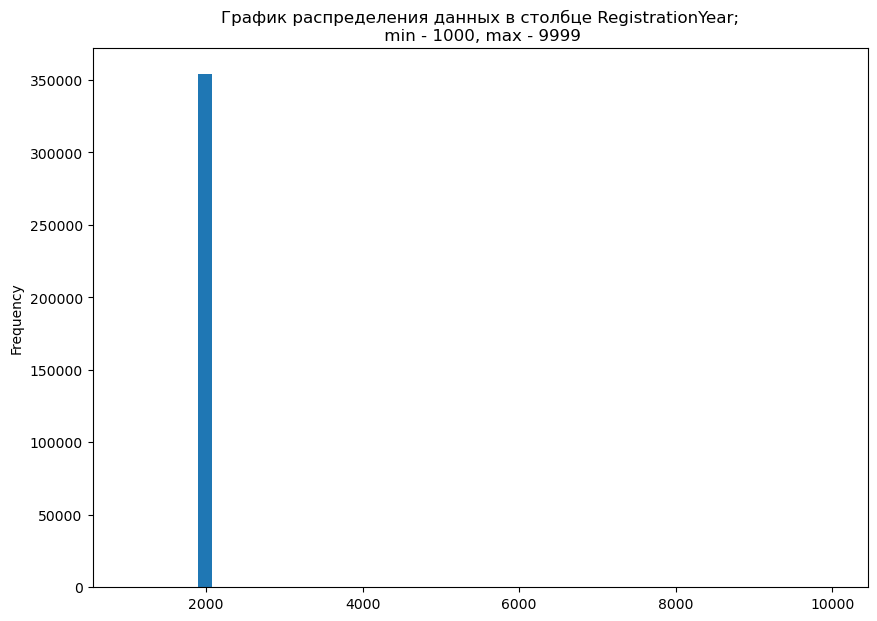

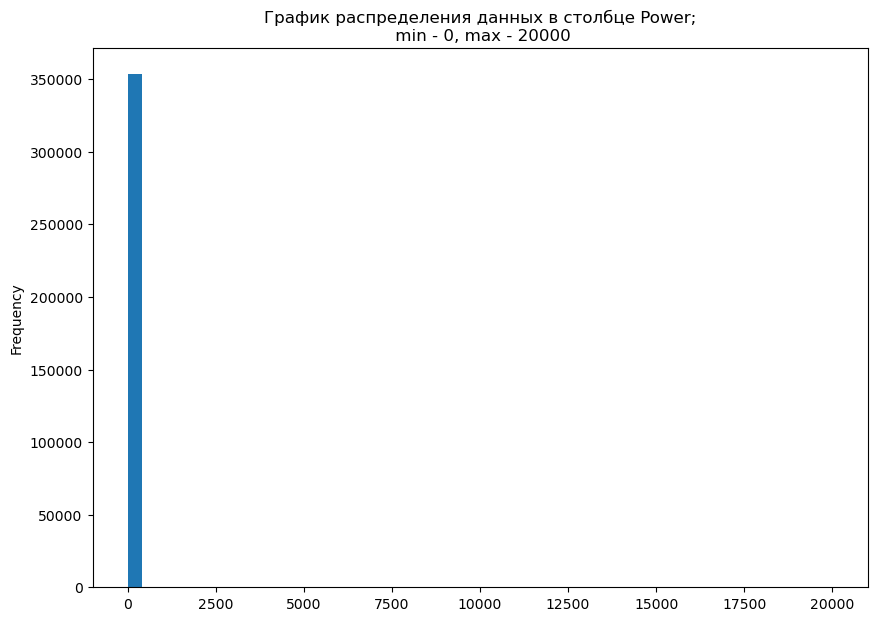

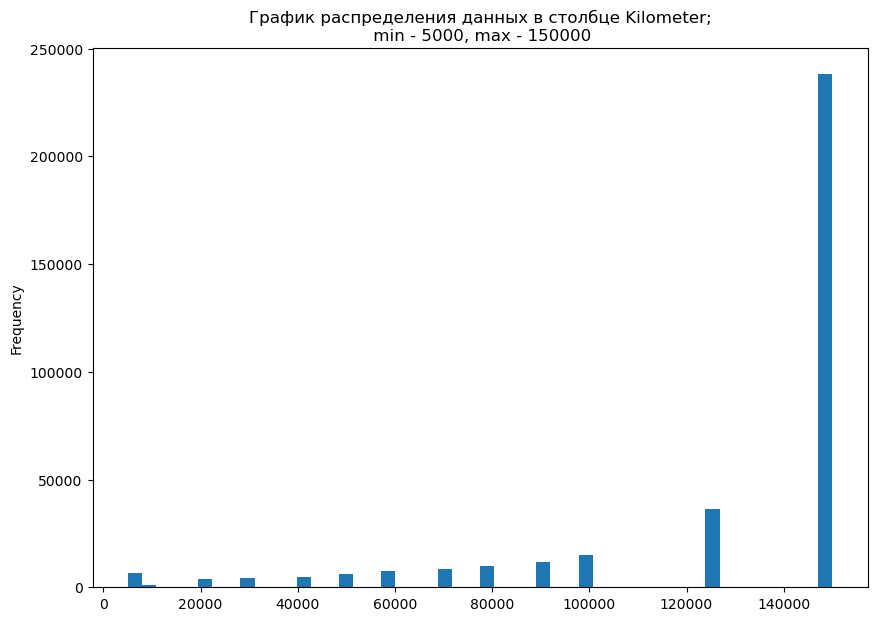

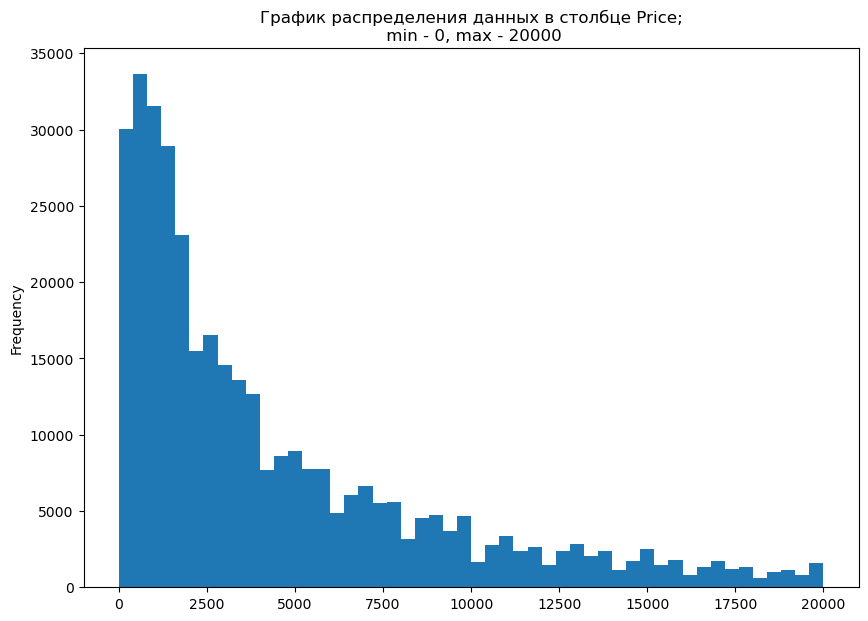

In [29]:
numeric_data = ['RegistrationYear', 'Power', 'Kilometer', 'Price']
for i, elem in tqdm_notebook(enumerate(numeric_data)):
    elem_max = df[elem].max()
    elem_min = df[elem].min()
    
    df[numeric_data[i]].plot(kind='hist', bins=50, figsize=(10, 7))
    plt.title("График распределения данных в столбце {0};\n min - {1}, max - {2}".
              format(elem, elem_min, elem_max))
    plt.show()

### DataCrawled

In [30]:
df = df.query('DateCreated >= "2016-01-01"')

In [31]:
df['DateCreated'].max()

Timestamp('2016-04-07 00:00:00')

### RegistrationYear

In [32]:
print('Количество строк с выбросами в столбце RegistrationYear - {}'.format(
    df.query('RegistrationYear > 2016 | RegistrationYear < 2000').shape[0]))

Количество строк с выбросами в столбце RegistrationYear - 116775


In [33]:
df = df.query('RegistrationYear <= 2016 & RegistrationYear >= 2000')

<AxesSubplot:>

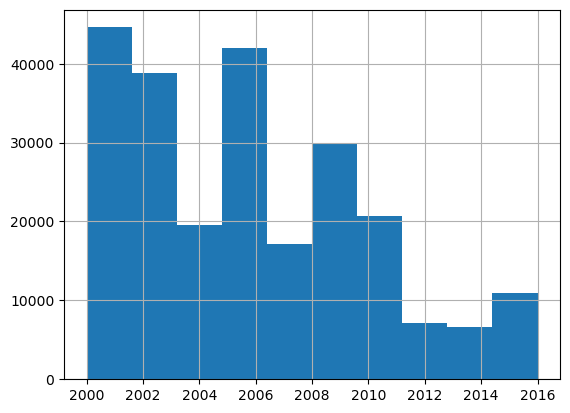

In [34]:
df['RegistrationYear'].hist()

<span style=color:blue>**C учетом изменения цен из года в год и актуальности моделей, цена может сильно меняться, за старт регистрации возьмем нулевые года**

### Power

In [35]:
df = df.query('Power < Power.quantile(.995)')

In [36]:
power_table = df.query('Power > 0').groupby('Model_Brand')[['Power']].mean().astype(int)
power_table[:5]

Power
Model_Brand            
alfa_romeo 145      107
alfa_romeo 147      121
alfa_romeo 156      150
alfa_romeo 159      172
alfa_romeo other    151

In [37]:
null_power = df[df['Power'] == 0]['Model_Brand'].value_counts().sort_values()

In [38]:
for auto in null_power.index:
    if auto not in power_table.index:
        print(f'Have not {auto}')
        df = df[df['Model_Brand'] != auto]

Have not land_rover other
Have not trabant other
Have not lancia kappa
Have not lada samara


In [39]:
for auto in df['Model_Brand'].dropna().unique():
    df.loc[(df['Model_Brand'] == auto) & (df['Power'] == 0), 'Power'] = \
    power_table.loc[auto, 'Power']

<AxesSubplot:>

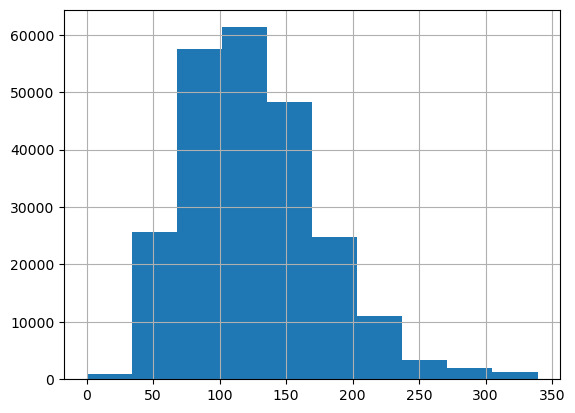

In [40]:
df['Power'].hist()

<span style=color:blue>**Избавимся от 0.5% выбросов, это значение находиться на уровне 350 л.с. максимальная цена в нашем датасете 20 000, цена не является адекватной для машины такой мощности на основании цен от производителей**

### Price

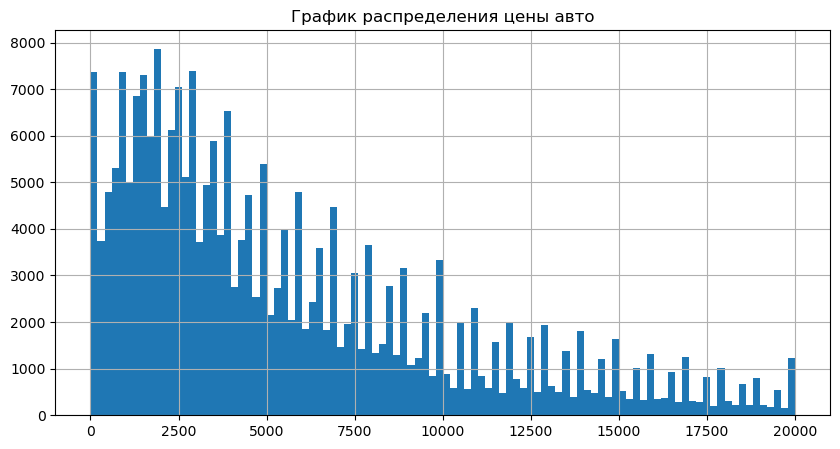

Количество автомобилей с ценой в райне 0 - 7948


In [41]:
df['Price'].hist(figsize=(10, 5), bins=100)
plt.title('График распределения цены авто')
plt.show()
print('Количество автомобилей с ценой в райне 0 - {}'.format(df['Price'].value_counts().sort_index()[:100].sum()))

In [42]:
price_km = df.pivot_table(index='Model', columns='RegistrationYear', values='Price', aggfunc='mean').round(0)
price_km[:5]

RegistrationYear    2000    2001    2002    2003    2004    2005    2006  \
Model                                                                      
100                152.0     NaN     NaN     NaN     NaN     NaN     NaN   
145               1072.0   750.0     0.0     NaN     NaN     NaN     NaN   
147                793.0  1308.0  1496.0  1634.0  2632.0  2250.0  3420.0   
156               1044.0  1009.0  1707.0  2121.0  2647.0  2346.0  2925.0   
159               2450.0     NaN     NaN     NaN     NaN  4643.0  5293.0   

RegistrationYear    2007    2008    2009     2010     2011     2012  2013  \
Model                                                                       
100               7190.0     NaN     NaN      NaN      NaN      NaN   NaN   
145                  NaN     NaN     NaN      NaN      NaN      NaN   NaN   
147               3776.0  5160.0  5845.0   5820.0      NaN      NaN   NaN   
156                  0.0     NaN  8700.0      NaN      NaN      NaN   NaN   
159               6205.0  8465.0  9971.0  12040.0  12097.0  14999.0   NaN   

RegistrationYear  2014    2015    2016  
Model                                   
100                NaN     NaN   680.0  
145                NaN     NaN   125.0  
147                NaN     0.0  1556.0  
156                NaN  4150.0   647.0  
159                NaN     NaN  4525.0

In [43]:
for model in tqdm_notebook(df['Model'].unique()):
    for year in df['RegistrationYear'].unique():
        try:
            df.loc[(df['Model'] == model) & (df['RegistrationYear'] == year) & (df['Price'] == 0), 'Price'] = \
            price_km.loc[model, year]
        except:
            continue

C:\Users\tirob\AppData\Local\Temp\ipykernel_18600\664570500.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for model in tqdm_notebook(df['Model'].unique()):


  0%|          | 0/244 [00:00<?, ?it/s]

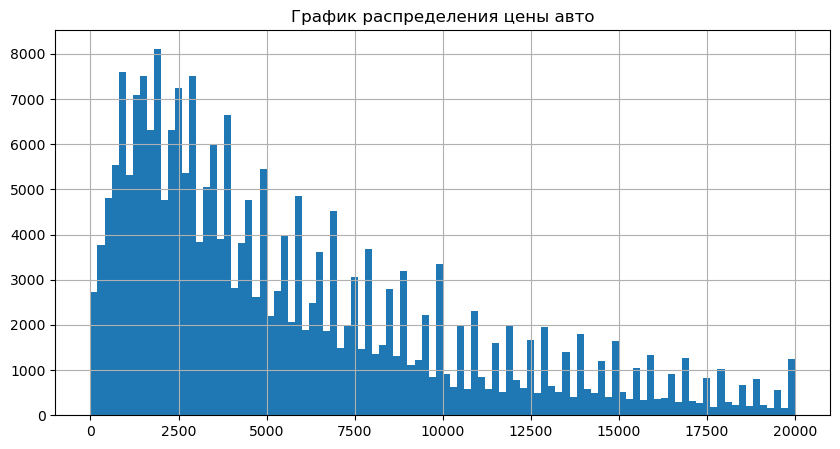

Количество автомобилей с ценой в райне 0 - 1817


In [44]:
df['Price'].hist(figsize=(10, 5), bins=100)
plt.title('График распределения цены авто')
plt.show()
print('Количество автомобилей с ценой в райне 0 - {}'.format(df['Price'].value_counts().sort_index()[:100].sum()))

<span style=color:blue>**Огромное количество выбросов в районе нуля у цены, от таких значений частично получилось избавиться благодаря заполнению по поиску модели и году регистрации**

### Month Registration | PucturesNumber

In [45]:
df = df.drop(
    ['RegistrationMonth', 'NumberOfPictures', 'PostalCode', 'DateCreated', 'DateCrawled', 'LastSeen', 'Model_Brand'],
    axis=1)

<span style=color:blue>**Столбец с регистрацией месяца и индексом продавца не играет роли в конечном обучении модели, а столбец с фотографиями и вовсе пустой - поэтому такие столбцы удаляем**

### Датасет после обработки

In [46]:
df.describe()

Price  RegistrationYear          Power      Kilometer  \
count  236195.000000     236195.000000  236195.000000  236195.000000   
mean     5652.809814       2005.750261     123.789348  124496.157836   
std      4673.674529          4.243668      50.679291   39260.690723   
min         0.000000       2000.000000       0.000000    5000.000000   
25%      2000.000000       2002.000000      84.000000  100000.000000   
50%      4199.000000       2005.000000     116.000000  150000.000000   
75%      8000.000000       2009.000000     150.000000  150000.000000   
max     20000.000000       2016.000000     339.000000  150000.000000   

            Repaired  
count  235496.000000  
mean        0.085178  
std         0.279146  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [47]:
df = df.query('Price > 100 & Power > 0')

<span style=color:blue>**Хотя мы избавились от большого количества выбросов, некоторые все же остались, поэтому такие данные по итогу удаляем**

In [48]:
df.isna().sum()

Price                 0
VehicleType          43
RegistrationYear      0
Gearbox              39
Power                 0
Model               881
Kilometer             0
FuelType             20
Brand                 0
Repaired            166
dtype: int64

In [49]:
df = df.dropna()

In [50]:
df.isna().sum()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

<span style=color:blue>**Аналогично с пропусками, избавиться от всех не получилось, поэтому оставшиеся удаляем**

In [51]:
print(f'Видимых дубликатов: {df.duplicated().sum()}')
duplicated_sum = df.duplicated().sum()
df = df.drop_duplicates(keep='first', ignore_index=True)

Видимых дубликатов: 37761


<span style=color:blue>**Имеется большое количество полных дубликатов, их удаляем**

In [52]:
source_df = pd.read_csv("https://code.s3.yandex.net/datasets/autos.csv")

percentage_source_df = df.shape[0] / source_df.shape[0]
total_isna_source  = source_df.isna().sum().max() / source_df.shape[0]
total_out_source = source_df.query(
    'Price <= 100 | Power == 0 | Power > 350 | RegistrationYear > 2023 | RegistrationYear < 2000')\
    .shape[0] / source_df.shape[0]

print(f'Получилось сохранить: {round(percentage_source_df*100, 2)}% исходного датасета, \
при:\n{round(total_isna_source*100, 2)}% пропусков;\n{round(total_out_source*100, 2)}% выбросах;\n\
{round(100 * duplicated_sum / source_df.shape[0], 2)}% дубликатов')

Получилось сохранить: 55.12% исходного датасета, при:
20.08% пропусков;
37.59% выбросах;
10.66% дубликатов


## Обучение моделей

### Кодирование и масштабирование признаков

In [53]:
category_df = ['Brand', 'Model', 'VehicleType', 'Gearbox', 'FuelType']
total_unique = 0
for col in category_df:
    total_unique += df[col].nunique()
    print(f'Уникальных значений в столбце {col} - {df[col].nunique()}')
print(f'Всего столбцов после кодирования категориальных признаков {total_unique}')

Уникальных значений в столбце Brand - 39
Уникальных значений в столбце Model - 243
Уникальных значений в столбце VehicleType - 8
Уникальных значений в столбце Gearbox - 2
Уникальных значений в столбце FuelType - 7
Всего столбцов после кодирования категориальных признаков 299


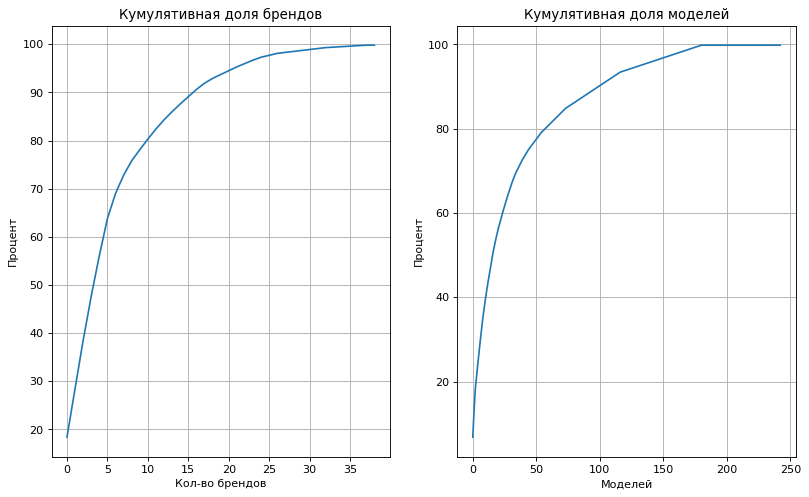

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7), dpi=80)

brand_counts = df['Brand'].value_counts()
total_brand = brand_counts.sum()
brand_counts = pd.DataFrame(brand_counts)
brand_counts['Share'] = (brand_counts / total_brand) * 100
brand_counts['Share'] = brand_counts['Share'].round(1)
brand_counts['CumSum'] = brand_counts['Share'].cumsum()
x_0 = range(len(brand_counts))
y_0 = brand_counts['CumSum'].values

axs[0].plot(x_0, y_0)
axs[0].grid(True)
axs[0].set_xlabel('Кол-во брендов')
axs[0].set_ylabel('Процент')
axs[0].set_title('Кумулятивная доля брендов')

#================================================

model_counts = df['Model'].value_counts()
total_model = model_counts.sum()
model_counts = pd.DataFrame(model_counts)
model_counts['Share'] = (model_counts / total_model) * 100
model_counts['Share'] = model_counts['Share'].round(1)
model_counts['CumSum'] = model_counts['Share'].cumsum()
x_1 = range(len(model_counts))
y_1 = model_counts['CumSum'].values


axs[1].plot(x_1, y_1)
axs[1].grid(True)
axs[1].set_xlabel('Моделей')
axs[1].set_ylabel('Процент')
axs[1].set_title('Кумулятивная доля моделей')


plt.show()

<span style=color:blue>**40% моделей, занимают почти 95% датасета, и появляется множество нулей. Можно объединить их в одну группу "Другие"**

In [55]:
#Фиксируем random_state
state = RandomState(12345)

#Преобразуем категории
category_df = ['Brand', 'Model', 'VehicleType', 'Gearbox', 'FuelType']
ohe = OneHotEncoder()
ohe_df = pd.DataFrame()
for cat in category_df:
    data_new = ohe.fit_transform(df[cat].values.reshape(-1, 1))
    temp_df = pd.DataFrame(data_new.toarray(), columns=ohe.get_feature_names([cat]))
    ohe_df = pd.concat([ohe_df, temp_df], axis=1)

# Создаем конечный датасет
numeric_df = df[['RegistrationYear', 'Power', 'Kilometer', 'Repaired', 'Price']]
ohe_df = pd.concat([ohe_df, numeric_df], axis=1)
ohe_df[:5]

C:\Users\tirob\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tirob\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tirob\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\tirob\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

Brand_alfa_romeo  Brand_audi  Brand_bmw  Brand_chevrolet  Brand_chrysler  \
0               0.0         1.0        0.0              0.0             0.0   
1               0.0         0.0        0.0              0.0             0.0   
2               0.0         0.0        0.0              0.0             0.0   
3               0.0         0.0        0.0              0.0             0.0   
4               0.0         0.0        0.0              0.0             0.0   

   Brand_citroen  Brand_dacia  Brand_daewoo  Brand_daihatsu  Brand_fiat  ...  \
0            0.0          0.0           0.0             0.0         0.0  ...   
1            0.0          0.0           0.0             0.0         0.0  ...   
2            0.0          0.0           0.0             0.0         0.0  ...   
3            0.0          0.0           0.0             0.0         0.0  ...   
4            0.0          0.0           0.0             0.0         0.0  ...   

   FuelType_gasoline  FuelType_hybrid  FuelType_lpg  FuelType_other  \
0                1.0              0.0           0.0             0.0   
1                1.0              0.0           0.0             0.0   
2                0.0              0.0           0.0             0.0   
3                1.0              0.0           0.0             0.0   
4                0.0              0.0           0.0             0.0   

   FuelType_petrol  RegistrationYear  Power  Kilometer  Repaired    Price  
0              0.0              2011    190     125000       1.0  18300.0  
1              0.0              2004    163     125000       0.0   9800.0  
2              1.0              2001     75     150000       0.0   1500.0  
3              0.0              2008     69      90000       0.0   3600.0  
4              1.0              2004    109     150000       0.0   2200.0  

[5 rows x 304 columns]

In [56]:
#Разделяем признаки
X = ohe_df.drop('Price', axis=1)
Y = ohe_df['Price']

#Cоздаем выборки
x_train, x_test, y_train,y_test= train_test_split(X, Y, test_size=0.2, random_state=state)

print(x_train.shape[0], y_train.shape[0])
print(x_test.shape[0], y_test.shape[0])
print(ohe_df.shape[0])

156271 156271
39068 39068
195339


In [57]:
#Масштабируем числовые признаки
numeric = ['RegistrationYear', 'Power', 'Kilometer']

scaler = StandardScaler()
scaler.fit(x_train[numeric])

x_train[numeric] = scaler.transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

### DecisionTree

In [58]:
param_set = {
    'max_depth': range(1, 30, 3),
    'min_samples_leaf': [1, 5, 10, 15],
    'max_leaf_nodes': [None, 10, 20, 30]
}

model = DecisionTreeRegressor(random_state=state)
grid_search = GridSearchCV(
            estimator = model,
            param_grid = param_set,
            scoring='neg_root_mean_squared_error',
            cv=5,
            n_jobs=-1)

grid_search.fit(x_train, y_train)

tree_model = grid_search.best_estimator_
tree_rmse = -grid_search.best_score_
tree_params = grid_search.best_params_

print(f'Лучший RMSE модели DT: {round(tree_rmse, 2)}')
print('Лучшие параметры:')
for param, value in tree_params.items():
    print(f'{param}: {value}')

Лучший RMSE модели DT: 1867.87
Лучшие параметры:
max_depth: 25
max_leaf_nodes: None
min_samples_leaf: 10


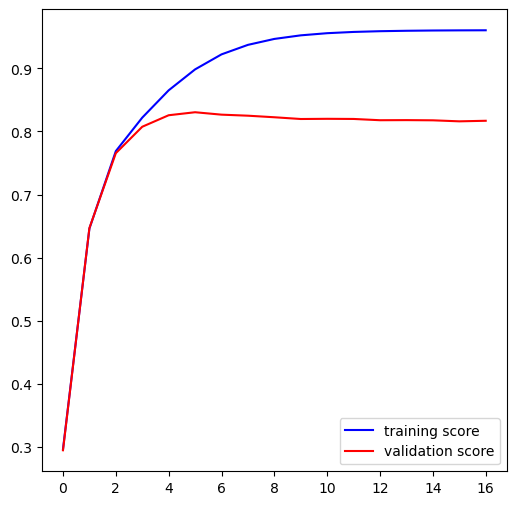

In [59]:
train_scores, valid_scores = validation_curve(
    DecisionTreeRegressor(), x_train, y_train, param_name="max_depth",
    param_range=np.arange(1, 52, 3),
    cv=5)
plt.figure(figsize=(6, 6))
plt.plot(np.median(train_scores, 1), color='blue', label='training score')
plt.plot(np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')

<span style=color:blue>**По графику выше видно, как меняется качество прогноза в зависимости от глубины, после достижения отмеки 10 - `max_depth`, качество прогноза почти не изменяется**

### LightGBM

In [60]:
param_set = {
    'max_depth': [2, 4, 6, 8, 10],
    'num_leaves': np.arange(30, 100, 2),
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': [0.01, 0.05],
    'boosting_type': ['gbdt'],
    'objective': ['regression']
}

model = lgb.LGBMRegressor(random_state=state)
grid_search = GridSearchCV(
            estimator = model,
            param_grid = param_set,
            scoring='neg_root_mean_squared_error',
            cv=5,
            verbose=10)

grid_search.fit(x_train, y_train)

lgb_model = grid_search.best_estimator_
lgb_rmse = -grid_search.best_score_
lgb_params = grid_search.best_params_

print(f'Лучший RMSE модели LightGBM: {round(lgb_rmse, 2)}')
print('Лучшие параметры:')
for param, value in lgb_params.items():
    print(f'{param}: {value}')

Fitting 5 folds for each of 3150 candidates, totalling 15750 fits
[CV 1/5; 1/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression
[CV 1/5; 1/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression;, score=-3876.186 total time=   0.8s
[CV 2/5; 1/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression
[CV 2/5; 1/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression;, score=-3902.771 total time=   0.4s
[CV 3/5; 1/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression
[CV 3/5; 1/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=30, objective=regression;, score=-3919.026 total time=   0.4s
[CV 4/5; 1/3150] START boosting_type=gbdt, learning_rat

[CV 4/5; 6/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=40, objective=regression;, score=-3906.056 total time=   0.4s
[CV 5/5; 6/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=40, objective=regression
[CV 5/5; 6/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=40, objective=regression;, score=-3884.200 total time=   0.5s
[CV 1/5; 7/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=42, objective=regression
[CV 1/5; 7/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=42, objective=regression;, score=-3876.186 total time=   0.4s
[CV 2/5; 7/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=42, objective=regression
[CV 2/5; 7/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=42, objective=regre

[CV 2/5; 12/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression;, score=-3902.771 total time=   0.4s
[CV 3/5; 12/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression
[CV 3/5; 12/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression;, score=-3919.026 total time=   0.4s
[CV 4/5; 12/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression
[CV 4/5; 12/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression;, score=-3906.056 total time=   0.4s
[CV 5/5; 12/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objective=regression
[CV 5/5; 12/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=52, objectiv

[CV 5/5; 17/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=62, objective=regression;, score=-3884.200 total time=   0.4s
[CV 1/5; 18/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objective=regression
[CV 1/5; 18/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objective=regression;, score=-3876.186 total time=   0.5s
[CV 2/5; 18/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objective=regression
[CV 2/5; 18/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objective=regression;, score=-3902.771 total time=   0.4s
[CV 3/5; 18/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objective=regression
[CV 3/5; 18/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=64, objectiv

[CV 3/5; 23/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=74, objective=regression;, score=-3919.026 total time=   0.4s
[CV 4/5; 23/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=74, objective=regression
[CV 4/5; 23/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=74, objective=regression;, score=-3906.056 total time=   0.4s
[CV 5/5; 23/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=74, objective=regression
[CV 5/5; 23/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=74, objective=regression;, score=-3884.200 total time=   0.4s
[CV 1/5; 24/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=76, objective=regression
[CV 1/5; 24/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=76, objectiv

[CV 1/5; 29/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression;, score=-3876.186 total time=   0.4s
[CV 2/5; 29/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression
[CV 2/5; 29/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression;, score=-3902.771 total time=   0.5s
[CV 3/5; 29/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression
[CV 3/5; 29/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression;, score=-3919.026 total time=   0.4s
[CV 4/5; 29/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objective=regression
[CV 4/5; 29/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=86, objectiv

[CV 4/5; 34/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=96, objective=regression;, score=-3906.056 total time=   0.4s
[CV 5/5; 34/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=96, objective=regression
[CV 5/5; 34/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=96, objective=regression;, score=-3884.200 total time=   0.4s
[CV 1/5; 35/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=98, objective=regression
[CV 1/5; 35/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=98, objective=regression;, score=-3876.186 total time=   0.4s
[CV 2/5; 35/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=98, objective=regression
[CV 2/5; 35/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=50, num_leaves=98, objectiv

[CV 2/5; 40/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression;, score=-3400.302 total time=   0.4s
[CV 3/5; 40/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression
[CV 3/5; 40/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression;, score=-3412.475 total time=   0.5s
[CV 4/5; 40/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression
[CV 4/5; 40/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression;, score=-3405.966 total time=   0.4s
[CV 5/5; 40/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, objective=regression
[CV 5/5; 40/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=38, o

[CV 5/5; 45/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=48, objective=regression;, score=-3383.314 total time=   0.5s
[CV 1/5; 46/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, objective=regression
[CV 1/5; 46/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, objective=regression;, score=-3379.645 total time=   0.5s
[CV 2/5; 46/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, objective=regression
[CV 2/5; 46/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, objective=regression;, score=-3400.302 total time=   0.5s
[CV 3/5; 46/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, objective=regression
[CV 3/5; 46/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=50, o

[CV 3/5; 51/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=60, objective=regression;, score=-3412.475 total time=   0.5s
[CV 4/5; 51/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=60, objective=regression
[CV 4/5; 51/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=60, objective=regression;, score=-3405.966 total time=   0.5s
[CV 5/5; 51/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=60, objective=regression
[CV 5/5; 51/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=60, objective=regression;, score=-3383.314 total time=   0.6s
[CV 1/5; 52/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=62, objective=regression
[CV 1/5; 52/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=62, o

[CV 1/5; 57/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression;, score=-3379.645 total time=   0.5s
[CV 2/5; 57/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression
[CV 2/5; 57/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression;, score=-3400.302 total time=   0.5s
[CV 3/5; 57/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression
[CV 3/5; 57/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression;, score=-3412.475 total time=   0.5s
[CV 4/5; 57/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, objective=regression
[CV 4/5; 57/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=72, o

[CV 4/5; 62/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=82, objective=regression;, score=-3405.966 total time=   0.4s
[CV 5/5; 62/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=82, objective=regression
[CV 5/5; 62/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=82, objective=regression;, score=-3383.314 total time=   0.5s
[CV 1/5; 63/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=84, objective=regression
[CV 1/5; 63/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=84, objective=regression;, score=-3379.645 total time=   0.5s
[CV 2/5; 63/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=84, objective=regression
[CV 2/5; 63/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=84, o

[CV 2/5; 68/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression;, score=-3400.302 total time=   0.6s
[CV 3/5; 68/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression
[CV 3/5; 68/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression;, score=-3412.475 total time=   0.5s
[CV 4/5; 68/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression
[CV 4/5; 68/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression;, score=-3405.966 total time=   0.5s
[CV 5/5; 68/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, objective=regression
[CV 5/5; 68/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=100, num_leaves=94, o

[CV 5/5; 73/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=34, objective=regression;, score=-3029.757 total time=   0.5s
[CV 1/5; 74/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, objective=regression
[CV 1/5; 74/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, objective=regression;, score=-3030.866 total time=   0.6s
[CV 2/5; 74/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, objective=regression
[CV 2/5; 74/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, objective=regression;, score=-3046.492 total time=   0.5s
[CV 3/5; 74/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, objective=regression
[CV 3/5; 74/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=36, o

[CV 3/5; 79/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=46, objective=regression;, score=-3054.062 total time=   0.5s
[CV 4/5; 79/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=46, objective=regression
[CV 4/5; 79/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=46, objective=regression;, score=-3052.845 total time=   0.5s
[CV 5/5; 79/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=46, objective=regression
[CV 5/5; 79/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=46, objective=regression;, score=-3029.757 total time=   0.6s
[CV 1/5; 80/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=48, objective=regression
[CV 1/5; 80/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=48, o

[CV 1/5; 85/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression;, score=-3030.866 total time=   0.6s
[CV 2/5; 85/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression
[CV 2/5; 85/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression;, score=-3046.492 total time=   0.6s
[CV 3/5; 85/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression
[CV 3/5; 85/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression;, score=-3054.062 total time=   0.6s
[CV 4/5; 85/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, objective=regression
[CV 4/5; 85/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=58, o

[CV 4/5; 90/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=68, objective=regression;, score=-3052.845 total time=   0.5s
[CV 5/5; 90/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=68, objective=regression
[CV 5/5; 90/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=68, objective=regression;, score=-3029.757 total time=   0.5s
[CV 1/5; 91/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=70, objective=regression
[CV 1/5; 91/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=70, objective=regression;, score=-3030.866 total time=   0.5s
[CV 2/5; 91/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=70, objective=regression
[CV 2/5; 91/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=70, o

[CV 2/5; 96/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression;, score=-3046.492 total time=   0.6s
[CV 3/5; 96/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression
[CV 3/5; 96/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression;, score=-3054.062 total time=   0.5s
[CV 4/5; 96/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression
[CV 4/5; 96/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression;, score=-3052.845 total time=   0.5s
[CV 5/5; 96/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, objective=regression
[CV 5/5; 96/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=80, o

[CV 5/5; 101/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=90, objective=regression;, score=-3029.757 total time=   0.5s
[CV 1/5; 102/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=92, objective=regression
[CV 1/5; 102/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=92, objective=regression;, score=-3030.866 total time=   0.4s
[CV 2/5; 102/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=92, objective=regression
[CV 2/5; 102/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=92, objective=regression;, score=-3046.492 total time=   0.5s
[CV 3/5; 102/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leaves=92, objective=regression
[CV 3/5; 102/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=150, num_leave

[CV 3/5; 107/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=32, objective=regression;, score=-2823.105 total time=   0.5s
[CV 4/5; 107/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=32, objective=regression
[CV 4/5; 107/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=32, objective=regression;, score=-2824.369 total time=   0.5s
[CV 5/5; 107/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=32, objective=regression
[CV 5/5; 107/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=32, objective=regression;, score=-2803.059 total time=   0.5s
[CV 1/5; 108/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=34, objective=regression
[CV 1/5; 108/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 1/5; 113/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression;, score=-2807.072 total time=   0.5s
[CV 2/5; 113/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression
[CV 2/5; 113/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression;, score=-2817.863 total time=   0.5s
[CV 3/5; 113/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression
[CV 3/5; 113/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression;, score=-2823.105 total time=   0.5s
[CV 4/5; 113/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=44, objective=regression
[CV 4/5; 113/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 4/5; 118/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=54, objective=regression;, score=-2824.369 total time=   0.5s
[CV 5/5; 118/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=54, objective=regression
[CV 5/5; 118/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=54, objective=regression;, score=-2803.059 total time=   0.6s
[CV 1/5; 119/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=56, objective=regression
[CV 1/5; 119/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=56, objective=regression;, score=-2807.072 total time=   0.5s
[CV 2/5; 119/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=56, objective=regression
[CV 2/5; 119/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 2/5; 124/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression;, score=-2817.863 total time=   0.6s
[CV 3/5; 124/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression
[CV 3/5; 124/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression;, score=-2823.105 total time=   0.6s
[CV 4/5; 124/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression
[CV 4/5; 124/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression;, score=-2824.369 total time=   0.5s
[CV 5/5; 124/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=66, objective=regression
[CV 5/5; 124/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 5/5; 129/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=76, objective=regression;, score=-2803.059 total time=   0.5s
[CV 1/5; 130/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=78, objective=regression
[CV 1/5; 130/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=78, objective=regression;, score=-2807.072 total time=   0.5s
[CV 2/5; 130/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=78, objective=regression
[CV 2/5; 130/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=78, objective=regression;, score=-2817.863 total time=   0.5s
[CV 3/5; 130/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=78, objective=regression
[CV 3/5; 130/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 3/5; 135/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=88, objective=regression;, score=-2823.105 total time=   0.6s
[CV 4/5; 135/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=88, objective=regression
[CV 4/5; 135/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=88, objective=regression;, score=-2824.369 total time=   0.5s
[CV 5/5; 135/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=88, objective=regression
[CV 5/5; 135/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=88, objective=regression;, score=-2803.059 total time=   0.6s
[CV 1/5; 136/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leaves=90, objective=regression
[CV 1/5; 136/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=200, num_leave

[CV 1/5; 141/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression;, score=-2662.370 total time=   0.6s
[CV 2/5; 141/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression
[CV 2/5; 141/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression;, score=-2669.951 total time=   0.6s
[CV 3/5; 141/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression
[CV 3/5; 141/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression;, score=-2672.162 total time=   0.6s
[CV 4/5; 141/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=30, objective=regression
[CV 4/5; 141/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 4/5; 146/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=40, objective=regression;, score=-2675.673 total time=   0.6s
[CV 5/5; 146/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=40, objective=regression
[CV 5/5; 146/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=40, objective=regression;, score=-2655.679 total time=   0.5s
[CV 1/5; 147/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=42, objective=regression
[CV 1/5; 147/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=42, objective=regression;, score=-2662.370 total time=   0.6s
[CV 2/5; 147/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=42, objective=regression
[CV 2/5; 147/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 2/5; 152/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression;, score=-2669.951 total time=   0.5s
[CV 3/5; 152/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression
[CV 3/5; 152/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression;, score=-2672.162 total time=   0.5s
[CV 4/5; 152/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression
[CV 4/5; 152/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression;, score=-2675.673 total time=   0.5s
[CV 5/5; 152/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=52, objective=regression
[CV 5/5; 152/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 5/5; 157/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=62, objective=regression;, score=-2655.679 total time=   0.6s
[CV 1/5; 158/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=64, objective=regression
[CV 1/5; 158/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=64, objective=regression;, score=-2662.370 total time=   0.7s
[CV 2/5; 158/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=64, objective=regression
[CV 2/5; 158/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=64, objective=regression;, score=-2669.951 total time=   0.7s
[CV 3/5; 158/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=64, objective=regression
[CV 3/5; 158/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 3/5; 163/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=74, objective=regression;, score=-2672.162 total time=   0.6s
[CV 4/5; 163/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=74, objective=regression
[CV 4/5; 163/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=74, objective=regression;, score=-2675.673 total time=   0.6s
[CV 5/5; 163/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=74, objective=regression
[CV 5/5; 163/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=74, objective=regression;, score=-2655.679 total time=   0.6s
[CV 1/5; 164/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=76, objective=regression
[CV 1/5; 164/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 1/5; 169/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression;, score=-2662.370 total time=   0.6s
[CV 2/5; 169/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression
[CV 2/5; 169/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression;, score=-2669.951 total time=   0.7s
[CV 3/5; 169/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression
[CV 3/5; 169/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression;, score=-2672.162 total time=   0.6s
[CV 4/5; 169/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=86, objective=regression
[CV 4/5; 169/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 4/5; 174/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=96, objective=regression;, score=-2675.673 total time=   0.6s
[CV 5/5; 174/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=96, objective=regression
[CV 5/5; 174/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=96, objective=regression;, score=-2655.679 total time=   0.7s
[CV 1/5; 175/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=98, objective=regression
[CV 1/5; 175/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=98, objective=regression;, score=-2662.370 total time=   0.5s
[CV 2/5; 175/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leaves=98, objective=regression
[CV 2/5; 175/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=250, num_leave

[CV 2/5; 180/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression;, score=-2568.634 total time=   0.6s
[CV 3/5; 180/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression
[CV 3/5; 180/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression;, score=-2570.541 total time=   0.7s
[CV 4/5; 180/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression
[CV 4/5; 180/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression;, score=-2575.654 total time=   0.7s
[CV 5/5; 180/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=38, objective=regression
[CV 5/5; 180/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 5/5; 185/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=48, objective=regression;, score=-2557.746 total time=   0.5s
[CV 1/5; 186/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=50, objective=regression
[CV 1/5; 186/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=50, objective=regression;, score=-2564.839 total time=   0.6s
[CV 2/5; 186/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=50, objective=regression
[CV 2/5; 186/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=50, objective=regression;, score=-2568.634 total time=   0.6s
[CV 3/5; 186/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=50, objective=regression
[CV 3/5; 186/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 3/5; 191/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=60, objective=regression;, score=-2570.541 total time=   0.6s
[CV 4/5; 191/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=60, objective=regression
[CV 4/5; 191/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=60, objective=regression;, score=-2575.654 total time=   0.6s
[CV 5/5; 191/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=60, objective=regression
[CV 5/5; 191/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=60, objective=regression;, score=-2557.746 total time=   0.5s
[CV 1/5; 192/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=62, objective=regression
[CV 1/5; 192/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 1/5; 197/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression;, score=-2564.839 total time=   0.5s
[CV 2/5; 197/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression
[CV 2/5; 197/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression;, score=-2568.634 total time=   0.6s
[CV 3/5; 197/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression
[CV 3/5; 197/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression;, score=-2570.541 total time=   0.6s
[CV 4/5; 197/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=72, objective=regression
[CV 4/5; 197/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 4/5; 202/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=82, objective=regression;, score=-2575.654 total time=   0.6s
[CV 5/5; 202/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=82, objective=regression
[CV 5/5; 202/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=82, objective=regression;, score=-2557.746 total time=   0.6s
[CV 1/5; 203/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=84, objective=regression
[CV 1/5; 203/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=84, objective=regression;, score=-2564.839 total time=   0.7s
[CV 2/5; 203/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=84, objective=regression
[CV 2/5; 203/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 2/5; 208/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression;, score=-2568.634 total time=   0.5s
[CV 3/5; 208/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression
[CV 3/5; 208/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression;, score=-2570.541 total time=   0.6s
[CV 4/5; 208/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression
[CV 4/5; 208/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression;, score=-2575.654 total time=   0.6s
[CV 5/5; 208/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leaves=94, objective=regression
[CV 5/5; 208/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=300, num_leave

[CV 5/5; 213/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=34, objective=regression;, score=-2481.603 total time=   0.6s
[CV 1/5; 214/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=36, objective=regression
[CV 1/5; 214/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=36, objective=regression;, score=-2490.295 total time=   0.6s
[CV 2/5; 214/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=36, objective=regression
[CV 2/5; 214/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=36, objective=regression;, score=-2492.962 total time=   0.6s
[CV 3/5; 214/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=36, objective=regression
[CV 3/5; 214/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 3/5; 219/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=46, objective=regression;, score=-2493.344 total time=   0.6s
[CV 4/5; 219/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=46, objective=regression
[CV 4/5; 219/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=46, objective=regression;, score=-2500.835 total time=   0.6s
[CV 5/5; 219/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=46, objective=regression
[CV 5/5; 219/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=46, objective=regression;, score=-2481.603 total time=   0.6s
[CV 1/5; 220/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=48, objective=regression
[CV 1/5; 220/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 1/5; 225/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression;, score=-2490.295 total time=   0.7s
[CV 2/5; 225/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression
[CV 2/5; 225/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression;, score=-2492.962 total time=   0.7s
[CV 3/5; 225/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression
[CV 3/5; 225/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression;, score=-2493.344 total time=   0.7s
[CV 4/5; 225/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=58, objective=regression
[CV 4/5; 225/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 4/5; 230/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=68, objective=regression;, score=-2500.835 total time=   0.8s
[CV 5/5; 230/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=68, objective=regression
[CV 5/5; 230/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=68, objective=regression;, score=-2481.603 total time=   0.8s
[CV 1/5; 231/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=70, objective=regression
[CV 1/5; 231/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=70, objective=regression;, score=-2490.295 total time=   0.7s
[CV 2/5; 231/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=70, objective=regression
[CV 2/5; 231/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 2/5; 236/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression;, score=-2492.962 total time=   0.6s
[CV 3/5; 236/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression
[CV 3/5; 236/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression;, score=-2493.344 total time=   0.6s
[CV 4/5; 236/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression
[CV 4/5; 236/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression;, score=-2500.835 total time=   0.7s
[CV 5/5; 236/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=80, objective=regression
[CV 5/5; 236/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 5/5; 241/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=90, objective=regression;, score=-2481.603 total time=   0.7s
[CV 1/5; 242/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=92, objective=regression
[CV 1/5; 242/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=92, objective=regression;, score=-2490.295 total time=   0.6s
[CV 2/5; 242/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=92, objective=regression
[CV 2/5; 242/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=92, objective=regression;, score=-2492.962 total time=   0.6s
[CV 3/5; 242/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leaves=92, objective=regression
[CV 3/5; 242/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=350, num_leave

[CV 3/5; 247/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=32, objective=regression;, score=-2434.132 total time=   0.7s
[CV 4/5; 247/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=32, objective=regression
[CV 4/5; 247/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=32, objective=regression;, score=-2440.418 total time=   0.7s
[CV 5/5; 247/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=32, objective=regression
[CV 5/5; 247/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=32, objective=regression;, score=-2424.066 total time=   0.7s
[CV 1/5; 248/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=34, objective=regression
[CV 1/5; 248/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 1/5; 253/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression;, score=-2434.018 total time=   0.7s
[CV 2/5; 253/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression
[CV 2/5; 253/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression;, score=-2434.689 total time=   0.6s
[CV 3/5; 253/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression
[CV 3/5; 253/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression;, score=-2434.132 total time=   0.7s
[CV 4/5; 253/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=44, objective=regression
[CV 4/5; 253/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 4/5; 258/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=54, objective=regression;, score=-2440.418 total time=   0.7s
[CV 5/5; 258/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=54, objective=regression
[CV 5/5; 258/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=54, objective=regression;, score=-2424.066 total time=   0.6s
[CV 1/5; 259/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=56, objective=regression
[CV 1/5; 259/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=56, objective=regression;, score=-2434.018 total time=   0.6s
[CV 2/5; 259/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=56, objective=regression
[CV 2/5; 259/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 2/5; 264/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression;, score=-2434.689 total time=   0.6s
[CV 3/5; 264/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression
[CV 3/5; 264/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression;, score=-2434.132 total time=   0.6s
[CV 4/5; 264/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression
[CV 4/5; 264/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression;, score=-2440.418 total time=   0.6s
[CV 5/5; 264/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=66, objective=regression
[CV 5/5; 264/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 5/5; 269/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=76, objective=regression;, score=-2424.066 total time=   0.6s
[CV 1/5; 270/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=78, objective=regression
[CV 1/5; 270/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=78, objective=regression;, score=-2434.018 total time=   0.6s
[CV 2/5; 270/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=78, objective=regression
[CV 2/5; 270/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=78, objective=regression;, score=-2434.689 total time=   0.7s
[CV 3/5; 270/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=78, objective=regression
[CV 3/5; 270/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 3/5; 275/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=88, objective=regression;, score=-2434.132 total time=   0.6s
[CV 4/5; 275/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=88, objective=regression
[CV 4/5; 275/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=88, objective=regression;, score=-2440.418 total time=   0.7s
[CV 5/5; 275/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=88, objective=regression
[CV 5/5; 275/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=88, objective=regression;, score=-2424.066 total time=   0.7s
[CV 1/5; 276/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leaves=90, objective=regression
[CV 1/5; 276/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=400, num_leave

[CV 1/5; 281/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression;, score=-2385.593 total time=   0.6s
[CV 2/5; 281/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression
[CV 2/5; 281/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression;, score=-2385.446 total time=   0.6s
[CV 3/5; 281/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression
[CV 3/5; 281/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression;, score=-2383.574 total time=   0.7s
[CV 4/5; 281/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=30, objective=regression
[CV 4/5; 281/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 4/5; 286/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=40, objective=regression;, score=-2391.723 total time=   0.8s
[CV 5/5; 286/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=40, objective=regression
[CV 5/5; 286/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=40, objective=regression;, score=-2373.859 total time=   0.7s
[CV 1/5; 287/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=42, objective=regression
[CV 1/5; 287/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=42, objective=regression;, score=-2385.593 total time=   0.7s
[CV 2/5; 287/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=42, objective=regression
[CV 2/5; 287/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 2/5; 292/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression;, score=-2385.446 total time=   0.6s
[CV 3/5; 292/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression
[CV 3/5; 292/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression;, score=-2383.574 total time=   0.8s
[CV 4/5; 292/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression
[CV 4/5; 292/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression;, score=-2391.723 total time=   0.8s
[CV 5/5; 292/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=52, objective=regression
[CV 5/5; 292/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 5/5; 297/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=62, objective=regression;, score=-2373.859 total time=   0.9s
[CV 1/5; 298/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=64, objective=regression
[CV 1/5; 298/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=64, objective=regression;, score=-2385.593 total time=   0.7s
[CV 2/5; 298/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=64, objective=regression
[CV 2/5; 298/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=64, objective=regression;, score=-2385.446 total time=   0.7s
[CV 3/5; 298/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=64, objective=regression
[CV 3/5; 298/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 3/5; 303/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=74, objective=regression;, score=-2383.574 total time=   0.7s
[CV 4/5; 303/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=74, objective=regression
[CV 4/5; 303/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=74, objective=regression;, score=-2391.723 total time=   0.7s
[CV 5/5; 303/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=74, objective=regression
[CV 5/5; 303/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=74, objective=regression;, score=-2373.859 total time=   0.7s
[CV 1/5; 304/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=76, objective=regression
[CV 1/5; 304/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 1/5; 309/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression;, score=-2385.593 total time=   0.7s
[CV 2/5; 309/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression
[CV 2/5; 309/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression;, score=-2385.446 total time=   0.8s
[CV 3/5; 309/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression
[CV 3/5; 309/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression;, score=-2383.574 total time=   0.8s
[CV 4/5; 309/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=86, objective=regression
[CV 4/5; 309/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 4/5; 314/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=96, objective=regression;, score=-2391.723 total time=   0.7s
[CV 5/5; 314/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=96, objective=regression
[CV 5/5; 314/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=96, objective=regression;, score=-2373.859 total time=   0.6s
[CV 1/5; 315/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=98, objective=regression
[CV 1/5; 315/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=98, objective=regression;, score=-2385.593 total time=   0.7s
[CV 2/5; 315/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leaves=98, objective=regression
[CV 2/5; 315/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=2, n_estimators=450, num_leave

[CV 2/5; 320/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression;, score=-3567.816 total time=   0.4s
[CV 3/5; 320/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression
[CV 3/5; 320/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression;, score=-3583.970 total time=   0.5s
[CV 4/5; 320/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression
[CV 4/5; 320/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression;, score=-3574.300 total time=   0.5s
[CV 5/5; 320/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, objective=regression
[CV 5/5; 320/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=38, o

[CV 5/5; 325/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=48, objective=regression;, score=-3555.453 total time=   0.4s
[CV 1/5; 326/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, objective=regression
[CV 1/5; 326/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, objective=regression;, score=-3548.151 total time=   0.4s
[CV 2/5; 326/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, objective=regression
[CV 2/5; 326/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, objective=regression;, score=-3567.816 total time=   0.5s
[CV 3/5; 326/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, objective=regression
[CV 3/5; 326/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=50, o

[CV 3/5; 331/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=60, objective=regression;, score=-3583.970 total time=   0.4s
[CV 4/5; 331/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=60, objective=regression
[CV 4/5; 331/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=60, objective=regression;, score=-3574.300 total time=   0.5s
[CV 5/5; 331/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=60, objective=regression
[CV 5/5; 331/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=60, objective=regression;, score=-3555.453 total time=   0.5s
[CV 1/5; 332/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=62, objective=regression
[CV 1/5; 332/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=62, o

[CV 1/5; 337/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression;, score=-3548.151 total time=   0.4s
[CV 2/5; 337/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression
[CV 2/5; 337/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression;, score=-3567.816 total time=   0.5s
[CV 3/5; 337/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression
[CV 3/5; 337/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression;, score=-3583.970 total time=   0.4s
[CV 4/5; 337/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, objective=regression
[CV 4/5; 337/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=72, o

[CV 4/5; 342/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=82, objective=regression;, score=-3574.300 total time=   0.5s
[CV 5/5; 342/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=82, objective=regression
[CV 5/5; 342/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=82, objective=regression;, score=-3555.453 total time=   0.5s
[CV 1/5; 343/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=84, objective=regression
[CV 1/5; 343/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=84, objective=regression;, score=-3548.151 total time=   0.4s
[CV 2/5; 343/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=84, objective=regression
[CV 2/5; 343/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=84, o

[CV 2/5; 348/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression;, score=-3567.816 total time=   0.5s
[CV 3/5; 348/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression
[CV 3/5; 348/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression;, score=-3583.970 total time=   0.4s
[CV 4/5; 348/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression
[CV 4/5; 348/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression;, score=-3574.300 total time=   0.4s
[CV 5/5; 348/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, objective=regression
[CV 5/5; 348/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=50, num_leaves=94, o

[CV 5/5; 353/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=34, objective=regression;, score=-2908.888 total time=   0.5s
[CV 1/5; 354/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=36, objective=regression
[CV 1/5; 354/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=36, objective=regression;, score=-2912.576 total time=   0.5s
[CV 2/5; 354/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=36, objective=regression
[CV 2/5; 354/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=36, objective=regression;, score=-2925.748 total time=   0.5s
[CV 3/5; 354/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=36, objective=regression
[CV 3/5; 354/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 3/5; 359/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=46, objective=regression;, score=-2932.083 total time=   0.5s
[CV 4/5; 359/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=46, objective=regression
[CV 4/5; 359/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=46, objective=regression;, score=-2933.093 total time=   0.5s
[CV 5/5; 359/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=46, objective=regression
[CV 5/5; 359/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=46, objective=regression;, score=-2908.888 total time=   0.5s
[CV 1/5; 360/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=48, objective=regression
[CV 1/5; 360/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 1/5; 365/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression;, score=-2912.576 total time=   0.5s
[CV 2/5; 365/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression
[CV 2/5; 365/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression;, score=-2925.748 total time=   0.5s
[CV 3/5; 365/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression
[CV 3/5; 365/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression;, score=-2932.083 total time=   0.5s
[CV 4/5; 365/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=58, objective=regression
[CV 4/5; 365/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 4/5; 370/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=68, objective=regression;, score=-2933.093 total time=   0.5s
[CV 5/5; 370/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=68, objective=regression
[CV 5/5; 370/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=68, objective=regression;, score=-2908.888 total time=   0.5s
[CV 1/5; 371/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=70, objective=regression
[CV 1/5; 371/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=70, objective=regression;, score=-2912.576 total time=   0.6s
[CV 2/5; 371/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=70, objective=regression
[CV 2/5; 371/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 2/5; 376/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression;, score=-2925.748 total time=   0.5s
[CV 3/5; 376/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression
[CV 3/5; 376/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression;, score=-2932.083 total time=   0.5s
[CV 4/5; 376/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression
[CV 4/5; 376/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression;, score=-2933.093 total time=   0.6s
[CV 5/5; 376/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=80, objective=regression
[CV 5/5; 376/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 5/5; 381/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=90, objective=regression;, score=-2908.888 total time=   0.6s
[CV 1/5; 382/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=92, objective=regression
[CV 1/5; 382/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=92, objective=regression;, score=-2912.576 total time=   0.6s
[CV 2/5; 382/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=92, objective=regression
[CV 2/5; 382/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=92, objective=regression;, score=-2925.748 total time=   0.5s
[CV 3/5; 382/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leaves=92, objective=regression
[CV 3/5; 382/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=100, num_leave

[CV 3/5; 387/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=32, objective=regression;, score=-2577.762 total time=   0.6s
[CV 4/5; 387/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=32, objective=regression
[CV 4/5; 387/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=32, objective=regression;, score=-2582.246 total time=   0.6s
[CV 5/5; 387/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=32, objective=regression
[CV 5/5; 387/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=32, objective=regression;, score=-2563.536 total time=   0.5s
[CV 1/5; 388/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=34, objective=regression
[CV 1/5; 388/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 1/5; 393/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression;, score=-2570.902 total time=   0.6s
[CV 2/5; 393/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression
[CV 2/5; 393/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression;, score=-2573.582 total time=   0.6s
[CV 3/5; 393/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression
[CV 3/5; 393/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression;, score=-2577.762 total time=   0.6s
[CV 4/5; 393/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=44, objective=regression
[CV 4/5; 393/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 4/5; 398/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=54, objective=regression;, score=-2582.246 total time=   0.6s
[CV 5/5; 398/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=54, objective=regression
[CV 5/5; 398/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=54, objective=regression;, score=-2563.536 total time=   0.6s
[CV 1/5; 399/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=56, objective=regression
[CV 1/5; 399/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=56, objective=regression;, score=-2570.902 total time=   0.6s
[CV 2/5; 399/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=56, objective=regression
[CV 2/5; 399/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 2/5; 404/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression;, score=-2573.582 total time=   0.7s
[CV 3/5; 404/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression
[CV 3/5; 404/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression;, score=-2577.762 total time=   0.6s
[CV 4/5; 404/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression
[CV 4/5; 404/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression;, score=-2582.246 total time=   0.5s
[CV 5/5; 404/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=66, objective=regression
[CV 5/5; 404/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 5/5; 409/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=76, objective=regression;, score=-2563.536 total time=   0.6s
[CV 1/5; 410/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=78, objective=regression
[CV 1/5; 410/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=78, objective=regression;, score=-2570.902 total time=   0.6s
[CV 2/5; 410/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=78, objective=regression
[CV 2/5; 410/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=78, objective=regression;, score=-2573.582 total time=   0.5s
[CV 3/5; 410/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=78, objective=regression
[CV 3/5; 410/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 3/5; 415/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=88, objective=regression;, score=-2577.762 total time=   0.5s
[CV 4/5; 415/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=88, objective=regression
[CV 4/5; 415/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=88, objective=regression;, score=-2582.246 total time=   0.5s
[CV 5/5; 415/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=88, objective=regression
[CV 5/5; 415/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=88, objective=regression;, score=-2563.536 total time=   0.6s
[CV 1/5; 416/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leaves=90, objective=regression
[CV 1/5; 416/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=150, num_leave

[CV 1/5; 421/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression;, score=-2374.448 total time=   0.7s
[CV 2/5; 421/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression
[CV 2/5; 421/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression;, score=-2372.198 total time=   0.6s
[CV 3/5; 421/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression
[CV 3/5; 421/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression;, score=-2372.599 total time=   0.6s
[CV 4/5; 421/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=30, objective=regression
[CV 4/5; 421/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 4/5; 426/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=40, objective=regression;, score=-2381.309 total time=   0.6s
[CV 5/5; 426/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=40, objective=regression
[CV 5/5; 426/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=40, objective=regression;, score=-2361.204 total time=   0.7s
[CV 1/5; 427/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=42, objective=regression
[CV 1/5; 427/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=42, objective=regression;, score=-2374.448 total time=   0.7s
[CV 2/5; 427/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=42, objective=regression
[CV 2/5; 427/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 2/5; 432/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression;, score=-2372.198 total time=   0.8s
[CV 3/5; 432/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression
[CV 3/5; 432/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression;, score=-2372.599 total time=   0.7s
[CV 4/5; 432/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression
[CV 4/5; 432/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression;, score=-2381.309 total time=   0.6s
[CV 5/5; 432/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=52, objective=regression
[CV 5/5; 432/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 5/5; 437/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=62, objective=regression;, score=-2361.204 total time=   0.8s
[CV 1/5; 438/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=64, objective=regression
[CV 1/5; 438/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=64, objective=regression;, score=-2374.448 total time=   0.7s
[CV 2/5; 438/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=64, objective=regression
[CV 2/5; 438/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=64, objective=regression;, score=-2372.198 total time=   0.7s
[CV 3/5; 438/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=64, objective=regression
[CV 3/5; 438/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 3/5; 443/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=74, objective=regression;, score=-2372.599 total time=   0.7s
[CV 4/5; 443/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=74, objective=regression
[CV 4/5; 443/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=74, objective=regression;, score=-2381.309 total time=   0.6s
[CV 5/5; 443/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=74, objective=regression
[CV 5/5; 443/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=74, objective=regression;, score=-2361.204 total time=   0.6s
[CV 1/5; 444/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=76, objective=regression
[CV 1/5; 444/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 1/5; 449/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression;, score=-2374.448 total time=   0.6s
[CV 2/5; 449/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression
[CV 2/5; 449/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression;, score=-2372.198 total time=   0.6s
[CV 3/5; 449/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression
[CV 3/5; 449/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression;, score=-2372.599 total time=   0.6s
[CV 4/5; 449/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=86, objective=regression
[CV 4/5; 449/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 4/5; 454/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=96, objective=regression;, score=-2381.309 total time=   0.6s
[CV 5/5; 454/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=96, objective=regression
[CV 5/5; 454/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=96, objective=regression;, score=-2361.204 total time=   0.6s
[CV 1/5; 455/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=98, objective=regression
[CV 1/5; 455/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=98, objective=regression;, score=-2374.448 total time=   0.7s
[CV 2/5; 455/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leaves=98, objective=regression
[CV 2/5; 455/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=200, num_leave

[CV 2/5; 460/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression;, score=-2243.025 total time=   0.7s
[CV 3/5; 460/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression
[CV 3/5; 460/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression;, score=-2242.803 total time=   0.7s
[CV 4/5; 460/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression
[CV 4/5; 460/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression;, score=-2252.736 total time=   0.7s
[CV 5/5; 460/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=38, objective=regression
[CV 5/5; 460/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 5/5; 465/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=48, objective=regression;, score=-2236.323 total time=   0.6s
[CV 1/5; 466/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=50, objective=regression
[CV 1/5; 466/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=50, objective=regression;, score=-2249.115 total time=   0.7s
[CV 2/5; 466/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=50, objective=regression
[CV 2/5; 466/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=50, objective=regression;, score=-2243.025 total time=   0.7s
[CV 3/5; 466/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=50, objective=regression
[CV 3/5; 466/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 3/5; 471/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=60, objective=regression;, score=-2242.803 total time=   0.7s
[CV 4/5; 471/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=60, objective=regression
[CV 4/5; 471/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=60, objective=regression;, score=-2252.736 total time=   0.9s
[CV 5/5; 471/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=60, objective=regression
[CV 5/5; 471/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=60, objective=regression;, score=-2236.323 total time=   0.9s
[CV 1/5; 472/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=62, objective=regression
[CV 1/5; 472/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 1/5; 477/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression;, score=-2249.115 total time=   0.6s
[CV 2/5; 477/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression
[CV 2/5; 477/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression;, score=-2243.025 total time=   0.8s
[CV 3/5; 477/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression
[CV 3/5; 477/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression;, score=-2242.803 total time=   0.7s
[CV 4/5; 477/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=72, objective=regression
[CV 4/5; 477/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 4/5; 482/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=82, objective=regression;, score=-2252.736 total time=   0.6s
[CV 5/5; 482/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=82, objective=regression
[CV 5/5; 482/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=82, objective=regression;, score=-2236.323 total time=   0.7s
[CV 1/5; 483/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=84, objective=regression
[CV 1/5; 483/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=84, objective=regression;, score=-2249.115 total time=   0.8s
[CV 2/5; 483/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=84, objective=regression
[CV 2/5; 483/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 2/5; 488/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression;, score=-2243.025 total time=   0.8s
[CV 3/5; 488/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression
[CV 3/5; 488/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression;, score=-2242.803 total time=   0.8s
[CV 4/5; 488/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression
[CV 4/5; 488/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression;, score=-2252.736 total time=   0.7s
[CV 5/5; 488/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leaves=94, objective=regression
[CV 5/5; 488/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=250, num_leave

[CV 5/5; 493/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=34, objective=regression;, score=-2145.172 total time=   0.7s
[CV 1/5; 494/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=36, objective=regression
[CV 1/5; 494/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=36, objective=regression;, score=-2156.819 total time=   0.7s
[CV 2/5; 494/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=36, objective=regression
[CV 2/5; 494/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=36, objective=regression;, score=-2150.110 total time=   0.7s
[CV 3/5; 494/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=36, objective=regression
[CV 3/5; 494/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 3/5; 499/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=46, objective=regression;, score=-2150.178 total time=   0.7s
[CV 4/5; 499/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=46, objective=regression
[CV 4/5; 499/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=46, objective=regression;, score=-2161.310 total time=   0.7s
[CV 5/5; 499/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=46, objective=regression
[CV 5/5; 499/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=46, objective=regression;, score=-2145.172 total time=   0.7s
[CV 1/5; 500/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=48, objective=regression
[CV 1/5; 500/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 1/5; 505/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression;, score=-2156.819 total time=   0.8s
[CV 2/5; 505/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression
[CV 2/5; 505/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression;, score=-2150.110 total time=   0.9s
[CV 3/5; 505/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression
[CV 3/5; 505/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression;, score=-2150.178 total time=   0.8s
[CV 4/5; 505/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=58, objective=regression
[CV 4/5; 505/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 4/5; 510/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=68, objective=regression;, score=-2161.310 total time=   0.7s
[CV 5/5; 510/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=68, objective=regression
[CV 5/5; 510/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=68, objective=regression;, score=-2145.172 total time=   0.9s
[CV 1/5; 511/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=70, objective=regression
[CV 1/5; 511/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=70, objective=regression;, score=-2156.819 total time=   0.9s
[CV 2/5; 511/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=70, objective=regression
[CV 2/5; 511/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 2/5; 516/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression;, score=-2150.110 total time=   0.8s
[CV 3/5; 516/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression
[CV 3/5; 516/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression;, score=-2150.178 total time=   0.7s
[CV 4/5; 516/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression
[CV 4/5; 516/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression;, score=-2161.310 total time=   0.7s
[CV 5/5; 516/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=80, objective=regression
[CV 5/5; 516/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 5/5; 521/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=90, objective=regression;, score=-2145.172 total time=   0.7s
[CV 1/5; 522/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=92, objective=regression
[CV 1/5; 522/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=92, objective=regression;, score=-2156.819 total time=   0.7s
[CV 2/5; 522/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=92, objective=regression
[CV 2/5; 522/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=92, objective=regression;, score=-2150.110 total time=   0.7s
[CV 3/5; 522/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leaves=92, objective=regression
[CV 3/5; 522/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=300, num_leave

[CV 3/5; 527/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=32, objective=regression;, score=-2080.827 total time=   0.9s
[CV 4/5; 527/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=32, objective=regression
[CV 4/5; 527/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=32, objective=regression;, score=-2092.340 total time=   1.0s
[CV 5/5; 527/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=32, objective=regression
[CV 5/5; 527/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=32, objective=regression;, score=-2074.772 total time=   0.9s
[CV 1/5; 528/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=34, objective=regression
[CV 1/5; 528/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 1/5; 533/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression;, score=-2089.970 total time=   1.2s
[CV 2/5; 533/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression
[CV 2/5; 533/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression;, score=-2080.845 total time=   1.0s
[CV 3/5; 533/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression
[CV 3/5; 533/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression;, score=-2080.827 total time=   1.2s
[CV 4/5; 533/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=44, objective=regression
[CV 4/5; 533/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 4/5; 538/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=54, objective=regression;, score=-2092.340 total time=   0.9s
[CV 5/5; 538/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=54, objective=regression
[CV 5/5; 538/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=54, objective=regression;, score=-2074.772 total time=   1.0s
[CV 1/5; 539/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=56, objective=regression
[CV 1/5; 539/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=56, objective=regression;, score=-2089.970 total time=   0.8s
[CV 2/5; 539/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=56, objective=regression
[CV 2/5; 539/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 2/5; 544/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression;, score=-2080.845 total time=   0.9s
[CV 3/5; 544/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression
[CV 3/5; 544/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression;, score=-2080.827 total time=   0.9s
[CV 4/5; 544/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression
[CV 4/5; 544/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression;, score=-2092.340 total time=   0.8s
[CV 5/5; 544/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=66, objective=regression
[CV 5/5; 544/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 5/5; 549/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=76, objective=regression;, score=-2074.772 total time=   0.8s
[CV 1/5; 550/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=78, objective=regression
[CV 1/5; 550/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=78, objective=regression;, score=-2089.970 total time=   0.8s
[CV 2/5; 550/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=78, objective=regression
[CV 2/5; 550/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=78, objective=regression;, score=-2080.845 total time=   0.7s
[CV 3/5; 550/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=78, objective=regression
[CV 3/5; 550/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 3/5; 555/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=88, objective=regression;, score=-2080.827 total time=   0.9s
[CV 4/5; 555/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=88, objective=regression
[CV 4/5; 555/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=88, objective=regression;, score=-2092.340 total time=   0.8s
[CV 5/5; 555/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=88, objective=regression
[CV 5/5; 555/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=88, objective=regression;, score=-2074.772 total time=   0.8s
[CV 1/5; 556/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leaves=90, objective=regression
[CV 1/5; 556/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=350, num_leave

[CV 1/5; 561/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression;, score=-2043.031 total time=   0.9s
[CV 2/5; 561/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression
[CV 2/5; 561/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression;, score=-2032.511 total time=   0.9s
[CV 3/5; 561/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression
[CV 3/5; 561/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression;, score=-2031.805 total time=   0.8s
[CV 4/5; 561/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=30, objective=regression
[CV 4/5; 561/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 4/5; 566/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=40, objective=regression;, score=-2044.678 total time=   0.8s
[CV 5/5; 566/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=40, objective=regression
[CV 5/5; 566/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=40, objective=regression;, score=-2026.325 total time=   0.8s
[CV 1/5; 567/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=42, objective=regression
[CV 1/5; 567/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=42, objective=regression;, score=-2043.031 total time=   0.8s
[CV 2/5; 567/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=42, objective=regression
[CV 2/5; 567/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 2/5; 572/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression;, score=-2032.511 total time=   0.8s
[CV 3/5; 572/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression
[CV 3/5; 572/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression;, score=-2031.805 total time=   0.9s
[CV 4/5; 572/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression
[CV 4/5; 572/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression;, score=-2044.678 total time=   0.8s
[CV 5/5; 572/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=52, objective=regression
[CV 5/5; 572/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 5/5; 577/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=62, objective=regression;, score=-2026.325 total time=   1.1s
[CV 1/5; 578/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=64, objective=regression
[CV 1/5; 578/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=64, objective=regression;, score=-2043.031 total time=   1.0s
[CV 2/5; 578/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=64, objective=regression
[CV 2/5; 578/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=64, objective=regression;, score=-2032.511 total time=   1.1s
[CV 3/5; 578/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=64, objective=regression
[CV 3/5; 578/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 3/5; 583/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=74, objective=regression;, score=-2031.805 total time=   0.8s
[CV 4/5; 583/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=74, objective=regression
[CV 4/5; 583/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=74, objective=regression;, score=-2044.678 total time=   1.0s
[CV 5/5; 583/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=74, objective=regression
[CV 5/5; 583/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=74, objective=regression;, score=-2026.325 total time=   1.0s
[CV 1/5; 584/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=76, objective=regression
[CV 1/5; 584/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 1/5; 589/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression;, score=-2043.031 total time=   0.8s
[CV 2/5; 589/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression
[CV 2/5; 589/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression;, score=-2032.511 total time=   0.8s
[CV 3/5; 589/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression
[CV 3/5; 589/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression;, score=-2031.805 total time=   0.9s
[CV 4/5; 589/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=86, objective=regression
[CV 4/5; 589/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 4/5; 594/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=96, objective=regression;, score=-2044.678 total time=   0.8s
[CV 5/5; 594/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=96, objective=regression
[CV 5/5; 594/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=96, objective=regression;, score=-2026.325 total time=   0.8s
[CV 1/5; 595/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=98, objective=regression
[CV 1/5; 595/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=98, objective=regression;, score=-2043.031 total time=   0.8s
[CV 2/5; 595/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leaves=98, objective=regression
[CV 2/5; 595/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=400, num_leave

[CV 2/5; 600/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression;, score=-1995.652 total time=   0.9s
[CV 3/5; 600/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression
[CV 3/5; 600/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression;, score=-1994.358 total time=   0.9s
[CV 4/5; 600/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression
[CV 4/5; 600/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression;, score=-2009.004 total time=   0.9s
[CV 5/5; 600/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=38, objective=regression
[CV 5/5; 600/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 5/5; 605/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=48, objective=regression;, score=-1990.111 total time=   1.0s
[CV 1/5; 606/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=50, objective=regression
[CV 1/5; 606/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=50, objective=regression;, score=-2007.353 total time=   0.9s
[CV 2/5; 606/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=50, objective=regression
[CV 2/5; 606/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=50, objective=regression;, score=-1995.652 total time=   0.8s
[CV 3/5; 606/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=50, objective=regression
[CV 3/5; 606/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 3/5; 611/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=60, objective=regression;, score=-1994.358 total time=   0.9s
[CV 4/5; 611/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=60, objective=regression
[CV 4/5; 611/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=60, objective=regression;, score=-2009.004 total time=   1.0s
[CV 5/5; 611/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=60, objective=regression
[CV 5/5; 611/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=60, objective=regression;, score=-1990.111 total time=   1.0s
[CV 1/5; 612/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=62, objective=regression
[CV 1/5; 612/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 1/5; 617/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression;, score=-2007.353 total time=   0.9s
[CV 2/5; 617/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression
[CV 2/5; 617/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression;, score=-1995.652 total time=   0.9s
[CV 3/5; 617/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression
[CV 3/5; 617/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression;, score=-1994.358 total time=   1.0s
[CV 4/5; 617/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=72, objective=regression
[CV 4/5; 617/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 4/5; 622/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=82, objective=regression;, score=-2009.004 total time=   0.8s
[CV 5/5; 622/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=82, objective=regression
[CV 5/5; 622/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=82, objective=regression;, score=-1990.111 total time=   0.9s
[CV 1/5; 623/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=84, objective=regression
[CV 1/5; 623/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=84, objective=regression;, score=-2007.353 total time=   0.8s
[CV 2/5; 623/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=84, objective=regression
[CV 2/5; 623/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 2/5; 628/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression;, score=-1995.652 total time=   0.9s
[CV 3/5; 628/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression
[CV 3/5; 628/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression;, score=-1994.358 total time=   0.9s
[CV 4/5; 628/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression
[CV 4/5; 628/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression;, score=-2009.004 total time=   0.9s
[CV 5/5; 628/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leaves=94, objective=regression
[CV 5/5; 628/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=4, n_estimators=450, num_leave

[CV 5/5; 633/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=34, objective=regression;, score=-3427.392 total time=   0.5s
[CV 1/5; 634/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, objective=regression
[CV 1/5; 634/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, objective=regression;, score=-3420.846 total time=   0.4s
[CV 2/5; 634/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, objective=regression
[CV 2/5; 634/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, objective=regression;, score=-3437.092 total time=   0.5s
[CV 3/5; 634/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, objective=regression
[CV 3/5; 634/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=36, o

[CV 3/5; 639/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=46, objective=regression;, score=-3436.164 total time=   0.6s
[CV 4/5; 639/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=46, objective=regression
[CV 4/5; 639/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=46, objective=regression;, score=-3426.456 total time=   0.7s
[CV 5/5; 639/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=46, objective=regression
[CV 5/5; 639/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=46, objective=regression;, score=-3409.416 total time=   0.6s
[CV 1/5; 640/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=48, objective=regression
[CV 1/5; 640/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=48, o

[CV 1/5; 645/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression;, score=-3399.872 total time=   0.5s
[CV 2/5; 645/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression
[CV 2/5; 645/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression;, score=-3415.821 total time=   0.5s
[CV 3/5; 645/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression
[CV 3/5; 645/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression;, score=-3429.051 total time=   0.5s
[CV 4/5; 645/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, objective=regression
[CV 4/5; 645/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=58, o

[CV 4/5; 650/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=68, objective=regression;, score=-3419.920 total time=   0.5s
[CV 5/5; 650/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=68, objective=regression
[CV 5/5; 650/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=68, objective=regression;, score=-3402.089 total time=   0.5s
[CV 1/5; 651/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=70, objective=regression
[CV 1/5; 651/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=70, objective=regression;, score=-3399.367 total time=   0.5s
[CV 2/5; 651/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=70, objective=regression
[CV 2/5; 651/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=70, o

[CV 2/5; 656/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression;, score=-3414.948 total time=   0.5s
[CV 3/5; 656/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression
[CV 3/5; 656/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression;, score=-3428.418 total time=   0.5s
[CV 4/5; 656/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression
[CV 4/5; 656/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression;, score=-3419.920 total time=   0.5s
[CV 5/5; 656/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, objective=regression
[CV 5/5; 656/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=80, o

[CV 5/5; 661/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=90, objective=regression;, score=-3402.089 total time=   0.5s
[CV 1/5; 662/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, objective=regression
[CV 1/5; 662/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, objective=regression;, score=-3399.367 total time=   0.5s
[CV 2/5; 662/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, objective=regression
[CV 2/5; 662/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, objective=regression;, score=-3414.948 total time=   0.5s
[CV 3/5; 662/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, objective=regression
[CV 3/5; 662/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=50, num_leaves=92, o

[CV 3/5; 667/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=32, objective=regression;, score=-2773.175 total time=   0.6s
[CV 4/5; 667/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=32, objective=regression
[CV 4/5; 667/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=32, objective=regression;, score=-2772.921 total time=   0.6s
[CV 5/5; 667/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=32, objective=regression
[CV 5/5; 667/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=32, objective=regression;, score=-2753.821 total time=   0.6s
[CV 1/5; 668/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=34, objective=regression
[CV 1/5; 668/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 1/5; 673/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression;, score=-2725.081 total time=   0.7s
[CV 2/5; 673/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression
[CV 2/5; 673/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression;, score=-2732.582 total time=   0.7s
[CV 3/5; 673/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression
[CV 3/5; 673/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression;, score=-2738.841 total time=   0.7s
[CV 4/5; 673/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=44, objective=regression
[CV 4/5; 673/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 4/5; 678/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=54, objective=regression;, score=-2728.152 total time=   0.6s
[CV 5/5; 678/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=54, objective=regression
[CV 5/5; 678/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=54, objective=regression;, score=-2709.801 total time=   0.6s
[CV 1/5; 679/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=56, objective=regression
[CV 1/5; 679/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=56, objective=regression;, score=-2712.046 total time=   0.6s
[CV 2/5; 679/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=56, objective=regression
[CV 2/5; 679/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 2/5; 684/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression;, score=-2717.583 total time=   0.6s
[CV 3/5; 684/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression
[CV 3/5; 684/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression;, score=-2722.921 total time=   0.6s
[CV 4/5; 684/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression
[CV 4/5; 684/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression;, score=-2725.435 total time=   0.6s
[CV 5/5; 684/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=66, objective=regression
[CV 5/5; 684/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 5/5; 689/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=76, objective=regression;, score=-2706.997 total time=   0.6s
[CV 1/5; 690/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=78, objective=regression
[CV 1/5; 690/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=78, objective=regression;, score=-2710.120 total time=   0.6s
[CV 2/5; 690/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=78, objective=regression
[CV 2/5; 690/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=78, objective=regression;, score=-2717.583 total time=   0.6s
[CV 3/5; 690/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=78, objective=regression
[CV 3/5; 690/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 3/5; 695/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=88, objective=regression;, score=-2722.921 total time=   0.7s
[CV 4/5; 695/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=88, objective=regression
[CV 4/5; 695/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=88, objective=regression;, score=-2725.435 total time=   0.7s
[CV 5/5; 695/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=88, objective=regression
[CV 5/5; 695/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=88, objective=regression;, score=-2706.997 total time=   0.6s
[CV 1/5; 696/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leaves=90, objective=regression
[CV 1/5; 696/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=100, num_leave

[CV 1/5; 701/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression;, score=-2406.208 total time=   0.6s
[CV 2/5; 701/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression
[CV 2/5; 701/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression;, score=-2408.102 total time=   0.7s
[CV 3/5; 701/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression
[CV 3/5; 701/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression;, score=-2410.765 total time=   0.7s
[CV 4/5; 701/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=30, objective=regression
[CV 4/5; 701/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 4/5; 706/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=40, objective=regression;, score=-2383.910 total time=   0.7s
[CV 5/5; 706/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=40, objective=regression
[CV 5/5; 706/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=40, objective=regression;, score=-2365.348 total time=   0.6s
[CV 1/5; 707/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=42, objective=regression
[CV 1/5; 707/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=42, objective=regression;, score=-2369.978 total time=   0.7s
[CV 2/5; 707/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=42, objective=regression
[CV 2/5; 707/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 2/5; 712/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression;, score=-2356.531 total time=   0.7s
[CV 3/5; 712/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression
[CV 3/5; 712/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression;, score=-2358.887 total time=   0.7s
[CV 4/5; 712/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression
[CV 4/5; 712/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression;, score=-2367.126 total time=   0.7s
[CV 5/5; 712/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=52, objective=regression
[CV 5/5; 712/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 5/5; 717/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=62, objective=regression;, score=-2343.859 total time=   0.7s
[CV 1/5; 718/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=64, objective=regression
[CV 1/5; 718/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=64, objective=regression;, score=-2351.769 total time=   0.7s
[CV 2/5; 718/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=64, objective=regression
[CV 2/5; 718/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=64, objective=regression;, score=-2352.963 total time=   0.7s
[CV 3/5; 718/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=64, objective=regression
[CV 3/5; 718/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 3/5; 723/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=74, objective=regression;, score=-2353.725 total time=   0.9s
[CV 4/5; 723/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=74, objective=regression
[CV 4/5; 723/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=74, objective=regression;, score=-2363.094 total time=   0.9s
[CV 5/5; 723/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=74, objective=regression
[CV 5/5; 723/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=74, objective=regression;, score=-2343.302 total time=   0.9s
[CV 1/5; 724/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=76, objective=regression
[CV 1/5; 724/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 1/5; 729/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression;, score=-2351.769 total time=   0.7s
[CV 2/5; 729/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression
[CV 2/5; 729/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression;, score=-2352.963 total time=   0.7s
[CV 3/5; 729/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression
[CV 3/5; 729/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression;, score=-2353.725 total time=   0.8s
[CV 4/5; 729/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=86, objective=regression
[CV 4/5; 729/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 4/5; 734/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=96, objective=regression;, score=-2363.094 total time=   0.8s
[CV 5/5; 734/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=96, objective=regression
[CV 5/5; 734/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=96, objective=regression;, score=-2343.302 total time=   0.8s
[CV 1/5; 735/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=98, objective=regression
[CV 1/5; 735/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=98, objective=regression;, score=-2351.769 total time=   0.8s
[CV 2/5; 735/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leaves=98, objective=regression
[CV 2/5; 735/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=150, num_leave

[CV 2/5; 740/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression;, score=-2176.948 total time=   1.0s
[CV 3/5; 740/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression
[CV 3/5; 740/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression;, score=-2181.057 total time=   1.0s
[CV 4/5; 740/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression
[CV 4/5; 740/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression;, score=-2187.557 total time=   0.9s
[CV 5/5; 740/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=38, objective=regression
[CV 5/5; 740/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 5/5; 745/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=48, objective=regression;, score=-2152.648 total time=   0.8s
[CV 1/5; 746/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=50, objective=regression
[CV 1/5; 746/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=50, objective=regression;, score=-2161.202 total time=   0.8s
[CV 2/5; 746/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=50, objective=regression
[CV 2/5; 746/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=50, objective=regression;, score=-2157.762 total time=   0.8s
[CV 3/5; 746/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=50, objective=regression
[CV 3/5; 746/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 3/5; 751/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=60, objective=regression;, score=-2153.422 total time=   0.8s
[CV 4/5; 751/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=60, objective=regression
[CV 4/5; 751/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=60, objective=regression;, score=-2164.669 total time=   0.8s
[CV 5/5; 751/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=60, objective=regression
[CV 5/5; 751/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=60, objective=regression;, score=-2146.995 total time=   0.8s
[CV 1/5; 752/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=62, objective=regression
[CV 1/5; 752/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 1/5; 757/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression;, score=-2156.111 total time=   0.8s
[CV 2/5; 757/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression
[CV 2/5; 757/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression;, score=-2153.036 total time=   1.0s
[CV 3/5; 757/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression
[CV 3/5; 757/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression;, score=-2153.127 total time=   1.0s
[CV 4/5; 757/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=72, objective=regression
[CV 4/5; 757/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 4/5; 762/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=82, objective=regression;, score=-2164.811 total time=   0.8s
[CV 5/5; 762/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=82, objective=regression
[CV 5/5; 762/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=82, objective=regression;, score=-2146.492 total time=   0.8s
[CV 1/5; 763/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=84, objective=regression
[CV 1/5; 763/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=84, objective=regression;, score=-2156.111 total time=   0.8s
[CV 2/5; 763/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=84, objective=regression
[CV 2/5; 763/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 2/5; 768/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression;, score=-2153.036 total time=   0.8s
[CV 3/5; 768/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression
[CV 3/5; 768/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression;, score=-2153.127 total time=   0.8s
[CV 4/5; 768/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression
[CV 4/5; 768/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression;, score=-2164.811 total time=   0.9s
[CV 5/5; 768/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leaves=94, objective=regression
[CV 5/5; 768/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=200, num_leave

[CV 5/5; 773/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=34, objective=regression;, score=-2048.860 total time=   0.8s
[CV 1/5; 774/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=36, objective=regression
[CV 1/5; 774/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=36, objective=regression;, score=-2055.866 total time=   1.0s
[CV 2/5; 774/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=36, objective=regression
[CV 2/5; 774/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=36, objective=regression;, score=-2047.643 total time=   1.1s
[CV 3/5; 774/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=36, objective=regression
[CV 3/5; 774/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 3/5; 779/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=46, objective=regression;, score=-2039.733 total time=   1.0s
[CV 4/5; 779/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=46, objective=regression
[CV 4/5; 779/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=46, objective=regression;, score=-2045.221 total time=   1.1s
[CV 5/5; 779/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=46, objective=regression
[CV 5/5; 779/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=46, objective=regression;, score=-2026.277 total time=   1.2s
[CV 1/5; 780/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=48, objective=regression
[CV 1/5; 780/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 1/5; 785/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression;, score=-2033.107 total time=   0.9s
[CV 2/5; 785/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression
[CV 2/5; 785/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression;, score=-2023.312 total time=   0.9s
[CV 3/5; 785/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression
[CV 3/5; 785/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression;, score=-2027.817 total time=   1.1s
[CV 4/5; 785/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=58, objective=regression
[CV 4/5; 785/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 4/5; 790/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=68, objective=regression;, score=-2039.184 total time=   0.9s
[CV 5/5; 790/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=68, objective=regression
[CV 5/5; 790/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=68, objective=regression;, score=-2019.416 total time=   0.9s
[CV 1/5; 791/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=70, objective=regression
[CV 1/5; 791/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=70, objective=regression;, score=-2032.877 total time=   0.9s
[CV 2/5; 791/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=70, objective=regression
[CV 2/5; 791/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 2/5; 796/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression;, score=-2023.939 total time=   0.9s
[CV 3/5; 796/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression
[CV 3/5; 796/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression;, score=-2029.354 total time=   1.0s
[CV 4/5; 796/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression
[CV 4/5; 796/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression;, score=-2039.184 total time=   1.0s
[CV 5/5; 796/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=80, objective=regression
[CV 5/5; 796/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 5/5; 801/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=90, objective=regression;, score=-2019.416 total time=   0.9s
[CV 1/5; 802/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=92, objective=regression
[CV 1/5; 802/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=92, objective=regression;, score=-2032.877 total time=   0.9s
[CV 2/5; 802/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=92, objective=regression
[CV 2/5; 802/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=92, objective=regression;, score=-2023.939 total time=   1.0s
[CV 3/5; 802/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leaves=92, objective=regression
[CV 3/5; 802/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=250, num_leave

[CV 3/5; 807/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=32, objective=regression;, score=-1982.432 total time=   1.1s
[CV 4/5; 807/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=32, objective=regression
[CV 4/5; 807/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=32, objective=regression;, score=-1989.868 total time=   0.9s
[CV 5/5; 807/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=32, objective=regression
[CV 5/5; 807/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=32, objective=regression;, score=-1969.467 total time=   0.9s
[CV 1/5; 808/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=34, objective=regression
[CV 1/5; 808/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 1/5; 813/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression;, score=-1962.263 total time=   1.2s
[CV 2/5; 813/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression
[CV 2/5; 813/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression;, score=-1950.552 total time=   1.0s
[CV 3/5; 813/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression
[CV 3/5; 813/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression;, score=-1959.930 total time=   1.0s
[CV 4/5; 813/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=44, objective=regression
[CV 4/5; 813/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 4/5; 818/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=54, objective=regression;, score=-1960.306 total time=   1.0s
[CV 5/5; 818/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=54, objective=regression
[CV 5/5; 818/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=54, objective=regression;, score=-1940.310 total time=   1.0s
[CV 1/5; 819/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=56, objective=regression
[CV 1/5; 819/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=56, objective=regression;, score=-1954.331 total time=   1.0s
[CV 2/5; 819/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=56, objective=regression
[CV 2/5; 819/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 2/5; 824/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression;, score=-1942.006 total time=   1.2s
[CV 3/5; 824/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression
[CV 3/5; 824/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression;, score=-1949.224 total time=   1.3s
[CV 4/5; 824/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression
[CV 4/5; 824/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression;, score=-1958.332 total time=   1.3s
[CV 5/5; 824/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=66, objective=regression
[CV 5/5; 824/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 5/5; 829/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=76, objective=regression;, score=-1939.121 total time=   1.4s
[CV 1/5; 830/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=78, objective=regression
[CV 1/5; 830/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=78, objective=regression;, score=-1954.085 total time=   1.3s
[CV 2/5; 830/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=78, objective=regression
[CV 2/5; 830/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=78, objective=regression;, score=-1942.006 total time=   1.2s
[CV 3/5; 830/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=78, objective=regression
[CV 3/5; 830/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 3/5; 835/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=88, objective=regression;, score=-1949.224 total time=   1.3s
[CV 4/5; 835/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=88, objective=regression
[CV 4/5; 835/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=88, objective=regression;, score=-1958.332 total time=   1.3s
[CV 5/5; 835/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=88, objective=regression
[CV 5/5; 835/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=88, objective=regression;, score=-1939.121 total time=   1.4s
[CV 1/5; 836/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leaves=90, objective=regression
[CV 1/5; 836/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=300, num_leave

[CV 1/5; 841/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression;, score=-1940.145 total time=   1.3s
[CV 2/5; 841/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression
[CV 2/5; 841/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression;, score=-1925.549 total time=   1.3s
[CV 3/5; 841/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression
[CV 3/5; 841/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression;, score=-1937.520 total time=   1.2s
[CV 4/5; 841/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=30, objective=regression
[CV 4/5; 841/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 4/5; 846/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=40, objective=regression;, score=-1924.317 total time=   1.3s
[CV 5/5; 846/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=40, objective=regression
[CV 5/5; 846/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=40, objective=regression;, score=-1903.644 total time=   1.3s
[CV 1/5; 847/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=42, objective=regression
[CV 1/5; 847/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=42, objective=regression;, score=-1917.096 total time=   1.3s
[CV 2/5; 847/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=42, objective=regression
[CV 2/5; 847/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 2/5; 852/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression;, score=-1896.005 total time=   1.3s
[CV 3/5; 852/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression
[CV 3/5; 852/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression;, score=-1904.198 total time=   1.3s
[CV 4/5; 852/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression
[CV 4/5; 852/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression;, score=-1913.826 total time=   1.4s
[CV 5/5; 852/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=52, objective=regression
[CV 5/5; 852/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 5/5; 857/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=62, objective=regression;, score=-1891.293 total time=   1.0s
[CV 1/5; 858/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=64, objective=regression
[CV 1/5; 858/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=64, objective=regression;, score=-1907.602 total time=   1.0s
[CV 2/5; 858/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=64, objective=regression
[CV 2/5; 858/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=64, objective=regression;, score=-1894.191 total time=   1.0s
[CV 3/5; 858/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=64, objective=regression
[CV 3/5; 858/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 3/5; 863/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=74, objective=regression;, score=-1902.094 total time=   1.0s
[CV 4/5; 863/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=74, objective=regression
[CV 4/5; 863/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=74, objective=regression;, score=-1912.796 total time=   1.0s
[CV 5/5; 863/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=74, objective=regression
[CV 5/5; 863/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=74, objective=regression;, score=-1891.617 total time=   1.3s
[CV 1/5; 864/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=76, objective=regression
[CV 1/5; 864/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 1/5; 869/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression;, score=-1907.602 total time=   1.0s
[CV 2/5; 869/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression
[CV 2/5; 869/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression;, score=-1894.191 total time=   1.3s
[CV 3/5; 869/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression
[CV 3/5; 869/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression;, score=-1902.094 total time=   1.2s
[CV 4/5; 869/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=86, objective=regression
[CV 4/5; 869/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 4/5; 874/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=96, objective=regression;, score=-1912.796 total time=   1.3s
[CV 5/5; 874/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=96, objective=regression
[CV 5/5; 874/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=96, objective=regression;, score=-1891.617 total time=   1.0s
[CV 1/5; 875/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=98, objective=regression
[CV 1/5; 875/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=98, objective=regression;, score=-1907.602 total time=   1.0s
[CV 2/5; 875/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leaves=98, objective=regression
[CV 2/5; 875/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=350, num_leave

[CV 2/5; 880/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression;, score=-1872.712 total time=   1.0s
[CV 3/5; 880/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression
[CV 3/5; 880/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression;, score=-1879.857 total time=   1.1s
[CV 4/5; 880/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression
[CV 4/5; 880/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression;, score=-1890.713 total time=   1.2s
[CV 5/5; 880/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=38, objective=regression
[CV 5/5; 880/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 5/5; 885/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=48, objective=regression;, score=-1861.000 total time=   1.1s
[CV 1/5; 886/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=50, objective=regression
[CV 1/5; 886/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=50, objective=regression;, score=-1874.928 total time=   1.1s
[CV 2/5; 886/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=50, objective=regression
[CV 2/5; 886/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=50, objective=regression;, score=-1862.452 total time=   1.1s
[CV 3/5; 886/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=50, objective=regression
[CV 3/5; 886/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 3/5; 891/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=60, objective=regression;, score=-1866.181 total time=   1.2s
[CV 4/5; 891/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=60, objective=regression
[CV 4/5; 891/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=60, objective=regression;, score=-1879.553 total time=   1.1s
[CV 5/5; 891/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=60, objective=regression
[CV 5/5; 891/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=60, objective=regression;, score=-1857.759 total time=   1.2s
[CV 1/5; 892/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=62, objective=regression
[CV 1/5; 892/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 1/5; 897/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression;, score=-1872.780 total time=   1.5s
[CV 2/5; 897/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression
[CV 2/5; 897/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression;, score=-1860.459 total time=   1.5s
[CV 3/5; 897/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression
[CV 3/5; 897/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression;, score=-1866.631 total time=   1.4s
[CV 4/5; 897/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=72, objective=regression
[CV 4/5; 897/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 4/5; 902/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=82, objective=regression;, score=-1878.920 total time=   1.1s
[CV 5/5; 902/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=82, objective=regression
[CV 5/5; 902/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=82, objective=regression;, score=-1856.624 total time=   1.2s
[CV 1/5; 903/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=84, objective=regression
[CV 1/5; 903/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=84, objective=regression;, score=-1872.780 total time=   1.1s
[CV 2/5; 903/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=84, objective=regression
[CV 2/5; 903/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 2/5; 908/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression;, score=-1860.459 total time=   1.1s
[CV 3/5; 908/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression
[CV 3/5; 908/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression;, score=-1866.631 total time=   1.5s
[CV 4/5; 908/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression
[CV 4/5; 908/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression;, score=-1878.920 total time=   1.4s
[CV 5/5; 908/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leaves=94, objective=regression
[CV 5/5; 908/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=400, num_leave

[CV 5/5; 913/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=34, objective=regression;, score=-1851.488 total time=   1.1s
[CV 1/5; 914/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=36, objective=regression
[CV 1/5; 914/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=36, objective=regression;, score=-1865.312 total time=   1.2s
[CV 2/5; 914/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=36, objective=regression
[CV 2/5; 914/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=36, objective=regression;, score=-1849.993 total time=   1.1s
[CV 3/5; 914/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=36, objective=regression
[CV 3/5; 914/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 3/5; 919/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=46, objective=regression;, score=-1849.185 total time=   1.2s
[CV 4/5; 919/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=46, objective=regression
[CV 4/5; 919/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=46, objective=regression;, score=-1861.116 total time=   1.2s
[CV 5/5; 919/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=46, objective=regression
[CV 5/5; 919/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=46, objective=regression;, score=-1837.283 total time=   1.2s
[CV 1/5; 920/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=48, objective=regression
[CV 1/5; 920/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 1/5; 925/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression;, score=-1849.844 total time=   1.3s
[CV 2/5; 925/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression
[CV 2/5; 925/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression;, score=-1836.981 total time=   1.2s
[CV 3/5; 925/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression
[CV 3/5; 925/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression;, score=-1842.501 total time=   1.2s
[CV 4/5; 925/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=58, objective=regression
[CV 4/5; 925/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 4/5; 930/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=68, objective=regression;, score=-1856.479 total time=   1.2s
[CV 5/5; 930/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=68, objective=regression
[CV 5/5; 930/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=68, objective=regression;, score=-1833.421 total time=   1.3s
[CV 1/5; 931/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=70, objective=regression
[CV 1/5; 931/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=70, objective=regression;, score=-1849.671 total time=   1.2s
[CV 2/5; 931/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=70, objective=regression
[CV 2/5; 931/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 2/5; 936/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression;, score=-1836.723 total time=   1.5s
[CV 3/5; 936/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression
[CV 3/5; 936/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression;, score=-1843.337 total time=   1.3s
[CV 4/5; 936/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression
[CV 4/5; 936/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression;, score=-1856.479 total time=   1.3s
[CV 5/5; 936/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=80, objective=regression
[CV 5/5; 936/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 5/5; 941/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=90, objective=regression;, score=-1833.421 total time=   1.4s
[CV 1/5; 942/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=92, objective=regression
[CV 1/5; 942/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=92, objective=regression;, score=-1849.671 total time=   1.5s
[CV 2/5; 942/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=92, objective=regression
[CV 2/5; 942/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=92, objective=regression;, score=-1836.723 total time=   1.2s
[CV 3/5; 942/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leaves=92, objective=regression
[CV 3/5; 942/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=6, n_estimators=450, num_leave

[CV 3/5; 947/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=32, objective=regression;, score=-3458.213 total time=   0.4s
[CV 4/5; 947/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=32, objective=regression
[CV 4/5; 947/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=32, objective=regression;, score=-3447.995 total time=   0.5s
[CV 5/5; 947/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=32, objective=regression
[CV 5/5; 947/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=32, objective=regression;, score=-3429.771 total time=   0.6s
[CV 1/5; 948/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=34, objective=regression
[CV 1/5; 948/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=34, o

[CV 1/5; 953/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression;, score=-3399.560 total time=   0.5s
[CV 2/5; 953/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression
[CV 2/5; 953/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression;, score=-3415.319 total time=   0.5s
[CV 3/5; 953/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression
[CV 3/5; 953/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression;, score=-3430.615 total time=   0.5s
[CV 4/5; 953/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, objective=regression
[CV 4/5; 953/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=44, o

[CV 4/5; 958/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=54, objective=regression;, score=-3404.560 total time=   0.5s
[CV 5/5; 958/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=54, objective=regression
[CV 5/5; 958/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=54, objective=regression;, score=-3385.782 total time=   0.5s
[CV 1/5; 959/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=56, objective=regression
[CV 1/5; 959/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=56, objective=regression;, score=-3380.122 total time=   0.5s
[CV 2/5; 959/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=56, objective=regression
[CV 2/5; 959/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=56, o

[CV 2/5; 964/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression;, score=-3383.558 total time=   0.6s
[CV 3/5; 964/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression
[CV 3/5; 964/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression;, score=-3396.942 total time=   0.5s
[CV 4/5; 964/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression
[CV 4/5; 964/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression;, score=-3389.253 total time=   0.5s
[CV 5/5; 964/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, objective=regression
[CV 5/5; 964/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=66, o

[CV 5/5; 969/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=76, objective=regression;, score=-3360.541 total time=   0.5s
[CV 1/5; 970/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, objective=regression
[CV 1/5; 970/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, objective=regression;, score=-3357.587 total time=   0.5s
[CV 2/5; 970/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, objective=regression
[CV 2/5; 970/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, objective=regression;, score=-3373.127 total time=   0.5s
[CV 3/5; 970/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, objective=regression
[CV 3/5; 970/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=78, o

[CV 3/5; 975/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=88, objective=regression;, score=-3378.545 total time=   0.5s
[CV 4/5; 975/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=88, objective=regression
[CV 4/5; 975/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=88, objective=regression;, score=-3371.677 total time=   0.6s
[CV 5/5; 975/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=88, objective=regression
[CV 5/5; 975/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=88, objective=regression;, score=-3352.680 total time=   0.6s
[CV 1/5; 976/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=90, objective=regression
[CV 1/5; 976/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=50, num_leaves=90, o

[CV 1/5; 981/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression;, score=-2760.557 total time=   0.6s
[CV 2/5; 981/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression
[CV 2/5; 981/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression;, score=-2771.584 total time=   0.5s
[CV 3/5; 981/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression
[CV 3/5; 981/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression;, score=-2778.145 total time=   0.6s
[CV 4/5; 981/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=30, objective=regression
[CV 4/5; 981/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leave

[CV 4/5; 986/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=40, objective=regression;, score=-2735.203 total time=   0.6s
[CV 5/5; 986/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=40, objective=regression
[CV 5/5; 986/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=40, objective=regression;, score=-2714.001 total time=   0.6s
[CV 1/5; 987/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=42, objective=regression
[CV 1/5; 987/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=42, objective=regression;, score=-2712.687 total time=   0.6s
[CV 2/5; 987/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=42, objective=regression
[CV 2/5; 987/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leave

[CV 2/5; 992/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression;, score=-2695.207 total time=   0.6s
[CV 3/5; 992/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression
[CV 3/5; 992/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression;, score=-2702.226 total time=   0.6s
[CV 4/5; 992/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression
[CV 4/5; 992/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression;, score=-2703.746 total time=   0.6s
[CV 5/5; 992/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=52, objective=regression
[CV 5/5; 992/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leave

[CV 5/5; 997/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=62, objective=regression;, score=-2660.594 total time=   0.6s
[CV 1/5; 998/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64, objective=regression
[CV 1/5; 998/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64, objective=regression;, score=-2664.169 total time=   0.6s
[CV 2/5; 998/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64, objective=regression
[CV 2/5; 998/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64, objective=regression;, score=-2670.719 total time=   0.6s
[CV 3/5; 998/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=64, objective=regression
[CV 3/5; 998/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leave

[CV 3/5; 1003/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=74, objective=regression;, score=-2660.110 total time=   0.6s
[CV 4/5; 1003/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=74, objective=regression
[CV 4/5; 1003/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=74, objective=regression;, score=-2663.336 total time=   0.6s
[CV 5/5; 1003/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=74, objective=regression
[CV 5/5; 1003/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=74, objective=regression;, score=-2640.758 total time=   0.6s
[CV 1/5; 1004/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=76, objective=regression
[CV 1/5; 1004/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, nu

[CV 1/5; 1009/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression;, score=-2634.856 total time=   0.6s
[CV 2/5; 1009/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression
[CV 2/5; 1009/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression;, score=-2641.110 total time=   0.7s
[CV 3/5; 1009/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression
[CV 3/5; 1009/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression;, score=-2645.522 total time=   0.7s
[CV 4/5; 1009/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=86, objective=regression
[CV 4/5; 1009/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, nu

[CV 4/5; 1014/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=96, objective=regression;, score=-2639.490 total time=   0.7s
[CV 5/5; 1014/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=96, objective=regression
[CV 5/5; 1014/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=96, objective=regression;, score=-2617.502 total time=   0.7s
[CV 1/5; 1015/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=98, objective=regression
[CV 1/5; 1015/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=98, objective=regression;, score=-2623.782 total time=   0.8s
[CV 2/5; 1015/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, num_leaves=98, objective=regression
[CV 2/5; 1015/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=100, nu

[CV 2/5; 1020/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression;, score=-2360.154 total time=   0.7s
[CV 3/5; 1020/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression
[CV 3/5; 1020/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression;, score=-2363.105 total time=   0.7s
[CV 4/5; 1020/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression
[CV 4/5; 1020/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression;, score=-2368.077 total time=   0.7s
[CV 5/5; 1020/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=38, objective=regression
[CV 5/5; 1020/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 5/5; 1025/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=48, objective=regression;, score=-2313.819 total time=   0.7s
[CV 1/5; 1026/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=50, objective=regression
[CV 1/5; 1026/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=50, objective=regression;, score=-2319.314 total time=   0.7s
[CV 2/5; 1026/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=50, objective=regression
[CV 2/5; 1026/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=50, objective=regression;, score=-2320.926 total time=   0.7s
[CV 3/5; 1026/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=50, objective=regression
[CV 3/5; 1026/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 3/5; 1031/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=60, objective=regression;, score=-2301.439 total time=   0.7s
[CV 4/5; 1031/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=60, objective=regression
[CV 4/5; 1031/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=60, objective=regression;, score=-2310.307 total time=   0.7s
[CV 5/5; 1031/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=60, objective=regression
[CV 5/5; 1031/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=60, objective=regression;, score=-2285.398 total time=   0.7s
[CV 1/5; 1032/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=62, objective=regression
[CV 1/5; 1032/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 1/5; 1037/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression;, score=-2277.800 total time=   1.1s
[CV 2/5; 1037/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression
[CV 2/5; 1037/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression;, score=-2278.372 total time=   1.0s
[CV 3/5; 1037/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression
[CV 3/5; 1037/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression;, score=-2280.181 total time=   1.0s
[CV 4/5; 1037/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=72, objective=regression
[CV 4/5; 1037/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 4/5; 1042/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=82, objective=regression;, score=-2276.328 total time=   1.1s
[CV 5/5; 1042/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=82, objective=regression
[CV 5/5; 1042/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=82, objective=regression;, score=-2250.669 total time=   1.1s
[CV 1/5; 1043/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=84, objective=regression
[CV 1/5; 1043/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=84, objective=regression;, score=-2262.680 total time=   1.0s
[CV 2/5; 1043/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=84, objective=regression
[CV 2/5; 1043/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 2/5; 1048/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression;, score=-2252.279 total time=   1.1s
[CV 3/5; 1048/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression
[CV 3/5; 1048/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression;, score=-2251.369 total time=   1.2s
[CV 4/5; 1048/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression
[CV 4/5; 1048/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression;, score=-2264.132 total time=   1.1s
[CV 5/5; 1048/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, num_leaves=94, objective=regression
[CV 5/5; 1048/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=150, nu

[CV 5/5; 1053/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=34, objective=regression;, score=-2150.972 total time=   0.9s
[CV 1/5; 1054/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=36, objective=regression
[CV 1/5; 1054/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=36, objective=regression;, score=-2156.918 total time=   1.0s
[CV 2/5; 1054/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=36, objective=regression
[CV 2/5; 1054/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=36, objective=regression;, score=-2152.157 total time=   1.0s
[CV 3/5; 1054/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=36, objective=regression
[CV 3/5; 1054/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 3/5; 1059/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=46, objective=regression;, score=-2124.174 total time=   1.0s
[CV 4/5; 1059/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=46, objective=regression
[CV 4/5; 1059/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=46, objective=regression;, score=-2131.878 total time=   1.0s
[CV 5/5; 1059/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=46, objective=regression
[CV 5/5; 1059/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=46, objective=regression;, score=-2109.367 total time=   1.1s
[CV 1/5; 1060/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=48, objective=regression
[CV 1/5; 1060/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 1/5; 1065/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression;, score=-2095.174 total time=   0.8s
[CV 2/5; 1065/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression
[CV 2/5; 1065/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression;, score=-2090.887 total time=   0.9s
[CV 3/5; 1065/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression
[CV 3/5; 1065/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression;, score=-2094.749 total time=   0.9s
[CV 4/5; 1065/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=58, objective=regression
[CV 4/5; 1065/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 4/5; 1070/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=68, objective=regression;, score=-2087.750 total time=   0.9s
[CV 5/5; 1070/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=68, objective=regression
[CV 5/5; 1070/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=68, objective=regression;, score=-2062.472 total time=   0.9s
[CV 1/5; 1071/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=70, objective=regression
[CV 1/5; 1071/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=70, objective=regression;, score=-2076.704 total time=   1.0s
[CV 2/5; 1071/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=70, objective=regression
[CV 2/5; 1071/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 2/5; 1076/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression;, score=-2059.429 total time=   0.9s
[CV 3/5; 1076/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression
[CV 3/5; 1076/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression;, score=-2059.523 total time=   0.9s
[CV 4/5; 1076/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression
[CV 4/5; 1076/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression;, score=-2071.773 total time=   0.9s
[CV 5/5; 1076/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=80, objective=regression
[CV 5/5; 1076/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 5/5; 1081/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=90, objective=regression;, score=-2036.871 total time=   1.0s
[CV 1/5; 1082/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=92, objective=regression
[CV 1/5; 1082/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=92, objective=regression;, score=-2050.422 total time=   1.1s
[CV 2/5; 1082/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=92, objective=regression
[CV 2/5; 1082/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=92, objective=regression;, score=-2046.652 total time=   1.0s
[CV 3/5; 1082/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, num_leaves=92, objective=regression
[CV 3/5; 1082/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=200, nu

[CV 3/5; 1087/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=32, objective=regression;, score=-2041.903 total time=   0.8s
[CV 4/5; 1087/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=32, objective=regression
[CV 4/5; 1087/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=32, objective=regression;, score=-2049.827 total time=   0.8s
[CV 5/5; 1087/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=32, objective=regression
[CV 5/5; 1087/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=32, objective=regression;, score=-2028.722 total time=   0.8s
[CV 1/5; 1088/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=34, objective=regression
[CV 1/5; 1088/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 1/5; 1093/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression;, score=-2002.542 total time=   0.9s
[CV 2/5; 1093/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression
[CV 2/5; 1093/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression;, score=-1994.505 total time=   1.1s
[CV 3/5; 1093/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression
[CV 3/5; 1093/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression;, score=-2000.358 total time=   1.2s
[CV 4/5; 1093/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=44, objective=regression
[CV 4/5; 1093/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 4/5; 1098/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=54, objective=regression;, score=-1989.355 total time=   1.0s
[CV 5/5; 1098/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=54, objective=regression
[CV 5/5; 1098/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=54, objective=regression;, score=-1961.878 total time=   1.0s
[CV 1/5; 1099/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=56, objective=regression
[CV 1/5; 1099/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=56, objective=regression;, score=-1973.726 total time=   1.2s
[CV 2/5; 1099/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=56, objective=regression
[CV 2/5; 1099/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 2/5; 1104/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression;, score=-1954.153 total time=   1.0s
[CV 3/5; 1104/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression
[CV 3/5; 1104/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression;, score=-1957.560 total time=   1.1s
[CV 4/5; 1104/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression
[CV 4/5; 1104/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression;, score=-1970.675 total time=   1.2s
[CV 5/5; 1104/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=66, objective=regression
[CV 5/5; 1104/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 5/5; 1109/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=76, objective=regression;, score=-1932.085 total time=   1.1s
[CV 1/5; 1110/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=78, objective=regression
[CV 1/5; 1110/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=78, objective=regression;, score=-1949.223 total time=   1.3s
[CV 2/5; 1110/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=78, objective=regression
[CV 2/5; 1110/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=78, objective=regression;, score=-1940.691 total time=   1.3s
[CV 3/5; 1110/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=78, objective=regression
[CV 3/5; 1110/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 3/5; 1115/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=88, objective=regression;, score=-1934.394 total time=   1.3s
[CV 4/5; 1115/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=88, objective=regression
[CV 4/5; 1115/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=88, objective=regression;, score=-1948.505 total time=   1.1s
[CV 5/5; 1115/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=88, objective=regression
[CV 5/5; 1115/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=88, objective=regression;, score=-1921.761 total time=   1.1s
[CV 1/5; 1116/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, num_leaves=90, objective=regression
[CV 1/5; 1116/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=250, nu

[CV 1/5; 1121/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression;, score=-1971.228 total time=   0.9s
[CV 2/5; 1121/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression
[CV 2/5; 1121/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression;, score=-1956.308 total time=   0.9s
[CV 3/5; 1121/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression
[CV 3/5; 1121/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression;, score=-1964.519 total time=   0.9s
[CV 4/5; 1121/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=30, objective=regression
[CV 4/5; 1121/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 4/5; 1126/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=40, objective=regression;, score=-1939.947 total time=   1.0s
[CV 5/5; 1126/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=40, objective=regression
[CV 5/5; 1126/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=40, objective=regression;, score=-1914.341 total time=   1.0s
[CV 1/5; 1127/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=42, objective=regression
[CV 1/5; 1127/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=42, objective=regression;, score=-1929.583 total time=   1.0s
[CV 2/5; 1127/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=42, objective=regression
[CV 2/5; 1127/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 2/5; 1132/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression;, score=-1896.515 total time=   1.1s
[CV 3/5; 1132/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression
[CV 3/5; 1132/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression;, score=-1904.048 total time=   1.0s
[CV 4/5; 1132/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression
[CV 4/5; 1132/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression;, score=-1917.877 total time=   1.1s
[CV 5/5; 1132/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=52, objective=regression
[CV 5/5; 1132/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 5/5; 1137/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=62, objective=regression;, score=-1874.564 total time=   1.1s
[CV 1/5; 1138/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=64, objective=regression
[CV 1/5; 1138/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=64, objective=regression;, score=-1890.585 total time=   1.1s
[CV 2/5; 1138/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=64, objective=regression
[CV 2/5; 1138/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=64, objective=regression;, score=-1881.087 total time=   1.1s
[CV 3/5; 1138/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=64, objective=regression
[CV 3/5; 1138/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 3/5; 1143/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=74, objective=regression;, score=-1874.710 total time=   1.2s
[CV 4/5; 1143/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=74, objective=regression
[CV 4/5; 1143/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=74, objective=regression;, score=-1889.598 total time=   1.2s
[CV 5/5; 1143/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=74, objective=regression
[CV 5/5; 1143/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=74, objective=regression;, score=-1861.672 total time=   1.2s
[CV 1/5; 1144/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=76, objective=regression
[CV 1/5; 1144/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 1/5; 1149/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression;, score=-1870.815 total time=   1.5s
[CV 2/5; 1149/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression
[CV 2/5; 1149/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression;, score=-1862.074 total time=   1.5s
[CV 3/5; 1149/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression
[CV 3/5; 1149/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression;, score=-1864.098 total time=   1.2s
[CV 4/5; 1149/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=86, objective=regression
[CV 4/5; 1149/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 4/5; 1154/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=96, objective=regression;, score=-1873.249 total time=   1.3s
[CV 5/5; 1154/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=96, objective=regression
[CV 5/5; 1154/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=96, objective=regression;, score=-1846.040 total time=   1.3s
[CV 1/5; 1155/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=98, objective=regression
[CV 1/5; 1155/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=98, objective=regression;, score=-1864.632 total time=   1.5s
[CV 2/5; 1155/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, num_leaves=98, objective=regression
[CV 2/5; 1155/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=300, nu

[CV 2/5; 1160/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression;, score=-1877.091 total time=   1.2s
[CV 3/5; 1160/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression
[CV 3/5; 1160/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression;, score=-1884.825 total time=   1.3s
[CV 4/5; 1160/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression
[CV 4/5; 1160/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression;, score=-1896.961 total time=   1.1s
[CV 5/5; 1160/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=38, objective=regression
[CV 5/5; 1160/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 5/5; 1165/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=48, objective=regression;, score=-1848.761 total time=   1.1s
[CV 1/5; 1166/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=50, objective=regression
[CV 1/5; 1166/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=50, objective=regression;, score=-1862.915 total time=   1.1s
[CV 2/5; 1166/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=50, objective=regression
[CV 2/5; 1166/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=50, objective=regression;, score=-1850.822 total time=   1.1s
[CV 3/5; 1166/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=50, objective=regression
[CV 3/5; 1166/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 3/5; 1171/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=60, objective=regression;, score=-1844.164 total time=   1.2s
[CV 4/5; 1171/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=60, objective=regression
[CV 4/5; 1171/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=60, objective=regression;, score=-1860.652 total time=   1.2s
[CV 5/5; 1171/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=60, objective=regression
[CV 5/5; 1171/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=60, objective=regression;, score=-1830.626 total time=   1.2s
[CV 1/5; 1172/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=62, objective=regression
[CV 1/5; 1172/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 1/5; 1177/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression;, score=-1839.122 total time=   1.3s
[CV 2/5; 1177/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression
[CV 2/5; 1177/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression;, score=-1827.565 total time=   1.6s
[CV 3/5; 1177/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression
[CV 3/5; 1177/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression;, score=-1830.221 total time=   1.6s
[CV 4/5; 1177/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=72, objective=regression
[CV 4/5; 1177/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 4/5; 1182/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=82, objective=regression;, score=-1841.273 total time=   1.3s
[CV 5/5; 1182/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=82, objective=regression
[CV 5/5; 1182/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=82, objective=regression;, score=-1811.174 total time=   1.3s
[CV 1/5; 1183/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=84, objective=regression
[CV 1/5; 1183/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=84, objective=regression;, score=-1830.523 total time=   1.3s
[CV 2/5; 1183/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=84, objective=regression
[CV 2/5; 1183/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 2/5; 1188/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression;, score=-1813.252 total time=   1.4s
[CV 3/5; 1188/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression
[CV 3/5; 1188/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression;, score=-1815.945 total time=   1.4s
[CV 4/5; 1188/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression
[CV 4/5; 1188/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression;, score=-1833.257 total time=   1.4s
[CV 5/5; 1188/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, num_leaves=94, objective=regression
[CV 5/5; 1188/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=350, nu

[CV 5/5; 1193/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=34, objective=regression;, score=-1847.971 total time=   1.1s
[CV 1/5; 1194/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=36, objective=regression
[CV 1/5; 1194/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=36, objective=regression;, score=-1863.723 total time=   1.1s
[CV 2/5; 1194/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=36, objective=regression
[CV 2/5; 1194/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=36, objective=regression;, score=-1847.034 total time=   1.1s
[CV 3/5; 1194/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=36, objective=regression
[CV 3/5; 1194/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 3/5; 1199/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=46, objective=regression;, score=-1833.370 total time=   1.2s
[CV 4/5; 1199/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=46, objective=regression
[CV 4/5; 1199/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=46, objective=regression;, score=-1849.354 total time=   1.5s
[CV 5/5; 1199/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=46, objective=regression
[CV 5/5; 1199/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=46, objective=regression;, score=-1820.511 total time=   1.5s
[CV 1/5; 1200/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=48, objective=regression
[CV 1/5; 1200/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 1/5; 1205/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression;, score=-1823.966 total time=   1.4s
[CV 2/5; 1205/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression
[CV 2/5; 1205/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression;, score=-1809.624 total time=   1.3s
[CV 3/5; 1205/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression
[CV 3/5; 1205/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression;, score=-1817.453 total time=   1.3s
[CV 4/5; 1205/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=58, objective=regression
[CV 4/5; 1205/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 4/5; 1210/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=68, objective=regression;, score=-1825.014 total time=   1.5s
[CV 5/5; 1210/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=68, objective=regression
[CV 5/5; 1210/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=68, objective=regression;, score=-1794.113 total time=   1.7s
[CV 1/5; 1211/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=70, objective=regression
[CV 1/5; 1211/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=70, objective=regression;, score=-1812.837 total time=   1.4s
[CV 2/5; 1211/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=70, objective=regression
[CV 2/5; 1211/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 2/5; 1216/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression;, score=-1791.776 total time=   2.0s
[CV 3/5; 1216/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression
[CV 3/5; 1216/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression;, score=-1796.826 total time=   1.8s
[CV 4/5; 1216/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression
[CV 4/5; 1216/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression;, score=-1815.905 total time=   1.5s
[CV 5/5; 1216/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=80, objective=regression
[CV 5/5; 1216/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 5/5; 1221/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=90, objective=regression;, score=-1779.019 total time=   1.9s
[CV 1/5; 1222/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=92, objective=regression
[CV 1/5; 1222/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=92, objective=regression;, score=-1799.449 total time=   2.1s
[CV 2/5; 1222/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=92, objective=regression
[CV 2/5; 1222/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=92, objective=regression;, score=-1786.502 total time=   2.1s
[CV 3/5; 1222/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, num_leaves=92, objective=regression
[CV 3/5; 1222/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=400, nu

[CV 3/5; 1227/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=32, objective=regression;, score=-1841.783 total time=   1.2s
[CV 4/5; 1227/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=32, objective=regression
[CV 4/5; 1227/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=32, objective=regression;, score=-1855.696 total time=   1.2s
[CV 5/5; 1227/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=32, objective=regression
[CV 5/5; 1227/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=32, objective=regression;, score=-1829.031 total time=   1.1s
[CV 1/5; 1228/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=34, objective=regression
[CV 1/5; 1228/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 1/5; 1233/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression;, score=-1822.822 total time=   1.6s
[CV 2/5; 1233/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression
[CV 2/5; 1233/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression;, score=-1807.376 total time=   1.5s
[CV 3/5; 1233/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression
[CV 3/5; 1233/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression;, score=-1814.967 total time=   1.7s
[CV 4/5; 1233/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=44, objective=regression
[CV 4/5; 1233/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 4/5; 1238/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=54, objective=regression;, score=-1817.325 total time=   1.5s
[CV 5/5; 1238/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=54, objective=regression
[CV 5/5; 1238/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=54, objective=regression;, score=-1787.338 total time=   1.4s
[CV 1/5; 1239/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=56, objective=regression
[CV 1/5; 1239/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=56, objective=regression;, score=-1806.279 total time=   1.6s
[CV 2/5; 1239/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=56, objective=regression
[CV 2/5; 1239/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 2/5; 1244/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression;, score=-1781.884 total time=   1.9s
[CV 3/5; 1244/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression
[CV 3/5; 1244/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression;, score=-1787.776 total time=   1.5s
[CV 4/5; 1244/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression
[CV 4/5; 1244/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression;, score=-1807.263 total time=   1.7s
[CV 5/5; 1244/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=66, objective=regression
[CV 5/5; 1244/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 5/5; 1249/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=76, objective=regression;, score=-1768.347 total time=   1.5s
[CV 1/5; 1250/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=78, objective=regression
[CV 1/5; 1250/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=78, objective=regression;, score=-1790.334 total time=   1.6s
[CV 2/5; 1250/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=78, objective=regression
[CV 2/5; 1250/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=78, objective=regression;, score=-1773.862 total time=   1.6s
[CV 3/5; 1250/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=78, objective=regression
[CV 3/5; 1250/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 3/5; 1255/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=88, objective=regression;, score=-1773.591 total time=   1.6s
[CV 4/5; 1255/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=88, objective=regression
[CV 4/5; 1255/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=88, objective=regression;, score=-1794.133 total time=   1.6s
[CV 5/5; 1255/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=88, objective=regression
[CV 5/5; 1255/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=88, objective=regression;, score=-1761.187 total time=   1.7s
[CV 1/5; 1256/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, num_leaves=90, objective=regression
[CV 1/5; 1256/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=8, n_estimators=450, nu

[CV 1/5; 1261/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression;, score=-3432.360 total time=   0.5s
[CV 2/5; 1261/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression
[CV 2/5; 1261/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression;, score=-3449.372 total time=   0.5s
[CV 3/5; 1261/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression
[CV 3/5; 1261/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression;, score=-3464.131 total time=   0.5s
[CV 4/5; 1261/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=30, objective=regression
[CV 4/5; 1261/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 4/5; 1266/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=40, objective=regression;, score=-3427.262 total time=   0.5s
[CV 5/5; 1266/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=40, objective=regression
[CV 5/5; 1266/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=40, objective=regression;, score=-3408.893 total time=   0.5s
[CV 1/5; 1267/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=42, objective=regression
[CV 1/5; 1267/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=42, objective=regression;, score=-3402.986 total time=   0.5s
[CV 2/5; 1267/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=42, objective=regression
[CV 2/5; 1267/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 2/5; 1272/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression;, score=-3401.500 total time=   0.5s
[CV 3/5; 1272/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression
[CV 3/5; 1272/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression;, score=-3416.378 total time=   0.6s
[CV 4/5; 1272/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression
[CV 4/5; 1272/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression;, score=-3406.708 total time=   0.6s
[CV 5/5; 1272/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=52, objective=regression
[CV 5/5; 1272/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 5/5; 1277/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=62, objective=regression;, score=-3374.206 total time=   0.6s
[CV 1/5; 1278/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=64, objective=regression
[CV 1/5; 1278/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=64, objective=regression;, score=-3369.574 total time=   0.6s
[CV 2/5; 1278/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=64, objective=regression
[CV 2/5; 1278/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=64, objective=regression;, score=-3384.691 total time=   0.5s
[CV 3/5; 1278/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=64, objective=regression
[CV 3/5; 1278/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 3/5; 1283/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=74, objective=regression;, score=-3387.001 total time=   0.5s
[CV 4/5; 1283/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=74, objective=regression
[CV 4/5; 1283/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=74, objective=regression;, score=-3379.233 total time=   0.5s
[CV 5/5; 1283/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=74, objective=regression
[CV 5/5; 1283/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=74, objective=regression;, score=-3361.087 total time=   0.5s
[CV 1/5; 1284/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=76, objective=regression
[CV 1/5; 1284/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 1/5; 1289/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression;, score=-3348.878 total time=   0.5s
[CV 2/5; 1289/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression
[CV 2/5; 1289/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression;, score=-3364.160 total time=   0.5s
[CV 3/5; 1289/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression
[CV 3/5; 1289/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression;, score=-3376.694 total time=   0.5s
[CV 4/5; 1289/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=86, objective=regression
[CV 4/5; 1289/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 4/5; 1294/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=96, objective=regression;, score=-3362.175 total time=   0.6s
[CV 5/5; 1294/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=96, objective=regression
[CV 5/5; 1294/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=96, objective=regression;, score=-3342.790 total time=   0.5s
[CV 1/5; 1295/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=98, objective=regression
[CV 1/5; 1295/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=98, objective=regression;, score=-3339.876 total time=   0.5s
[CV 2/5; 1295/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, num_leaves=98, objective=regression
[CV 2/5; 1295/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=50, nu

[CV 2/5; 1300/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression;, score=-2735.228 total time=   0.6s
[CV 3/5; 1300/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression
[CV 3/5; 1300/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression;, score=-2741.600 total time=   0.6s
[CV 4/5; 1300/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression
[CV 4/5; 1300/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression;, score=-2741.474 total time=   0.6s
[CV 5/5; 1300/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=38, objective=regression
[CV 5/5; 1300/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1305/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=48, objective=regression;, score=-2689.059 total time=   0.7s
[CV 1/5; 1306/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=50, objective=regression
[CV 1/5; 1306/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=50, objective=regression;, score=-2689.019 total time=   0.7s
[CV 2/5; 1306/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=50, objective=regression
[CV 2/5; 1306/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=50, objective=regression;, score=-2697.794 total time=   0.6s
[CV 3/5; 1306/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=50, objective=regression
[CV 3/5; 1306/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1311/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=60, objective=regression;, score=-2681.183 total time=   0.7s
[CV 4/5; 1311/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=60, objective=regression
[CV 4/5; 1311/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=60, objective=regression;, score=-2683.427 total time=   0.7s
[CV 5/5; 1311/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=60, objective=regression
[CV 5/5; 1311/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=60, objective=regression;, score=-2661.065 total time=   0.7s
[CV 1/5; 1312/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=62, objective=regression
[CV 1/5; 1312/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1317/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression;, score=-2646.791 total time=   0.6s
[CV 2/5; 1317/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression
[CV 2/5; 1317/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression;, score=-2652.593 total time=   0.7s
[CV 3/5; 1317/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression
[CV 3/5; 1317/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression;, score=-2658.509 total time=   0.7s
[CV 4/5; 1317/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=72, objective=regression
[CV 4/5; 1317/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1322/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=82, objective=regression;, score=-2647.134 total time=   0.7s
[CV 5/5; 1322/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=82, objective=regression
[CV 5/5; 1322/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=82, objective=regression;, score=-2623.284 total time=   0.7s
[CV 1/5; 1323/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=84, objective=regression
[CV 1/5; 1323/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=84, objective=regression;, score=-2629.187 total time=   0.7s
[CV 2/5; 1323/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=84, objective=regression
[CV 2/5; 1323/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1328/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression;, score=-2624.311 total time=   0.9s
[CV 3/5; 1328/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression
[CV 3/5; 1328/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression;, score=-2627.633 total time=   0.8s
[CV 4/5; 1328/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression
[CV 4/5; 1328/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression;, score=-2633.584 total time=   0.7s
[CV 5/5; 1328/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=94, objective=regression
[CV 5/5; 1328/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1333/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=34, objective=regression;, score=-2363.206 total time=   0.7s
[CV 1/5; 1334/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=36, objective=regression
[CV 1/5; 1334/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=36, objective=regression;, score=-2362.215 total time=   0.7s
[CV 2/5; 1334/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=36, objective=regression
[CV 2/5; 1334/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=36, objective=regression;, score=-2364.577 total time=   0.7s
[CV 3/5; 1334/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=36, objective=regression
[CV 3/5; 1334/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1339/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=46, objective=regression;, score=-2332.446 total time=   0.8s
[CV 4/5; 1339/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=46, objective=regression
[CV 4/5; 1339/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=46, objective=regression;, score=-2338.427 total time=   0.9s
[CV 5/5; 1339/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=46, objective=regression
[CV 5/5; 1339/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=46, objective=regression;, score=-2314.621 total time=   0.9s
[CV 1/5; 1340/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=48, objective=regression
[CV 1/5; 1340/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1345/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression;, score=-2294.896 total time=   0.8s
[CV 2/5; 1345/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression
[CV 2/5; 1345/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression;, score=-2296.235 total time=   0.9s
[CV 3/5; 1345/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression
[CV 3/5; 1345/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression;, score=-2300.395 total time=   0.8s
[CV 4/5; 1345/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=58, objective=regression
[CV 4/5; 1345/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1350/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=68, objective=regression;, score=-2287.269 total time=   0.8s
[CV 5/5; 1350/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=68, objective=regression
[CV 5/5; 1350/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=68, objective=regression;, score=-2262.028 total time=   0.8s
[CV 1/5; 1351/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=70, objective=regression
[CV 1/5; 1351/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=70, objective=regression;, score=-2272.093 total time=   0.8s
[CV 2/5; 1351/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=70, objective=regression
[CV 2/5; 1351/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1356/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression;, score=-2256.695 total time=   0.9s
[CV 3/5; 1356/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression
[CV 3/5; 1356/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression;, score=-2257.058 total time=   1.0s
[CV 4/5; 1356/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression
[CV 4/5; 1356/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression;, score=-2268.305 total time=   1.1s
[CV 5/5; 1356/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=80, objective=regression
[CV 5/5; 1356/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1361/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=90, objective=regression;, score=-2226.568 total time=   0.9s
[CV 1/5; 1362/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=92, objective=regression
[CV 1/5; 1362/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=92, objective=regression;, score=-2239.777 total time=   0.9s
[CV 2/5; 1362/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=92, objective=regression
[CV 2/5; 1362/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=92, objective=regression;, score=-2239.637 total time=   1.1s
[CV 3/5; 1362/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=150, num_leaves=92, objective=regression
[CV 3/5; 1362/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1367/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=32, objective=regression;, score=-2169.605 total time=   0.8s
[CV 4/5; 1367/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=32, objective=regression
[CV 4/5; 1367/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=32, objective=regression;, score=-2176.803 total time=   0.8s
[CV 5/5; 1367/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=32, objective=regression
[CV 5/5; 1367/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=32, objective=regression;, score=-2155.723 total time=   0.8s
[CV 1/5; 1368/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=34, objective=regression
[CV 1/5; 1368/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1373/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression;, score=-2120.836 total time=   0.9s
[CV 2/5; 1373/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression
[CV 2/5; 1373/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression;, score=-2116.474 total time=   0.9s
[CV 3/5; 1373/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression
[CV 3/5; 1373/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression;, score=-2122.363 total time=   0.8s
[CV 4/5; 1373/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=44, objective=regression
[CV 4/5; 1373/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1378/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=54, objective=regression;, score=-2104.034 total time=   1.2s
[CV 5/5; 1378/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=54, objective=regression
[CV 5/5; 1378/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=54, objective=regression;, score=-2080.310 total time=   1.0s
[CV 1/5; 1379/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=56, objective=regression
[CV 1/5; 1379/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=56, objective=regression;, score=-2089.544 total time=   1.7s
[CV 2/5; 1379/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=56, objective=regression
[CV 2/5; 1379/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1384/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression;, score=-2064.706 total time=   1.0s
[CV 3/5; 1384/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression
[CV 3/5; 1384/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression;, score=-2067.168 total time=   0.9s
[CV 4/5; 1384/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression
[CV 4/5; 1384/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression;, score=-2078.602 total time=   1.2s
[CV 5/5; 1384/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=66, objective=regression
[CV 5/5; 1384/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1389/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=76, objective=regression;, score=-2037.177 total time=   1.0s
[CV 1/5; 1390/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=78, objective=regression
[CV 1/5; 1390/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=78, objective=regression;, score=-2051.611 total time=   1.1s
[CV 2/5; 1390/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=78, objective=regression
[CV 2/5; 1390/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=78, objective=regression;, score=-2045.768 total time=   1.1s
[CV 3/5; 1390/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=78, objective=regression
[CV 3/5; 1390/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1395/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=88, objective=regression;, score=-2032.037 total time=   1.2s
[CV 4/5; 1395/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=88, objective=regression
[CV 4/5; 1395/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=88, objective=regression;, score=-2048.167 total time=   1.1s
[CV 5/5; 1395/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=88, objective=regression
[CV 5/5; 1395/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=88, objective=regression;, score=-2018.258 total time=   1.2s
[CV 1/5; 1396/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=90, objective=regression
[CV 1/5; 1396/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1401/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression;, score=-2050.616 total time=   0.9s
[CV 2/5; 1401/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression
[CV 2/5; 1401/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression;, score=-2037.509 total time=   1.1s
[CV 3/5; 1401/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression
[CV 3/5; 1401/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression;, score=-2045.853 total time=   1.1s
[CV 4/5; 1401/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=30, objective=regression
[CV 4/5; 1401/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1406/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=40, objective=regression;, score=-2013.565 total time=   1.0s
[CV 5/5; 1406/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=40, objective=regression
[CV 5/5; 1406/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=40, objective=regression;, score=-1990.660 total time=   1.1s
[CV 1/5; 1407/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=42, objective=regression
[CV 1/5; 1407/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=42, objective=regression;, score=-2002.231 total time=   1.2s
[CV 2/5; 1407/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=42, objective=regression
[CV 2/5; 1407/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1412/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression;, score=-1969.857 total time=   1.3s
[CV 3/5; 1412/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression
[CV 3/5; 1412/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression;, score=-1975.354 total time=   1.3s
[CV 4/5; 1412/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression
[CV 4/5; 1412/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression;, score=-1983.737 total time=   1.1s
[CV 5/5; 1412/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=52, objective=regression
[CV 5/5; 1412/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1417/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=62, objective=regression;, score=-1939.731 total time=   1.1s
[CV 1/5; 1418/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=64, objective=regression
[CV 1/5; 1418/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=64, objective=regression;, score=-1955.808 total time=   1.1s
[CV 2/5; 1418/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=64, objective=regression
[CV 2/5; 1418/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=64, objective=regression;, score=-1945.590 total time=   1.1s
[CV 3/5; 1418/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=64, objective=regression
[CV 3/5; 1418/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1423/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=74, objective=regression;, score=-1932.647 total time=   1.1s
[CV 4/5; 1423/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=74, objective=regression
[CV 4/5; 1423/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=74, objective=regression;, score=-1946.507 total time=   1.2s
[CV 5/5; 1423/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=74, objective=regression
[CV 5/5; 1423/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=74, objective=regression;, score=-1920.113 total time=   1.2s
[CV 1/5; 1424/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=76, objective=regression
[CV 1/5; 1424/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1429/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression;, score=-1926.449 total time=   1.4s
[CV 2/5; 1429/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression
[CV 2/5; 1429/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression;, score=-1917.512 total time=   1.2s
[CV 3/5; 1429/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression
[CV 3/5; 1429/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression;, score=-1916.978 total time=   1.2s
[CV 4/5; 1429/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=86, objective=regression
[CV 4/5; 1429/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1434/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=96, objective=regression;, score=-1923.907 total time=   1.2s
[CV 5/5; 1434/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=96, objective=regression
[CV 5/5; 1434/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=96, objective=regression;, score=-1894.121 total time=   1.5s
[CV 1/5; 1435/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=98, objective=regression
[CV 1/5; 1435/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=98, objective=regression;, score=-1914.641 total time=   1.5s
[CV 2/5; 1435/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=250, num_leaves=98, objective=regression
[CV 2/5; 1435/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1440/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression;, score=-1920.147 total time=   1.0s
[CV 3/5; 1440/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression
[CV 3/5; 1440/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression;, score=-1929.958 total time=   1.3s
[CV 4/5; 1440/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression
[CV 4/5; 1440/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression;, score=-1939.549 total time=   1.3s
[CV 5/5; 1440/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=38, objective=regression
[CV 5/5; 1440/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1445/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=48, objective=regression;, score=-1888.500 total time=   1.3s
[CV 1/5; 1446/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=50, objective=regression
[CV 1/5; 1446/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=50, objective=regression;, score=-1904.337 total time=   1.4s
[CV 2/5; 1446/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=50, objective=regression
[CV 2/5; 1446/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=50, objective=regression;, score=-1892.122 total time=   1.1s
[CV 3/5; 1446/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=50, objective=regression
[CV 3/5; 1446/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1451/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=60, objective=regression;, score=-1879.484 total time=   1.4s
[CV 4/5; 1451/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=60, objective=regression
[CV 4/5; 1451/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=60, objective=regression;, score=-1893.191 total time=   1.9s
[CV 5/5; 1451/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=60, objective=regression
[CV 5/5; 1451/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=60, objective=regression;, score=-1865.742 total time=   1.9s
[CV 1/5; 1452/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=62, objective=regression
[CV 1/5; 1452/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1457/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression;, score=-1869.711 total time=   1.5s
[CV 2/5; 1457/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression
[CV 2/5; 1457/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression;, score=-1858.837 total time=   1.6s
[CV 3/5; 1457/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression
[CV 3/5; 1457/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression;, score=-1860.987 total time=   1.6s
[CV 4/5; 1457/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=72, objective=regression
[CV 4/5; 1457/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1462/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=82, objective=regression;, score=-1865.598 total time=   1.4s
[CV 5/5; 1462/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=82, objective=regression
[CV 5/5; 1462/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=82, objective=regression;, score=-1835.588 total time=   1.4s
[CV 1/5; 1463/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=84, objective=regression
[CV 1/5; 1463/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=84, objective=regression;, score=-1856.419 total time=   1.4s
[CV 2/5; 1463/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=84, objective=regression
[CV 2/5; 1463/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1468/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression;, score=-1837.591 total time=   1.5s
[CV 3/5; 1468/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression
[CV 3/5; 1468/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression;, score=-1836.908 total time=   2.4s
[CV 4/5; 1468/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression
[CV 4/5; 1468/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression;, score=-1856.474 total time=   1.5s
[CV 5/5; 1468/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=94, objective=regression
[CV 5/5; 1468/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1473/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=34, objective=regression;, score=-1876.455 total time=   1.1s
[CV 1/5; 1474/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=36, objective=regression
[CV 1/5; 1474/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=36, objective=regression;, score=-1891.230 total time=   1.1s
[CV 2/5; 1474/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=36, objective=regression
[CV 2/5; 1474/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=36, objective=regression;, score=-1875.047 total time=   1.5s
[CV 3/5; 1474/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=36, objective=regression
[CV 3/5; 1474/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1479/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=46, objective=regression;, score=-1859.243 total time=   1.3s
[CV 4/5; 1479/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=46, objective=regression
[CV 4/5; 1479/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=46, objective=regression;, score=-1872.369 total time=   1.5s
[CV 5/5; 1479/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=46, objective=regression
[CV 5/5; 1479/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=46, objective=regression;, score=-1843.896 total time=   1.6s
[CV 1/5; 1480/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=48, objective=regression
[CV 1/5; 1480/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1485/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression;, score=-1845.017 total time=   1.3s
[CV 2/5; 1485/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression
[CV 2/5; 1485/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression;, score=-1829.100 total time=   1.3s
[CV 3/5; 1485/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression
[CV 3/5; 1485/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression;, score=-1835.153 total time=   1.3s
[CV 4/5; 1485/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=58, objective=regression
[CV 4/5; 1485/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1490/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=68, objective=regression;, score=-1838.417 total time=   1.7s
[CV 5/5; 1490/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=68, objective=regression
[CV 5/5; 1490/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=68, objective=regression;, score=-1807.797 total time=   1.3s
[CV 1/5; 1491/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=70, objective=regression
[CV 1/5; 1491/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=70, objective=regression;, score=-1827.420 total time=   1.4s
[CV 2/5; 1491/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=70, objective=regression
[CV 2/5; 1491/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1496/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression;, score=-1804.315 total time=   1.8s
[CV 3/5; 1496/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression
[CV 3/5; 1496/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression;, score=-1806.949 total time=   1.5s
[CV 4/5; 1496/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression
[CV 4/5; 1496/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression;, score=-1825.331 total time=   1.4s
[CV 5/5; 1496/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=80, objective=regression
[CV 5/5; 1496/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1501/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=90, objective=regression;, score=-1787.327 total time=   1.5s
[CV 1/5; 1502/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=92, objective=regression
[CV 1/5; 1502/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=92, objective=regression;, score=-1807.948 total time=   2.0s
[CV 2/5; 1502/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=92, objective=regression
[CV 2/5; 1502/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=92, objective=regression;, score=-1795.205 total time=   1.6s
[CV 3/5; 1502/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=350, num_leaves=92, objective=regression
[CV 3/5; 1502/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1507/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=32, objective=regression;, score=-1862.677 total time=   1.1s
[CV 4/5; 1507/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=32, objective=regression
[CV 4/5; 1507/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=32, objective=regression;, score=-1875.885 total time=   1.1s
[CV 5/5; 1507/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=32, objective=regression
[CV 5/5; 1507/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=32, objective=regression;, score=-1848.676 total time=   1.3s
[CV 1/5; 1508/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=34, objective=regression
[CV 1/5; 1508/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1513/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression;, score=-1836.134 total time=   1.4s
[CV 2/5; 1513/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression
[CV 2/5; 1513/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression;, score=-1821.404 total time=   1.2s
[CV 3/5; 1513/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression
[CV 3/5; 1513/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression;, score=-1828.951 total time=   1.2s
[CV 4/5; 1513/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=44, objective=regression
[CV 4/5; 1513/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1518/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=54, objective=regression;, score=-1828.267 total time=   1.6s
[CV 5/5; 1518/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=54, objective=regression
[CV 5/5; 1518/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=54, objective=regression;, score=-1798.129 total time=   1.7s
[CV 1/5; 1519/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=56, objective=regression
[CV 1/5; 1519/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=56, objective=regression;, score=-1816.885 total time=   1.8s
[CV 2/5; 1519/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=56, objective=regression
[CV 2/5; 1519/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1524/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression;, score=-1788.456 total time=   2.1s
[CV 3/5; 1524/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression
[CV 3/5; 1524/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression;, score=-1793.605 total time=   1.7s
[CV 4/5; 1524/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression
[CV 4/5; 1524/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression;, score=-1811.233 total time=   1.9s
[CV 5/5; 1524/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=66, objective=regression
[CV 5/5; 1524/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1529/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=76, objective=regression;, score=-1770.546 total time=   1.5s
[CV 1/5; 1530/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=78, objective=regression
[CV 1/5; 1530/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=78, objective=regression;, score=-1792.929 total time=   1.6s
[CV 2/5; 1530/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=78, objective=regression
[CV 2/5; 1530/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=78, objective=regression;, score=-1776.740 total time=   1.9s
[CV 3/5; 1530/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=78, objective=regression
[CV 3/5; 1530/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1535/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=88, objective=regression;, score=-1771.356 total time=   1.9s
[CV 4/5; 1535/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=88, objective=regression
[CV 4/5; 1535/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=88, objective=regression;, score=-1794.540 total time=   1.7s
[CV 5/5; 1535/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=88, objective=regression
[CV 5/5; 1535/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=88, objective=regression;, score=-1760.685 total time=   1.9s
[CV 1/5; 1536/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=400, num_leaves=90, objective=regression
[CV 1/5; 1536/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1541/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression;, score=-1853.548 total time=   1.2s
[CV 2/5; 1541/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression
[CV 2/5; 1541/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression;, score=-1835.364 total time=   1.2s
[CV 3/5; 1541/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression
[CV 3/5; 1541/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression;, score=-1843.295 total time=   1.2s
[CV 4/5; 1541/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=30, objective=regression
[CV 4/5; 1541/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1546/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=40, objective=regression;, score=-1831.732 total time=   1.3s
[CV 5/5; 1546/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=40, objective=regression
[CV 5/5; 1546/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=40, objective=regression;, score=-1800.528 total time=   1.7s
[CV 1/5; 1547/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=42, objective=regression
[CV 1/5; 1547/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=42, objective=regression;, score=-1818.220 total time=   1.5s
[CV 2/5; 1547/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=42, objective=regression
[CV 2/5; 1547/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1552/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression;, score=-1786.336 total time=   1.4s
[CV 3/5; 1552/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression
[CV 3/5; 1552/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression;, score=-1790.687 total time=   1.4s
[CV 4/5; 1552/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression
[CV 4/5; 1552/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression;, score=-1809.572 total time=   1.7s
[CV 5/5; 1552/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=52, objective=regression
[CV 5/5; 1552/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 5/5; 1557/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=62, objective=regression;, score=-1764.468 total time=   1.5s
[CV 1/5; 1558/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=64, objective=regression
[CV 1/5; 1558/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=64, objective=regression;, score=-1787.184 total time=   1.6s
[CV 2/5; 1558/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=64, objective=regression
[CV 2/5; 1558/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=64, objective=regression;, score=-1770.222 total time=   1.7s
[CV 3/5; 1558/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=64, objective=regression
[CV 3/5; 1558/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 3/5; 1563/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=74, objective=regression;, score=-1764.190 total time=   1.7s
[CV 4/5; 1563/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=74, objective=regression
[CV 4/5; 1563/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=74, objective=regression;, score=-1783.837 total time=   2.0s
[CV 5/5; 1563/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=74, objective=regression
[CV 5/5; 1563/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=74, objective=regression;, score=-1751.956 total time=   1.6s
[CV 1/5; 1564/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=76, objective=regression
[CV 1/5; 1564/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 1/5; 1569/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression;, score=-1768.167 total time=   1.8s
[CV 2/5; 1569/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression
[CV 2/5; 1569/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression;, score=-1752.531 total time=   1.8s
[CV 3/5; 1569/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression
[CV 3/5; 1569/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression;, score=-1755.064 total time=   1.8s
[CV 4/5; 1569/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=86, objective=regression
[CV 4/5; 1569/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 4/5; 1574/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=96, objective=regression;, score=-1771.018 total time=   2.2s
[CV 5/5; 1574/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=96, objective=regression
[CV 5/5; 1574/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=96, objective=regression;, score=-1737.939 total time=   2.0s
[CV 1/5; 1575/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=98, objective=regression
[CV 1/5; 1575/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=98, objective=regression;, score=-1761.210 total time=   2.6s
[CV 2/5; 1575/3150] START boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=450, num_leaves=98, objective=regression
[CV 2/5; 1575/3150] END boosting_type=gbdt, learning_rate=0.01, max_depth=10, n_estimators=

[CV 2/5; 1580/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression;, score=-2662.039 total time=   0.5s
[CV 3/5; 1580/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression
[CV 3/5; 1580/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression;, score=-2667.732 total time=   0.4s
[CV 4/5; 1580/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression
[CV 4/5; 1580/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression;, score=-2668.229 total time=   0.4s
[CV 5/5; 1580/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=38, objective=regression
[CV 5/5; 1580/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 5/5; 1585/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=48, objective=regression;, score=-2646.425 total time=   0.4s
[CV 1/5; 1586/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=50, objective=regression
[CV 1/5; 1586/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=50, objective=regression;, score=-2651.096 total time=   0.4s
[CV 2/5; 1586/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=50, objective=regression
[CV 2/5; 1586/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=50, objective=regression;, score=-2662.039 total time=   0.4s
[CV 3/5; 1586/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=50, objective=regression
[CV 3/5; 1586/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 3/5; 1591/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=60, objective=regression;, score=-2667.732 total time=   0.4s
[CV 4/5; 1591/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=60, objective=regression
[CV 4/5; 1591/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=60, objective=regression;, score=-2668.229 total time=   0.4s
[CV 5/5; 1591/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=60, objective=regression
[CV 5/5; 1591/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=60, objective=regression;, score=-2646.425 total time=   0.4s
[CV 1/5; 1592/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=62, objective=regression
[CV 1/5; 1592/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 1/5; 1597/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression;, score=-2651.096 total time=   0.4s
[CV 2/5; 1597/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression
[CV 2/5; 1597/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression;, score=-2662.039 total time=   0.4s
[CV 3/5; 1597/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression
[CV 3/5; 1597/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression;, score=-2667.732 total time=   0.4s
[CV 4/5; 1597/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=72, objective=regression
[CV 4/5; 1597/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 4/5; 1602/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=82, objective=regression;, score=-2668.229 total time=   0.4s
[CV 5/5; 1602/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=82, objective=regression
[CV 5/5; 1602/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=82, objective=regression;, score=-2646.425 total time=   0.4s
[CV 1/5; 1603/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=84, objective=regression
[CV 1/5; 1603/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=84, objective=regression;, score=-2651.096 total time=   0.4s
[CV 2/5; 1603/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=84, objective=regression
[CV 2/5; 1603/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 2/5; 1608/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression;, score=-2662.039 total time=   0.4s
[CV 3/5; 1608/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression
[CV 3/5; 1608/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression;, score=-2667.732 total time=   0.4s
[CV 4/5; 1608/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression
[CV 4/5; 1608/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression;, score=-2668.229 total time=   0.4s
[CV 5/5; 1608/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leaves=94, objective=regression
[CV 5/5; 1608/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=50, num_leave

[CV 5/5; 1613/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=34, objective=regression;, score=-2326.920 total time=   0.5s
[CV 1/5; 1614/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=36, objective=regression
[CV 1/5; 1614/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=36, objective=regression;, score=-2335.604 total time=   0.4s
[CV 2/5; 1614/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=36, objective=regression
[CV 2/5; 1614/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=36, objective=regression;, score=-2338.352 total time=   0.5s
[CV 3/5; 1614/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=36, objective=regression
[CV 3/5; 1614/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 3/5; 1619/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=46, objective=regression;, score=-2335.543 total time=   0.5s
[CV 4/5; 1619/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=46, objective=regression
[CV 4/5; 1619/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=46, objective=regression;, score=-2342.196 total time=   0.5s
[CV 5/5; 1619/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=46, objective=regression
[CV 5/5; 1619/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=46, objective=regression;, score=-2326.920 total time=   0.4s
[CV 1/5; 1620/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=48, objective=regression
[CV 1/5; 1620/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 1/5; 1625/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression;, score=-2335.604 total time=   0.5s
[CV 2/5; 1625/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression
[CV 2/5; 1625/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression;, score=-2338.352 total time=   0.5s
[CV 3/5; 1625/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression
[CV 3/5; 1625/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression;, score=-2335.543 total time=   0.4s
[CV 4/5; 1625/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=58, objective=regression
[CV 4/5; 1625/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 4/5; 1630/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=68, objective=regression;, score=-2342.196 total time=   0.5s
[CV 5/5; 1630/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=68, objective=regression
[CV 5/5; 1630/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=68, objective=regression;, score=-2326.920 total time=   0.5s
[CV 1/5; 1631/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=70, objective=regression
[CV 1/5; 1631/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=70, objective=regression;, score=-2335.604 total time=   0.5s
[CV 2/5; 1631/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=70, objective=regression
[CV 2/5; 1631/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 2/5; 1636/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression;, score=-2338.352 total time=   0.5s
[CV 3/5; 1636/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression
[CV 3/5; 1636/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression;, score=-2335.543 total time=   0.5s
[CV 4/5; 1636/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression
[CV 4/5; 1636/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression;, score=-2342.196 total time=   0.5s
[CV 5/5; 1636/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=80, objective=regression
[CV 5/5; 1636/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 5/5; 1641/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=90, objective=regression;, score=-2326.920 total time=   0.5s
[CV 1/5; 1642/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=92, objective=regression
[CV 1/5; 1642/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=92, objective=regression;, score=-2335.604 total time=   0.5s
[CV 2/5; 1642/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=92, objective=regression
[CV 2/5; 1642/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=92, objective=regression;, score=-2338.352 total time=   0.5s
[CV 3/5; 1642/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, num_leaves=92, objective=regression
[CV 3/5; 1642/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=100, nu

[CV 3/5; 1647/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=32, objective=regression;, score=-2193.522 total time=   0.5s
[CV 4/5; 1647/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=32, objective=regression
[CV 4/5; 1647/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=32, objective=regression;, score=-2208.492 total time=   0.5s
[CV 5/5; 1647/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=32, objective=regression
[CV 5/5; 1647/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=32, objective=regression;, score=-2185.172 total time=   0.5s
[CV 1/5; 1648/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=34, objective=regression
[CV 1/5; 1648/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 1/5; 1653/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression;, score=-2203.478 total time=   0.5s
[CV 2/5; 1653/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression
[CV 2/5; 1653/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression;, score=-2201.461 total time=   0.5s
[CV 3/5; 1653/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression
[CV 3/5; 1653/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression;, score=-2193.522 total time=   0.5s
[CV 4/5; 1653/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=44, objective=regression
[CV 4/5; 1653/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 4/5; 1658/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=54, objective=regression;, score=-2208.492 total time=   0.6s
[CV 5/5; 1658/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=54, objective=regression
[CV 5/5; 1658/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=54, objective=regression;, score=-2185.172 total time=   0.7s
[CV 1/5; 1659/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=56, objective=regression
[CV 1/5; 1659/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=56, objective=regression;, score=-2203.478 total time=   0.6s
[CV 2/5; 1659/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=56, objective=regression
[CV 2/5; 1659/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 2/5; 1664/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression;, score=-2201.461 total time=   0.5s
[CV 3/5; 1664/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression
[CV 3/5; 1664/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression;, score=-2193.522 total time=   0.5s
[CV 4/5; 1664/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression
[CV 4/5; 1664/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression;, score=-2208.492 total time=   0.5s
[CV 5/5; 1664/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=66, objective=regression
[CV 5/5; 1664/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 5/5; 1669/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=76, objective=regression;, score=-2185.172 total time=   0.5s
[CV 1/5; 1670/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=78, objective=regression
[CV 1/5; 1670/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=78, objective=regression;, score=-2203.478 total time=   0.5s
[CV 2/5; 1670/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=78, objective=regression
[CV 2/5; 1670/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=78, objective=regression;, score=-2201.461 total time=   0.5s
[CV 3/5; 1670/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=78, objective=regression
[CV 3/5; 1670/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 3/5; 1675/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=88, objective=regression;, score=-2193.522 total time=   0.5s
[CV 4/5; 1675/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=88, objective=regression
[CV 4/5; 1675/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=88, objective=regression;, score=-2208.492 total time=   0.5s
[CV 5/5; 1675/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=88, objective=regression
[CV 5/5; 1675/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=88, objective=regression;, score=-2185.172 total time=   0.5s
[CV 1/5; 1676/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, num_leaves=90, objective=regression
[CV 1/5; 1676/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=150, nu

[CV 1/5; 1681/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression;, score=-2131.061 total time=   0.5s
[CV 2/5; 1681/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression
[CV 2/5; 1681/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression;, score=-2123.682 total time=   0.5s
[CV 3/5; 1681/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression
[CV 3/5; 1681/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression;, score=-2117.853 total time=   0.5s
[CV 4/5; 1681/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=30, objective=regression
[CV 4/5; 1681/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 4/5; 1686/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=40, objective=regression;, score=-2134.755 total time=   0.5s
[CV 5/5; 1686/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=40, objective=regression
[CV 5/5; 1686/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=40, objective=regression;, score=-2111.189 total time=   0.5s
[CV 1/5; 1687/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=42, objective=regression
[CV 1/5; 1687/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=42, objective=regression;, score=-2131.061 total time=   0.5s
[CV 2/5; 1687/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=42, objective=regression
[CV 2/5; 1687/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 2/5; 1692/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression;, score=-2123.682 total time=   0.5s
[CV 3/5; 1692/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression
[CV 3/5; 1692/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression;, score=-2117.853 total time=   0.5s
[CV 4/5; 1692/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression
[CV 4/5; 1692/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression;, score=-2134.755 total time=   0.5s
[CV 5/5; 1692/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=52, objective=regression
[CV 5/5; 1692/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 5/5; 1697/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=62, objective=regression;, score=-2111.189 total time=   0.5s
[CV 1/5; 1698/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=64, objective=regression
[CV 1/5; 1698/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=64, objective=regression;, score=-2131.061 total time=   0.5s
[CV 2/5; 1698/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=64, objective=regression
[CV 2/5; 1698/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=64, objective=regression;, score=-2123.682 total time=   0.5s
[CV 3/5; 1698/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=64, objective=regression
[CV 3/5; 1698/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 3/5; 1703/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=74, objective=regression;, score=-2117.853 total time=   0.5s
[CV 4/5; 1703/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=74, objective=regression
[CV 4/5; 1703/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=74, objective=regression;, score=-2134.755 total time=   0.5s
[CV 5/5; 1703/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=74, objective=regression
[CV 5/5; 1703/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=74, objective=regression;, score=-2111.189 total time=   0.5s
[CV 1/5; 1704/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=76, objective=regression
[CV 1/5; 1704/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 1/5; 1709/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression;, score=-2131.061 total time=   0.5s
[CV 2/5; 1709/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression
[CV 2/5; 1709/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression;, score=-2123.682 total time=   0.5s
[CV 3/5; 1709/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression
[CV 3/5; 1709/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression;, score=-2117.853 total time=   0.5s
[CV 4/5; 1709/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=86, objective=regression
[CV 4/5; 1709/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 4/5; 1714/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=96, objective=regression;, score=-2134.755 total time=   0.6s
[CV 5/5; 1714/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=96, objective=regression
[CV 5/5; 1714/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=96, objective=regression;, score=-2111.189 total time=   0.5s
[CV 1/5; 1715/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=98, objective=regression
[CV 1/5; 1715/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=98, objective=regression;, score=-2131.061 total time=   0.5s
[CV 2/5; 1715/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, num_leaves=98, objective=regression
[CV 2/5; 1715/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=200, nu

[CV 2/5; 1720/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression;, score=-2080.177 total time=   0.6s
[CV 3/5; 1720/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression
[CV 3/5; 1720/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression;, score=-2074.888 total time=   0.6s
[CV 4/5; 1720/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression
[CV 4/5; 1720/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression;, score=-2091.770 total time=   0.6s
[CV 5/5; 1720/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=38, objective=regression
[CV 5/5; 1720/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 5/5; 1725/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=48, objective=regression;, score=-2068.156 total time=   0.5s
[CV 1/5; 1726/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=50, objective=regression
[CV 1/5; 1726/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=50, objective=regression;, score=-2088.547 total time=   0.5s
[CV 2/5; 1726/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=50, objective=regression
[CV 2/5; 1726/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=50, objective=regression;, score=-2080.177 total time=   0.5s
[CV 3/5; 1726/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=50, objective=regression
[CV 3/5; 1726/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 3/5; 1731/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=60, objective=regression;, score=-2074.888 total time=   0.6s
[CV 4/5; 1731/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=60, objective=regression
[CV 4/5; 1731/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=60, objective=regression;, score=-2091.770 total time=   0.5s
[CV 5/5; 1731/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=60, objective=regression
[CV 5/5; 1731/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=60, objective=regression;, score=-2068.156 total time=   0.5s
[CV 1/5; 1732/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=62, objective=regression
[CV 1/5; 1732/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 1/5; 1737/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression;, score=-2088.547 total time=   0.5s
[CV 2/5; 1737/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression
[CV 2/5; 1737/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression;, score=-2080.177 total time=   0.5s
[CV 3/5; 1737/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression
[CV 3/5; 1737/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression;, score=-2074.888 total time=   0.5s
[CV 4/5; 1737/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=72, objective=regression
[CV 4/5; 1737/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 4/5; 1742/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=82, objective=regression;, score=-2091.770 total time=   0.5s
[CV 5/5; 1742/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=82, objective=regression
[CV 5/5; 1742/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=82, objective=regression;, score=-2068.156 total time=   0.5s
[CV 1/5; 1743/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=84, objective=regression
[CV 1/5; 1743/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=84, objective=regression;, score=-2088.547 total time=   0.5s
[CV 2/5; 1743/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=84, objective=regression
[CV 2/5; 1743/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 2/5; 1748/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression;, score=-2080.177 total time=   0.5s
[CV 3/5; 1748/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression
[CV 3/5; 1748/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression;, score=-2074.888 total time=   0.5s
[CV 4/5; 1748/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression
[CV 4/5; 1748/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression;, score=-2091.770 total time=   0.5s
[CV 5/5; 1748/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, num_leaves=94, objective=regression
[CV 5/5; 1748/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=250, nu

[CV 5/5; 1753/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=34, objective=regression;, score=-2041.117 total time=   0.5s
[CV 1/5; 1754/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=36, objective=regression
[CV 1/5; 1754/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=36, objective=regression;, score=-2062.183 total time=   0.5s
[CV 2/5; 1754/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=36, objective=regression
[CV 2/5; 1754/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=36, objective=regression;, score=-2052.674 total time=   0.6s
[CV 3/5; 1754/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=36, objective=regression
[CV 3/5; 1754/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 3/5; 1759/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=46, objective=regression;, score=-2046.804 total time=   0.7s
[CV 4/5; 1759/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=46, objective=regression
[CV 4/5; 1759/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=46, objective=regression;, score=-2063.813 total time=   0.6s
[CV 5/5; 1759/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=46, objective=regression
[CV 5/5; 1759/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=46, objective=regression;, score=-2041.117 total time=   0.6s
[CV 1/5; 1760/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=48, objective=regression
[CV 1/5; 1760/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 1/5; 1765/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression;, score=-2062.183 total time=   0.6s
[CV 2/5; 1765/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression
[CV 2/5; 1765/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression;, score=-2052.674 total time=   0.6s
[CV 3/5; 1765/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression
[CV 3/5; 1765/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression;, score=-2046.804 total time=   0.6s
[CV 4/5; 1765/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=58, objective=regression
[CV 4/5; 1765/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 4/5; 1770/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=68, objective=regression;, score=-2063.813 total time=   0.6s
[CV 5/5; 1770/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=68, objective=regression
[CV 5/5; 1770/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=68, objective=regression;, score=-2041.117 total time=   0.6s
[CV 1/5; 1771/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=70, objective=regression
[CV 1/5; 1771/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=70, objective=regression;, score=-2062.183 total time=   0.5s
[CV 2/5; 1771/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=70, objective=regression
[CV 2/5; 1771/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 2/5; 1776/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression;, score=-2052.674 total time=   0.5s
[CV 3/5; 1776/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression
[CV 3/5; 1776/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression;, score=-2046.804 total time=   0.5s
[CV 4/5; 1776/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression
[CV 4/5; 1776/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression;, score=-2063.813 total time=   0.5s
[CV 5/5; 1776/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=80, objective=regression
[CV 5/5; 1776/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 5/5; 1781/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=90, objective=regression;, score=-2041.117 total time=   0.5s
[CV 1/5; 1782/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=92, objective=regression
[CV 1/5; 1782/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=92, objective=regression;, score=-2062.183 total time=   0.5s
[CV 2/5; 1782/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=92, objective=regression
[CV 2/5; 1782/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=92, objective=regression;, score=-2052.674 total time=   0.6s
[CV 3/5; 1782/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, num_leaves=92, objective=regression
[CV 3/5; 1782/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=300, nu

[CV 3/5; 1787/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=32, objective=regression;, score=-2026.437 total time=   0.7s
[CV 4/5; 1787/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=32, objective=regression
[CV 4/5; 1787/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=32, objective=regression;, score=-2044.342 total time=   0.6s
[CV 5/5; 1787/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=32, objective=regression
[CV 5/5; 1787/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=32, objective=regression;, score=-2021.565 total time=   0.6s
[CV 1/5; 1788/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=34, objective=regression
[CV 1/5; 1788/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 1/5; 1793/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression;, score=-2043.468 total time=   0.5s
[CV 2/5; 1793/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression
[CV 2/5; 1793/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression;, score=-2032.803 total time=   0.6s
[CV 3/5; 1793/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression
[CV 3/5; 1793/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression;, score=-2026.437 total time=   0.5s
[CV 4/5; 1793/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=44, objective=regression
[CV 4/5; 1793/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 4/5; 1798/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=54, objective=regression;, score=-2044.342 total time=   0.5s
[CV 5/5; 1798/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=54, objective=regression
[CV 5/5; 1798/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=54, objective=regression;, score=-2021.565 total time=   0.6s
[CV 1/5; 1799/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=56, objective=regression
[CV 1/5; 1799/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=56, objective=regression;, score=-2043.468 total time=   0.5s
[CV 2/5; 1799/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=56, objective=regression
[CV 2/5; 1799/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 2/5; 1804/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression;, score=-2032.803 total time=   0.5s
[CV 3/5; 1804/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression
[CV 3/5; 1804/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression;, score=-2026.437 total time=   0.5s
[CV 4/5; 1804/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression
[CV 4/5; 1804/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression;, score=-2044.342 total time=   0.5s
[CV 5/5; 1804/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=66, objective=regression
[CV 5/5; 1804/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 5/5; 1809/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=76, objective=regression;, score=-2021.565 total time=   0.6s
[CV 1/5; 1810/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=78, objective=regression
[CV 1/5; 1810/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=78, objective=regression;, score=-2043.468 total time=   0.6s
[CV 2/5; 1810/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=78, objective=regression
[CV 2/5; 1810/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=78, objective=regression;, score=-2032.803 total time=   0.5s
[CV 3/5; 1810/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=78, objective=regression
[CV 3/5; 1810/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 3/5; 1815/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=88, objective=regression;, score=-2026.437 total time=   0.7s
[CV 4/5; 1815/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=88, objective=regression
[CV 4/5; 1815/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=88, objective=regression;, score=-2044.342 total time=   0.7s
[CV 5/5; 1815/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=88, objective=regression
[CV 5/5; 1815/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=88, objective=regression;, score=-2021.565 total time=   0.6s
[CV 1/5; 1816/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, num_leaves=90, objective=regression
[CV 1/5; 1816/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=350, nu

[CV 1/5; 1821/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression;, score=-2029.155 total time=   0.6s
[CV 2/5; 1821/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression
[CV 2/5; 1821/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression;, score=-2017.390 total time=   0.6s
[CV 3/5; 1821/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression
[CV 3/5; 1821/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression;, score=-2011.909 total time=   0.6s
[CV 4/5; 1821/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=30, objective=regression
[CV 4/5; 1821/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 4/5; 1826/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=40, objective=regression;, score=-2029.953 total time=   0.6s
[CV 5/5; 1826/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=40, objective=regression
[CV 5/5; 1826/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=40, objective=regression;, score=-2005.251 total time=   0.6s
[CV 1/5; 1827/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=42, objective=regression
[CV 1/5; 1827/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=42, objective=regression;, score=-2029.155 total time=   0.6s
[CV 2/5; 1827/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=42, objective=regression
[CV 2/5; 1827/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 2/5; 1832/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression;, score=-2017.390 total time=   0.6s
[CV 3/5; 1832/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression
[CV 3/5; 1832/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression;, score=-2011.909 total time=   0.6s
[CV 4/5; 1832/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression
[CV 4/5; 1832/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression;, score=-2029.953 total time=   0.6s
[CV 5/5; 1832/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=52, objective=regression
[CV 5/5; 1832/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 5/5; 1837/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=62, objective=regression;, score=-2005.251 total time=   0.7s
[CV 1/5; 1838/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=64, objective=regression
[CV 1/5; 1838/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=64, objective=regression;, score=-2029.155 total time=   0.7s
[CV 2/5; 1838/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=64, objective=regression
[CV 2/5; 1838/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=64, objective=regression;, score=-2017.390 total time=   0.7s
[CV 3/5; 1838/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=64, objective=regression
[CV 3/5; 1838/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 3/5; 1843/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=74, objective=regression;, score=-2011.909 total time=   0.6s
[CV 4/5; 1843/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=74, objective=regression
[CV 4/5; 1843/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=74, objective=regression;, score=-2029.953 total time=   0.6s
[CV 5/5; 1843/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=74, objective=regression
[CV 5/5; 1843/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=74, objective=regression;, score=-2005.251 total time=   0.6s
[CV 1/5; 1844/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=76, objective=regression
[CV 1/5; 1844/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 1/5; 1849/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression;, score=-2029.155 total time=   0.6s
[CV 2/5; 1849/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression
[CV 2/5; 1849/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression;, score=-2017.390 total time=   0.6s
[CV 3/5; 1849/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression
[CV 3/5; 1849/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression;, score=-2011.909 total time=   0.6s
[CV 4/5; 1849/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=86, objective=regression
[CV 4/5; 1849/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 4/5; 1854/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=96, objective=regression;, score=-2029.953 total time=   0.6s
[CV 5/5; 1854/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=96, objective=regression
[CV 5/5; 1854/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=96, objective=regression;, score=-2005.251 total time=   0.6s
[CV 1/5; 1855/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=98, objective=regression
[CV 1/5; 1855/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=98, objective=regression;, score=-2029.155 total time=   0.6s
[CV 2/5; 1855/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, num_leaves=98, objective=regression
[CV 2/5; 1855/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=400, nu

[CV 2/5; 1860/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression;, score=-2004.035 total time=   0.7s
[CV 3/5; 1860/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression
[CV 3/5; 1860/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression;, score=-1997.325 total time=   0.7s
[CV 4/5; 1860/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression
[CV 4/5; 1860/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression;, score=-2016.013 total time=   0.6s
[CV 5/5; 1860/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=38, objective=regression
[CV 5/5; 1860/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 5/5; 1865/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=48, objective=regression;, score=-1991.662 total time=   0.6s
[CV 1/5; 1866/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=50, objective=regression
[CV 1/5; 1866/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=50, objective=regression;, score=-2016.294 total time=   0.6s
[CV 2/5; 1866/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=50, objective=regression
[CV 2/5; 1866/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=50, objective=regression;, score=-2004.035 total time=   0.6s
[CV 3/5; 1866/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=50, objective=regression
[CV 3/5; 1866/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 3/5; 1871/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=60, objective=regression;, score=-1997.325 total time=   0.6s
[CV 4/5; 1871/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=60, objective=regression
[CV 4/5; 1871/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=60, objective=regression;, score=-2016.013 total time=   0.6s
[CV 5/5; 1871/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=60, objective=regression
[CV 5/5; 1871/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=60, objective=regression;, score=-1991.662 total time=   0.7s
[CV 1/5; 1872/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=62, objective=regression
[CV 1/5; 1872/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 1/5; 1877/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression;, score=-2016.294 total time=   0.6s
[CV 2/5; 1877/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression
[CV 2/5; 1877/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression;, score=-2004.035 total time=   0.6s
[CV 3/5; 1877/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression
[CV 3/5; 1877/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression;, score=-1997.325 total time=   0.7s
[CV 4/5; 1877/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=72, objective=regression
[CV 4/5; 1877/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 4/5; 1882/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=82, objective=regression;, score=-2016.013 total time=   0.6s
[CV 5/5; 1882/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=82, objective=regression
[CV 5/5; 1882/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=82, objective=regression;, score=-1991.662 total time=   0.6s
[CV 1/5; 1883/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=84, objective=regression
[CV 1/5; 1883/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=84, objective=regression;, score=-2016.294 total time=   0.8s
[CV 2/5; 1883/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=84, objective=regression
[CV 2/5; 1883/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 2/5; 1888/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression;, score=-2004.035 total time=   0.6s
[CV 3/5; 1888/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression
[CV 3/5; 1888/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression;, score=-1997.325 total time=   0.6s
[CV 4/5; 1888/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression
[CV 4/5; 1888/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression;, score=-2016.013 total time=   0.6s
[CV 5/5; 1888/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, num_leaves=94, objective=regression
[CV 5/5; 1888/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=2, n_estimators=450, nu

[CV 5/5; 1893/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=34, objective=regression;, score=-2230.382 total time=   0.4s
[CV 1/5; 1894/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=36, objective=regression
[CV 1/5; 1894/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=36, objective=regression;, score=-2241.534 total time=   0.4s
[CV 2/5; 1894/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=36, objective=regression
[CV 2/5; 1894/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=36, objective=regression;, score=-2237.553 total time=   0.4s
[CV 3/5; 1894/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=36, objective=regression
[CV 3/5; 1894/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 3/5; 1899/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=46, objective=regression;, score=-2235.566 total time=   0.4s
[CV 4/5; 1899/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=46, objective=regression
[CV 4/5; 1899/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=46, objective=regression;, score=-2246.822 total time=   0.4s
[CV 5/5; 1899/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=46, objective=regression
[CV 5/5; 1899/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=46, objective=regression;, score=-2230.382 total time=   0.4s
[CV 1/5; 1900/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=48, objective=regression
[CV 1/5; 1900/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 1/5; 1905/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression;, score=-2241.534 total time=   0.4s
[CV 2/5; 1905/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression
[CV 2/5; 1905/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression;, score=-2237.553 total time=   0.4s
[CV 3/5; 1905/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression
[CV 3/5; 1905/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression;, score=-2235.566 total time=   0.4s
[CV 4/5; 1905/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=58, objective=regression
[CV 4/5; 1905/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 4/5; 1910/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=68, objective=regression;, score=-2246.822 total time=   0.4s
[CV 5/5; 1910/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=68, objective=regression
[CV 5/5; 1910/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=68, objective=regression;, score=-2230.382 total time=   0.4s
[CV 1/5; 1911/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=70, objective=regression
[CV 1/5; 1911/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=70, objective=regression;, score=-2241.534 total time=   0.4s
[CV 2/5; 1911/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=70, objective=regression
[CV 2/5; 1911/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 2/5; 1916/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression;, score=-2237.553 total time=   0.4s
[CV 3/5; 1916/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression
[CV 3/5; 1916/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression;, score=-2235.566 total time=   0.4s
[CV 4/5; 1916/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression
[CV 4/5; 1916/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression;, score=-2246.822 total time=   0.4s
[CV 5/5; 1916/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=80, objective=regression
[CV 5/5; 1916/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 5/5; 1921/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=90, objective=regression;, score=-2230.382 total time=   0.4s
[CV 1/5; 1922/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=92, objective=regression
[CV 1/5; 1922/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=92, objective=regression;, score=-2241.534 total time=   0.4s
[CV 2/5; 1922/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=92, objective=regression
[CV 2/5; 1922/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=92, objective=regression;, score=-2237.553 total time=   0.4s
[CV 3/5; 1922/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leaves=92, objective=regression
[CV 3/5; 1922/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=50, num_leave

[CV 3/5; 1927/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=32, objective=regression;, score=-1963.819 total time=   0.5s
[CV 4/5; 1927/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=32, objective=regression
[CV 4/5; 1927/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=32, objective=regression;, score=-1979.047 total time=   0.5s
[CV 5/5; 1927/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=32, objective=regression
[CV 5/5; 1927/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=32, objective=regression;, score=-1957.230 total time=   0.5s
[CV 1/5; 1928/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=34, objective=regression
[CV 1/5; 1928/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 1/5; 1933/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression;, score=-1978.773 total time=   0.4s
[CV 2/5; 1933/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression
[CV 2/5; 1933/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression;, score=-1963.865 total time=   0.5s
[CV 3/5; 1933/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression
[CV 3/5; 1933/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression;, score=-1963.819 total time=   0.5s
[CV 4/5; 1933/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=44, objective=regression
[CV 4/5; 1933/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 4/5; 1938/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=54, objective=regression;, score=-1979.047 total time=   0.5s
[CV 5/5; 1938/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=54, objective=regression
[CV 5/5; 1938/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=54, objective=regression;, score=-1957.230 total time=   0.5s
[CV 1/5; 1939/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=56, objective=regression
[CV 1/5; 1939/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=56, objective=regression;, score=-1978.773 total time=   0.5s
[CV 2/5; 1939/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=56, objective=regression
[CV 2/5; 1939/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 2/5; 1944/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression;, score=-1963.865 total time=   0.5s
[CV 3/5; 1944/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression
[CV 3/5; 1944/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression;, score=-1963.819 total time=   0.5s
[CV 4/5; 1944/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression
[CV 4/5; 1944/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression;, score=-1979.047 total time=   0.4s
[CV 5/5; 1944/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=66, objective=regression
[CV 5/5; 1944/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 5/5; 1949/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=76, objective=regression;, score=-1957.230 total time=   0.5s
[CV 1/5; 1950/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=78, objective=regression
[CV 1/5; 1950/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=78, objective=regression;, score=-1978.773 total time=   0.5s
[CV 2/5; 1950/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=78, objective=regression
[CV 2/5; 1950/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=78, objective=regression;, score=-1963.865 total time=   0.5s
[CV 3/5; 1950/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=78, objective=regression
[CV 3/5; 1950/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 3/5; 1955/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=88, objective=regression;, score=-1963.819 total time=   0.5s
[CV 4/5; 1955/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=88, objective=regression
[CV 4/5; 1955/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=88, objective=regression;, score=-1979.047 total time=   0.5s
[CV 5/5; 1955/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=88, objective=regression
[CV 5/5; 1955/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=88, objective=regression;, score=-1957.230 total time=   0.5s
[CV 1/5; 1956/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, num_leaves=90, objective=regression
[CV 1/5; 1956/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=100, nu

[CV 1/5; 1961/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression;, score=-1908.284 total time=   0.5s
[CV 2/5; 1961/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression
[CV 2/5; 1961/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression;, score=-1887.752 total time=   0.5s
[CV 3/5; 1961/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression
[CV 3/5; 1961/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression;, score=-1892.133 total time=   0.5s
[CV 4/5; 1961/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=30, objective=regression
[CV 4/5; 1961/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 4/5; 1966/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=40, objective=regression;, score=-1908.774 total time=   0.5s
[CV 5/5; 1966/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=40, objective=regression
[CV 5/5; 1966/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=40, objective=regression;, score=-1885.850 total time=   0.5s
[CV 1/5; 1967/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=42, objective=regression
[CV 1/5; 1967/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=42, objective=regression;, score=-1908.284 total time=   0.5s
[CV 2/5; 1967/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=42, objective=regression
[CV 2/5; 1967/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 2/5; 1972/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression;, score=-1887.752 total time=   0.5s
[CV 3/5; 1972/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression
[CV 3/5; 1972/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression;, score=-1892.133 total time=   0.5s
[CV 4/5; 1972/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression
[CV 4/5; 1972/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression;, score=-1908.774 total time=   0.5s
[CV 5/5; 1972/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=52, objective=regression
[CV 5/5; 1972/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 5/5; 1977/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=62, objective=regression;, score=-1885.850 total time=   0.5s
[CV 1/5; 1978/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=64, objective=regression
[CV 1/5; 1978/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=64, objective=regression;, score=-1908.284 total time=   0.5s
[CV 2/5; 1978/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=64, objective=regression
[CV 2/5; 1978/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=64, objective=regression;, score=-1887.752 total time=   0.5s
[CV 3/5; 1978/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=64, objective=regression
[CV 3/5; 1978/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 3/5; 1983/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=74, objective=regression;, score=-1892.133 total time=   0.6s
[CV 4/5; 1983/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=74, objective=regression
[CV 4/5; 1983/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=74, objective=regression;, score=-1908.774 total time=   0.6s
[CV 5/5; 1983/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=74, objective=regression
[CV 5/5; 1983/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=74, objective=regression;, score=-1885.850 total time=   0.7s
[CV 1/5; 1984/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=76, objective=regression
[CV 1/5; 1984/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 1/5; 1989/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression;, score=-1908.284 total time=   0.5s
[CV 2/5; 1989/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression
[CV 2/5; 1989/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression;, score=-1887.752 total time=   0.5s
[CV 3/5; 1989/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression
[CV 3/5; 1989/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression;, score=-1892.133 total time=   0.6s
[CV 4/5; 1989/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=86, objective=regression
[CV 4/5; 1989/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 4/5; 1994/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=96, objective=regression;, score=-1908.774 total time=   0.5s
[CV 5/5; 1994/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=96, objective=regression
[CV 5/5; 1994/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=96, objective=regression;, score=-1885.850 total time=   0.5s
[CV 1/5; 1995/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=98, objective=regression
[CV 1/5; 1995/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=98, objective=regression;, score=-1908.284 total time=   0.5s
[CV 2/5; 1995/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, num_leaves=98, objective=regression
[CV 2/5; 1995/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=150, nu

[CV 2/5; 2000/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression;, score=-1857.158 total time=   0.6s
[CV 3/5; 2000/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression
[CV 3/5; 2000/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression;, score=-1860.386 total time=   0.5s
[CV 4/5; 2000/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression
[CV 4/5; 2000/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression;, score=-1878.746 total time=   0.5s
[CV 5/5; 2000/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=38, objective=regression
[CV 5/5; 2000/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 5/5; 2005/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=48, objective=regression;, score=-1853.676 total time=   0.5s
[CV 1/5; 2006/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=50, objective=regression
[CV 1/5; 2006/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=50, objective=regression;, score=-1879.427 total time=   0.5s
[CV 2/5; 2006/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=50, objective=regression
[CV 2/5; 2006/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=50, objective=regression;, score=-1857.158 total time=   0.5s
[CV 3/5; 2006/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=50, objective=regression
[CV 3/5; 2006/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 3/5; 2011/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=60, objective=regression;, score=-1860.386 total time=   0.6s
[CV 4/5; 2011/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=60, objective=regression
[CV 4/5; 2011/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=60, objective=regression;, score=-1878.746 total time=   0.7s
[CV 5/5; 2011/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=60, objective=regression
[CV 5/5; 2011/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=60, objective=regression;, score=-1853.676 total time=   0.7s
[CV 1/5; 2012/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=62, objective=regression
[CV 1/5; 2012/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 1/5; 2017/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression;, score=-1879.427 total time=   0.7s
[CV 2/5; 2017/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression
[CV 2/5; 2017/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression;, score=-1857.158 total time=   0.6s
[CV 3/5; 2017/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression
[CV 3/5; 2017/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression;, score=-1860.386 total time=   0.6s
[CV 4/5; 2017/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=72, objective=regression
[CV 4/5; 2017/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 4/5; 2022/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=82, objective=regression;, score=-1878.746 total time=   0.7s
[CV 5/5; 2022/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=82, objective=regression
[CV 5/5; 2022/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=82, objective=regression;, score=-1853.676 total time=   0.9s
[CV 1/5; 2023/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=84, objective=regression
[CV 1/5; 2023/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=84, objective=regression;, score=-1879.427 total time=   0.9s
[CV 2/5; 2023/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=84, objective=regression
[CV 2/5; 2023/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 2/5; 2028/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression;, score=-1857.158 total time=   0.5s
[CV 3/5; 2028/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression
[CV 3/5; 2028/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression;, score=-1860.386 total time=   0.5s
[CV 4/5; 2028/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression
[CV 4/5; 2028/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression;, score=-1878.746 total time=   0.5s
[CV 5/5; 2028/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, num_leaves=94, objective=regression
[CV 5/5; 2028/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=200, nu

[CV 5/5; 2033/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=34, objective=regression;, score=-1829.616 total time=   0.6s
[CV 1/5; 2034/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=36, objective=regression
[CV 1/5; 2034/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=36, objective=regression;, score=-1856.740 total time=   0.6s
[CV 2/5; 2034/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=36, objective=regression
[CV 2/5; 2034/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=36, objective=regression;, score=-1834.937 total time=   0.6s
[CV 3/5; 2034/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=36, objective=regression
[CV 3/5; 2034/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 3/5; 2039/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=46, objective=regression;, score=-1840.471 total time=   0.7s
[CV 4/5; 2039/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=46, objective=regression
[CV 4/5; 2039/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=46, objective=regression;, score=-1858.706 total time=   0.7s
[CV 5/5; 2039/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=46, objective=regression
[CV 5/5; 2039/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=46, objective=regression;, score=-1829.616 total time=   0.6s
[CV 1/5; 2040/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=48, objective=regression
[CV 1/5; 2040/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 1/5; 2045/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression;, score=-1856.740 total time=   0.7s
[CV 2/5; 2045/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression
[CV 2/5; 2045/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression;, score=-1834.937 total time=   0.9s
[CV 3/5; 2045/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression
[CV 3/5; 2045/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression;, score=-1840.471 total time=   0.7s
[CV 4/5; 2045/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=58, objective=regression
[CV 4/5; 2045/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 4/5; 2050/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=68, objective=regression;, score=-1858.706 total time=   0.6s
[CV 5/5; 2050/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=68, objective=regression
[CV 5/5; 2050/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=68, objective=regression;, score=-1829.616 total time=   0.6s
[CV 1/5; 2051/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=70, objective=regression
[CV 1/5; 2051/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=70, objective=regression;, score=-1856.740 total time=   0.6s
[CV 2/5; 2051/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=70, objective=regression
[CV 2/5; 2051/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 2/5; 2056/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression;, score=-1834.937 total time=   0.6s
[CV 3/5; 2056/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression
[CV 3/5; 2056/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression;, score=-1840.471 total time=   0.6s
[CV 4/5; 2056/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression
[CV 4/5; 2056/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression;, score=-1858.706 total time=   0.6s
[CV 5/5; 2056/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=80, objective=regression
[CV 5/5; 2056/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 5/5; 2061/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=90, objective=regression;, score=-1829.616 total time=   0.7s
[CV 1/5; 2062/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=92, objective=regression
[CV 1/5; 2062/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=92, objective=regression;, score=-1856.740 total time=   0.8s
[CV 2/5; 2062/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=92, objective=regression
[CV 2/5; 2062/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=92, objective=regression;, score=-1834.937 total time=   0.8s
[CV 3/5; 2062/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, num_leaves=92, objective=regression
[CV 3/5; 2062/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=250, nu

[CV 3/5; 2067/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=32, objective=regression;, score=-1824.539 total time=   0.6s
[CV 4/5; 2067/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=32, objective=regression
[CV 4/5; 2067/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=32, objective=regression;, score=-1842.394 total time=   0.6s
[CV 5/5; 2067/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=32, objective=regression
[CV 5/5; 2067/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=32, objective=regression;, score=-1813.866 total time=   0.6s
[CV 1/5; 2068/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=34, objective=regression
[CV 1/5; 2068/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 1/5; 2073/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression;, score=-1840.730 total time=   0.7s
[CV 2/5; 2073/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression
[CV 2/5; 2073/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression;, score=-1819.348 total time=   0.7s
[CV 3/5; 2073/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression
[CV 3/5; 2073/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression;, score=-1824.539 total time=   0.7s
[CV 4/5; 2073/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=44, objective=regression
[CV 4/5; 2073/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 4/5; 2078/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=54, objective=regression;, score=-1842.394 total time=   0.7s
[CV 5/5; 2078/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=54, objective=regression
[CV 5/5; 2078/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=54, objective=regression;, score=-1813.866 total time=   0.7s
[CV 1/5; 2079/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=56, objective=regression
[CV 1/5; 2079/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=56, objective=regression;, score=-1840.730 total time=   0.7s
[CV 2/5; 2079/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=56, objective=regression
[CV 2/5; 2079/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 2/5; 2084/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression;, score=-1819.348 total time=   0.7s
[CV 3/5; 2084/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression
[CV 3/5; 2084/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression;, score=-1824.539 total time=   0.8s
[CV 4/5; 2084/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression
[CV 4/5; 2084/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression;, score=-1842.394 total time=   0.8s
[CV 5/5; 2084/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=66, objective=regression
[CV 5/5; 2084/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 5/5; 2089/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=76, objective=regression;, score=-1813.866 total time=   0.8s
[CV 1/5; 2090/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=78, objective=regression
[CV 1/5; 2090/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=78, objective=regression;, score=-1840.730 total time=   0.8s
[CV 2/5; 2090/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=78, objective=regression
[CV 2/5; 2090/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=78, objective=regression;, score=-1819.348 total time=   0.7s
[CV 3/5; 2090/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=78, objective=regression
[CV 3/5; 2090/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 3/5; 2095/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=88, objective=regression;, score=-1824.539 total time=   0.7s
[CV 4/5; 2095/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=88, objective=regression
[CV 4/5; 2095/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=88, objective=regression;, score=-1842.394 total time=   0.6s
[CV 5/5; 2095/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=88, objective=regression
[CV 5/5; 2095/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=88, objective=regression;, score=-1813.866 total time=   0.7s
[CV 1/5; 2096/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, num_leaves=90, objective=regression
[CV 1/5; 2096/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=300, nu

[CV 1/5; 2101/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression;, score=-1828.939 total time=   0.7s
[CV 2/5; 2101/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression
[CV 2/5; 2101/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression;, score=-1806.977 total time=   0.7s
[CV 3/5; 2101/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression
[CV 3/5; 2101/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression;, score=-1813.439 total time=   0.7s
[CV 4/5; 2101/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=30, objective=regression
[CV 4/5; 2101/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 4/5; 2106/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=40, objective=regression;, score=-1830.516 total time=   0.8s
[CV 5/5; 2106/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=40, objective=regression
[CV 5/5; 2106/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=40, objective=regression;, score=-1800.688 total time=   0.7s
[CV 1/5; 2107/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=42, objective=regression
[CV 1/5; 2107/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=42, objective=regression;, score=-1828.939 total time=   0.7s
[CV 2/5; 2107/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=42, objective=regression
[CV 2/5; 2107/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 2/5; 2112/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression;, score=-1806.977 total time=   0.7s
[CV 3/5; 2112/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression
[CV 3/5; 2112/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression;, score=-1813.439 total time=   0.7s
[CV 4/5; 2112/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression
[CV 4/5; 2112/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression;, score=-1830.516 total time=   0.8s
[CV 5/5; 2112/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=52, objective=regression
[CV 5/5; 2112/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 5/5; 2117/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=62, objective=regression;, score=-1800.688 total time=   0.7s
[CV 1/5; 2118/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=64, objective=regression
[CV 1/5; 2118/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=64, objective=regression;, score=-1828.939 total time=   0.7s
[CV 2/5; 2118/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=64, objective=regression
[CV 2/5; 2118/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=64, objective=regression;, score=-1806.977 total time=   0.8s
[CV 3/5; 2118/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=64, objective=regression
[CV 3/5; 2118/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 3/5; 2123/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=74, objective=regression;, score=-1813.439 total time=   0.8s
[CV 4/5; 2123/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=74, objective=regression
[CV 4/5; 2123/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=74, objective=regression;, score=-1830.516 total time=   0.8s
[CV 5/5; 2123/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=74, objective=regression
[CV 5/5; 2123/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=74, objective=regression;, score=-1800.688 total time=   0.8s
[CV 1/5; 2124/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=76, objective=regression
[CV 1/5; 2124/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 1/5; 2129/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression;, score=-1828.939 total time=   0.7s
[CV 2/5; 2129/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression
[CV 2/5; 2129/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression;, score=-1806.977 total time=   0.7s
[CV 3/5; 2129/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression
[CV 3/5; 2129/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression;, score=-1813.439 total time=   0.7s
[CV 4/5; 2129/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=86, objective=regression
[CV 4/5; 2129/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 4/5; 2134/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=96, objective=regression;, score=-1830.516 total time=   0.7s
[CV 5/5; 2134/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=96, objective=regression
[CV 5/5; 2134/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=96, objective=regression;, score=-1800.688 total time=   0.8s
[CV 1/5; 2135/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=98, objective=regression
[CV 1/5; 2135/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=98, objective=regression;, score=-1828.939 total time=   0.8s
[CV 2/5; 2135/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, num_leaves=98, objective=regression
[CV 2/5; 2135/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=350, nu

[CV 2/5; 2140/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression;, score=-1796.437 total time=   2.5s
[CV 3/5; 2140/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression
[CV 3/5; 2140/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression;, score=-1804.404 total time=   2.3s
[CV 4/5; 2140/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression
[CV 4/5; 2140/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression;, score=-1820.439 total time=   7.9s
[CV 5/5; 2140/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=38, objective=regression
[CV 5/5; 2140/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 5/5; 2145/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=48, objective=regression;, score=-1790.300 total time=   0.9s
[CV 1/5; 2146/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=50, objective=regression
[CV 1/5; 2146/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=50, objective=regression;, score=-1818.991 total time=   0.9s
[CV 2/5; 2146/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=50, objective=regression
[CV 2/5; 2146/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=50, objective=regression;, score=-1796.437 total time=   0.9s
[CV 3/5; 2146/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=50, objective=regression
[CV 3/5; 2146/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 3/5; 2151/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=60, objective=regression;, score=-1804.404 total time=   1.1s
[CV 4/5; 2151/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=60, objective=regression
[CV 4/5; 2151/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=60, objective=regression;, score=-1820.439 total time=   1.1s
[CV 5/5; 2151/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=60, objective=regression
[CV 5/5; 2151/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=60, objective=regression;, score=-1790.300 total time=   1.0s
[CV 1/5; 2152/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=62, objective=regression
[CV 1/5; 2152/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 1/5; 2157/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression;, score=-1818.991 total time=   1.2s
[CV 2/5; 2157/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression
[CV 2/5; 2157/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression;, score=-1796.437 total time=   1.1s
[CV 3/5; 2157/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression
[CV 3/5; 2157/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression;, score=-1804.404 total time=   0.9s
[CV 4/5; 2157/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=72, objective=regression
[CV 4/5; 2157/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 4/5; 2162/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=82, objective=regression;, score=-1820.439 total time=   1.1s
[CV 5/5; 2162/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=82, objective=regression
[CV 5/5; 2162/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=82, objective=regression;, score=-1790.300 total time=   1.0s
[CV 1/5; 2163/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=84, objective=regression
[CV 1/5; 2163/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=84, objective=regression;, score=-1818.991 total time=   1.1s
[CV 2/5; 2163/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=84, objective=regression
[CV 2/5; 2163/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 2/5; 2168/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression;, score=-1796.437 total time=   0.9s
[CV 3/5; 2168/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression
[CV 3/5; 2168/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression;, score=-1804.404 total time=   0.9s
[CV 4/5; 2168/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression
[CV 4/5; 2168/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression;, score=-1820.439 total time=   0.9s
[CV 5/5; 2168/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, num_leaves=94, objective=regression
[CV 5/5; 2168/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=400, nu

[CV 5/5; 2173/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=34, objective=regression;, score=-1782.124 total time=   0.9s
[CV 1/5; 2174/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=36, objective=regression
[CV 1/5; 2174/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=36, objective=regression;, score=-1811.835 total time=   0.9s
[CV 2/5; 2174/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=36, objective=regression
[CV 2/5; 2174/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=36, objective=regression;, score=-1787.106 total time=   1.1s
[CV 3/5; 2174/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=36, objective=regression
[CV 3/5; 2174/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 3/5; 2179/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=46, objective=regression;, score=-1796.985 total time=   1.0s
[CV 4/5; 2179/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=46, objective=regression
[CV 4/5; 2179/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=46, objective=regression;, score=-1811.556 total time=   0.9s
[CV 5/5; 2179/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=46, objective=regression
[CV 5/5; 2179/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=46, objective=regression;, score=-1782.124 total time=   1.0s
[CV 1/5; 2180/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=48, objective=regression
[CV 1/5; 2180/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 1/5; 2185/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression;, score=-1811.835 total time=   0.9s
[CV 2/5; 2185/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression
[CV 2/5; 2185/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression;, score=-1787.106 total time=   1.0s
[CV 3/5; 2185/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression
[CV 3/5; 2185/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression;, score=-1796.985 total time=   1.0s
[CV 4/5; 2185/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=58, objective=regression
[CV 4/5; 2185/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 4/5; 2190/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=68, objective=regression;, score=-1811.556 total time=   1.0s
[CV 5/5; 2190/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=68, objective=regression
[CV 5/5; 2190/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=68, objective=regression;, score=-1782.124 total time=   1.0s
[CV 1/5; 2191/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=70, objective=regression
[CV 1/5; 2191/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=70, objective=regression;, score=-1811.835 total time=   1.1s
[CV 2/5; 2191/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=70, objective=regression
[CV 2/5; 2191/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 2/5; 2196/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression;, score=-1787.106 total time=   1.0s
[CV 3/5; 2196/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression
[CV 3/5; 2196/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression;, score=-1796.985 total time=   0.9s
[CV 4/5; 2196/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression
[CV 4/5; 2196/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression;, score=-1811.556 total time=   1.0s
[CV 5/5; 2196/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=80, objective=regression
[CV 5/5; 2196/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 5/5; 2201/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=90, objective=regression;, score=-1782.124 total time=   0.9s
[CV 1/5; 2202/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=92, objective=regression
[CV 1/5; 2202/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=92, objective=regression;, score=-1811.835 total time=   0.9s
[CV 2/5; 2202/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=92, objective=regression
[CV 2/5; 2202/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=92, objective=regression;, score=-1787.106 total time=   0.9s
[CV 3/5; 2202/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, num_leaves=92, objective=regression
[CV 3/5; 2202/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=4, n_estimators=450, nu

[CV 3/5; 2207/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=32, objective=regression;, score=-2059.995 total time=   0.5s
[CV 4/5; 2207/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=32, objective=regression
[CV 4/5; 2207/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=32, objective=regression;, score=-2066.115 total time=   0.5s
[CV 5/5; 2207/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=32, objective=regression
[CV 5/5; 2207/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=32, objective=regression;, score=-2044.503 total time=   0.5s
[CV 1/5; 2208/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=34, objective=regression
[CV 1/5; 2208/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 1/5; 2213/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression;, score=-2035.422 total time=   0.5s
[CV 2/5; 2213/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression
[CV 2/5; 2213/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression;, score=-2024.871 total time=   0.5s
[CV 3/5; 2213/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression
[CV 3/5; 2213/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression;, score=-2034.174 total time=   0.5s
[CV 4/5; 2213/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=44, objective=regression
[CV 4/5; 2213/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 4/5; 2218/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=54, objective=regression;, score=-2032.924 total time=   0.5s
[CV 5/5; 2218/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=54, objective=regression
[CV 5/5; 2218/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=54, objective=regression;, score=-2015.837 total time=   0.5s
[CV 1/5; 2219/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=56, objective=regression
[CV 1/5; 2219/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=56, objective=regression;, score=-2025.823 total time=   0.5s
[CV 2/5; 2219/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=56, objective=regression
[CV 2/5; 2219/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 2/5; 2224/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression;, score=-2016.559 total time=   0.6s
[CV 3/5; 2224/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression
[CV 3/5; 2224/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression;, score=-2021.973 total time=   0.5s
[CV 4/5; 2224/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression
[CV 4/5; 2224/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression;, score=-2033.670 total time=   0.5s
[CV 5/5; 2224/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=66, objective=regression
[CV 5/5; 2224/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 5/5; 2229/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=76, objective=regression;, score=-2012.462 total time=   0.6s
[CV 1/5; 2230/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=78, objective=regression
[CV 1/5; 2230/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=78, objective=regression;, score=-2024.911 total time=   0.5s
[CV 2/5; 2230/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=78, objective=regression
[CV 2/5; 2230/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=78, objective=regression;, score=-2016.559 total time=   0.6s
[CV 3/5; 2230/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=78, objective=regression
[CV 3/5; 2230/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 3/5; 2235/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=88, objective=regression;, score=-2021.973 total time=   0.6s
[CV 4/5; 2235/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=88, objective=regression
[CV 4/5; 2235/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=88, objective=regression;, score=-2033.670 total time=   0.6s
[CV 5/5; 2235/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=88, objective=regression
[CV 5/5; 2235/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=88, objective=regression;, score=-2012.462 total time=   0.5s
[CV 1/5; 2236/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leaves=90, objective=regression
[CV 1/5; 2236/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=50, num_leave

[CV 1/5; 2241/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression;, score=-1857.012 total time=   0.6s
[CV 2/5; 2241/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression
[CV 2/5; 2241/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression;, score=-1840.449 total time=   0.6s
[CV 3/5; 2241/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression
[CV 3/5; 2241/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression;, score=-1850.083 total time=   0.6s
[CV 4/5; 2241/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=30, objective=regression
[CV 4/5; 2241/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 4/5; 2246/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=40, objective=regression;, score=-1848.434 total time=   0.6s
[CV 5/5; 2246/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=40, objective=regression
[CV 5/5; 2246/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=40, objective=regression;, score=-1825.340 total time=   0.6s
[CV 1/5; 2247/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=42, objective=regression
[CV 1/5; 2247/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=42, objective=regression;, score=-1839.372 total time=   0.6s
[CV 2/5; 2247/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=42, objective=regression
[CV 2/5; 2247/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 2/5; 2252/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression;, score=-1818.173 total time=   0.6s
[CV 3/5; 2252/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression
[CV 3/5; 2252/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression;, score=-1825.655 total time=   0.7s
[CV 4/5; 2252/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression
[CV 4/5; 2252/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression;, score=-1839.421 total time=   0.7s
[CV 5/5; 2252/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=52, objective=regression
[CV 5/5; 2252/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 5/5; 2257/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=62, objective=regression;, score=-1816.513 total time=   0.6s
[CV 1/5; 2258/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=64, objective=regression
[CV 1/5; 2258/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=64, objective=regression;, score=-1831.022 total time=   0.7s
[CV 2/5; 2258/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=64, objective=regression
[CV 2/5; 2258/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=64, objective=regression;, score=-1819.212 total time=   0.7s
[CV 3/5; 2258/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=64, objective=regression
[CV 3/5; 2258/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 3/5; 2263/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=74, objective=regression;, score=-1825.186 total time=   0.7s
[CV 4/5; 2263/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=74, objective=regression
[CV 4/5; 2263/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=74, objective=regression;, score=-1841.093 total time=   0.7s
[CV 5/5; 2263/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=74, objective=regression
[CV 5/5; 2263/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=74, objective=regression;, score=-1818.097 total time=   0.6s
[CV 1/5; 2264/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=76, objective=regression
[CV 1/5; 2264/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 1/5; 2269/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression;, score=-1831.022 total time=   0.6s
[CV 2/5; 2269/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression
[CV 2/5; 2269/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression;, score=-1819.212 total time=   0.7s
[CV 3/5; 2269/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression
[CV 3/5; 2269/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression;, score=-1825.186 total time=   0.7s
[CV 4/5; 2269/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=86, objective=regression
[CV 4/5; 2269/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 4/5; 2274/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=96, objective=regression;, score=-1841.093 total time=   0.7s
[CV 5/5; 2274/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=96, objective=regression
[CV 5/5; 2274/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=96, objective=regression;, score=-1818.097 total time=   0.7s
[CV 1/5; 2275/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=98, objective=regression
[CV 1/5; 2275/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=98, objective=regression;, score=-1831.022 total time=   0.7s
[CV 2/5; 2275/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, num_leaves=98, objective=regression
[CV 2/5; 2275/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=100, nu

[CV 2/5; 2280/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression;, score=-1784.762 total time=   0.7s
[CV 3/5; 2280/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression
[CV 3/5; 2280/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression;, score=-1793.502 total time=   0.7s
[CV 4/5; 2280/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression
[CV 4/5; 2280/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression;, score=-1808.150 total time=   0.7s
[CV 5/5; 2280/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=38, objective=regression
[CV 5/5; 2280/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 5/5; 2285/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=48, objective=regression;, score=-1777.846 total time=   0.7s
[CV 1/5; 2286/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=50, objective=regression
[CV 1/5; 2286/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=50, objective=regression;, score=-1798.518 total time=   0.7s
[CV 2/5; 2286/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=50, objective=regression
[CV 2/5; 2286/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=50, objective=regression;, score=-1780.740 total time=   0.7s
[CV 3/5; 2286/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=50, objective=regression
[CV 3/5; 2286/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 3/5; 2291/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=60, objective=regression;, score=-1783.934 total time=   0.8s
[CV 4/5; 2291/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=60, objective=regression
[CV 4/5; 2291/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=60, objective=regression;, score=-1802.415 total time=   1.0s
[CV 5/5; 2291/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=60, objective=regression
[CV 5/5; 2291/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=60, objective=regression;, score=-1773.188 total time=   0.8s
[CV 1/5; 2292/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=62, objective=regression
[CV 1/5; 2292/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 1/5; 2297/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression;, score=-1794.752 total time=   0.9s
[CV 2/5; 2297/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression
[CV 2/5; 2297/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression;, score=-1776.081 total time=   0.8s
[CV 3/5; 2297/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression
[CV 3/5; 2297/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression;, score=-1785.366 total time=   1.0s
[CV 4/5; 2297/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=72, objective=regression
[CV 4/5; 2297/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 4/5; 2302/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=82, objective=regression;, score=-1801.832 total time=   0.7s
[CV 5/5; 2302/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=82, objective=regression
[CV 5/5; 2302/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=82, objective=regression;, score=-1774.434 total time=   0.8s
[CV 1/5; 2303/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=84, objective=regression
[CV 1/5; 2303/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=84, objective=regression;, score=-1794.752 total time=   0.7s
[CV 2/5; 2303/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=84, objective=regression
[CV 2/5; 2303/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 2/5; 2308/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression;, score=-1776.081 total time=   1.0s
[CV 3/5; 2308/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression
[CV 3/5; 2308/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression;, score=-1785.366 total time=   0.9s
[CV 4/5; 2308/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression
[CV 4/5; 2308/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression;, score=-1801.832 total time=   1.0s
[CV 5/5; 2308/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, num_leaves=94, objective=regression
[CV 5/5; 2308/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=150, nu

[CV 5/5; 2313/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=34, objective=regression;, score=-1759.693 total time=   0.9s
[CV 1/5; 2314/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=36, objective=regression
[CV 1/5; 2314/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=36, objective=regression;, score=-1783.390 total time=   0.8s
[CV 2/5; 2314/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=36, objective=regression
[CV 2/5; 2314/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=36, objective=regression;, score=-1763.038 total time=   0.9s
[CV 3/5; 2314/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=36, objective=regression
[CV 3/5; 2314/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 3/5; 2319/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=46, objective=regression;, score=-1770.414 total time=   0.9s
[CV 4/5; 2319/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=46, objective=regression
[CV 4/5; 2319/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=46, objective=regression;, score=-1783.446 total time=   0.9s
[CV 5/5; 2319/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=46, objective=regression
[CV 5/5; 2319/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=46, objective=regression;, score=-1754.624 total time=   0.8s
[CV 1/5; 2320/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=48, objective=regression
[CV 1/5; 2320/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 1/5; 2325/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression;, score=-1775.608 total time=   0.8s
[CV 2/5; 2325/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression
[CV 2/5; 2325/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression;, score=-1754.047 total time=   0.9s
[CV 3/5; 2325/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression
[CV 3/5; 2325/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression;, score=-1768.119 total time=   0.9s
[CV 4/5; 2325/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=58, objective=regression
[CV 4/5; 2325/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 4/5; 2330/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=68, objective=regression;, score=-1782.231 total time=   0.9s
[CV 5/5; 2330/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=68, objective=regression
[CV 5/5; 2330/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=68, objective=regression;, score=-1752.749 total time=   0.8s
[CV 1/5; 2331/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=70, objective=regression
[CV 1/5; 2331/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=70, objective=regression;, score=-1774.613 total time=   0.8s
[CV 2/5; 2331/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=70, objective=regression
[CV 2/5; 2331/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 2/5; 2336/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression;, score=-1755.183 total time=   0.9s
[CV 3/5; 2336/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression
[CV 3/5; 2336/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression;, score=-1764.388 total time=   0.8s
[CV 4/5; 2336/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression
[CV 4/5; 2336/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression;, score=-1782.231 total time=   1.0s
[CV 5/5; 2336/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=80, objective=regression
[CV 5/5; 2336/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 5/5; 2341/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=90, objective=regression;, score=-1752.749 total time=   0.9s
[CV 1/5; 2342/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=92, objective=regression
[CV 1/5; 2342/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=92, objective=regression;, score=-1774.613 total time=   0.9s
[CV 2/5; 2342/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=92, objective=regression
[CV 2/5; 2342/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=92, objective=regression;, score=-1755.183 total time=   0.9s
[CV 3/5; 2342/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, num_leaves=92, objective=regression
[CV 3/5; 2342/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=200, nu

[CV 3/5; 2347/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=32, objective=regression;, score=-1762.182 total time=   0.8s
[CV 4/5; 2347/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=32, objective=regression
[CV 4/5; 2347/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=32, objective=regression;, score=-1778.843 total time=   0.9s
[CV 5/5; 2347/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=32, objective=regression
[CV 5/5; 2347/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=32, objective=regression;, score=-1744.038 total time=   0.9s
[CV 1/5; 2348/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=34, objective=regression
[CV 1/5; 2348/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 1/5; 2353/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression;, score=-1766.563 total time=   1.1s
[CV 2/5; 2353/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression
[CV 2/5; 2353/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression;, score=-1745.201 total time=   3.2s
[CV 3/5; 2353/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression
[CV 3/5; 2353/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression;, score=-1757.207 total time=   1.0s
[CV 4/5; 2353/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=44, objective=regression
[CV 4/5; 2353/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 4/5; 2358/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=54, objective=regression;, score=-1766.841 total time=   0.9s
[CV 5/5; 2358/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=54, objective=regression
[CV 5/5; 2358/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=54, objective=regression;, score=-1736.540 total time=   1.0s
[CV 1/5; 2359/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=56, objective=regression
[CV 1/5; 2359/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=56, objective=regression;, score=-1762.039 total time=   0.9s
[CV 2/5; 2359/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=56, objective=regression
[CV 2/5; 2359/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 2/5; 2364/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression;, score=-1740.815 total time=   0.9s
[CV 3/5; 2364/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression
[CV 3/5; 2364/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression;, score=-1752.516 total time=   0.9s
[CV 4/5; 2364/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression
[CV 4/5; 2364/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression;, score=-1766.463 total time=   0.9s
[CV 5/5; 2364/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=66, objective=regression
[CV 5/5; 2364/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 5/5; 2369/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=76, objective=regression;, score=-1738.246 total time=   1.1s
[CV 1/5; 2370/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=78, objective=regression
[CV 1/5; 2370/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=78, objective=regression;, score=-1761.172 total time=   1.2s
[CV 2/5; 2370/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=78, objective=regression
[CV 2/5; 2370/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=78, objective=regression;, score=-1740.815 total time=   1.0s
[CV 3/5; 2370/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=78, objective=regression
[CV 3/5; 2370/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 3/5; 2375/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=88, objective=regression;, score=-1752.516 total time=   1.0s
[CV 4/5; 2375/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=88, objective=regression
[CV 4/5; 2375/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=88, objective=regression;, score=-1766.463 total time=   1.0s
[CV 5/5; 2375/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=88, objective=regression
[CV 5/5; 2375/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=88, objective=regression;, score=-1738.246 total time=   0.9s
[CV 1/5; 2376/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, num_leaves=90, objective=regression
[CV 1/5; 2376/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=250, nu

[CV 1/5; 2381/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression;, score=-1764.806 total time=   1.0s
[CV 2/5; 2381/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression
[CV 2/5; 2381/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression;, score=-1739.490 total time=   1.0s
[CV 3/5; 2381/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression
[CV 3/5; 2381/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression;, score=-1757.315 total time=   1.1s
[CV 4/5; 2381/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=30, objective=regression
[CV 4/5; 2381/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 4/5; 2386/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=40, objective=regression;, score=-1763.162 total time=   1.0s
[CV 5/5; 2386/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=40, objective=regression
[CV 5/5; 2386/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=40, objective=regression;, score=-1728.203 total time=   1.0s
[CV 1/5; 2387/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=42, objective=regression
[CV 1/5; 2387/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=42, objective=regression;, score=-1754.456 total time=   1.1s
[CV 2/5; 2387/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=42, objective=regression
[CV 2/5; 2387/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 2/5; 2392/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression;, score=-1730.087 total time=   1.0s
[CV 3/5; 2392/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression
[CV 3/5; 2392/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression;, score=-1742.929 total time=   1.0s
[CV 4/5; 2392/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression
[CV 4/5; 2392/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression;, score=-1755.094 total time=   1.1s
[CV 5/5; 2392/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=52, objective=regression
[CV 5/5; 2392/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 5/5; 2397/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=62, objective=regression;, score=-1728.572 total time=   1.0s
[CV 1/5; 2398/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=64, objective=regression
[CV 1/5; 2398/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=64, objective=regression;, score=-1751.209 total time=   1.1s
[CV 2/5; 2398/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=64, objective=regression
[CV 2/5; 2398/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=64, objective=regression;, score=-1729.391 total time=   1.1s
[CV 3/5; 2398/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=64, objective=regression
[CV 3/5; 2398/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 3/5; 2403/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=74, objective=regression;, score=-1742.523 total time=   1.1s
[CV 4/5; 2403/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=74, objective=regression
[CV 4/5; 2403/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=74, objective=regression;, score=-1757.021 total time=   1.1s
[CV 5/5; 2403/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=74, objective=regression
[CV 5/5; 2403/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=74, objective=regression;, score=-1727.867 total time=   1.1s
[CV 1/5; 2404/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=76, objective=regression
[CV 1/5; 2404/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 1/5; 2409/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression;, score=-1751.209 total time=   1.5s
[CV 2/5; 2409/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression
[CV 2/5; 2409/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression;, score=-1729.391 total time=   1.2s
[CV 3/5; 2409/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression
[CV 3/5; 2409/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression;, score=-1742.523 total time=   1.1s
[CV 4/5; 2409/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=86, objective=regression
[CV 4/5; 2409/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 4/5; 2414/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=96, objective=regression;, score=-1757.021 total time=   1.0s
[CV 5/5; 2414/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=96, objective=regression
[CV 5/5; 2414/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=96, objective=regression;, score=-1727.867 total time=   1.1s
[CV 1/5; 2415/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=98, objective=regression
[CV 1/5; 2415/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=98, objective=regression;, score=-1751.209 total time=   1.0s
[CV 2/5; 2415/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, num_leaves=98, objective=regression
[CV 2/5; 2415/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=300, nu

[CV 2/5; 2420/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression;, score=-1726.651 total time=   1.3s
[CV 3/5; 2420/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression
[CV 3/5; 2420/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression;, score=-1741.307 total time=   1.2s
[CV 4/5; 2420/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression
[CV 4/5; 2420/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression;, score=-1754.174 total time=   1.3s
[CV 5/5; 2420/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=38, objective=regression
[CV 5/5; 2420/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 5/5; 2425/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=48, objective=regression;, score=-1718.860 total time=   1.1s
[CV 1/5; 2426/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=50, objective=regression
[CV 1/5; 2426/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=50, objective=regression;, score=-1745.264 total time=   1.2s
[CV 2/5; 2426/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=50, objective=regression
[CV 2/5; 2426/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=50, objective=regression;, score=-1726.134 total time=   1.2s
[CV 3/5; 2426/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=50, objective=regression
[CV 3/5; 2426/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 3/5; 2431/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=60, objective=regression;, score=-1733.869 total time=   1.3s
[CV 4/5; 2431/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=60, objective=regression
[CV 4/5; 2431/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=60, objective=regression;, score=-1748.446 total time=   1.1s
[CV 5/5; 2431/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=60, objective=regression
[CV 5/5; 2431/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=60, objective=regression;, score=-1716.762 total time=   1.1s
[CV 1/5; 2432/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=62, objective=regression
[CV 1/5; 2432/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 1/5; 2437/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression;, score=-1743.449 total time=   1.1s
[CV 2/5; 2437/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression
[CV 2/5; 2437/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression;, score=-1722.195 total time=   1.1s
[CV 3/5; 2437/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression
[CV 3/5; 2437/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression;, score=-1735.607 total time=   1.1s
[CV 4/5; 2437/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=72, objective=regression
[CV 4/5; 2437/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 4/5; 2442/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=82, objective=regression;, score=-1750.839 total time=   1.1s
[CV 5/5; 2442/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=82, objective=regression
[CV 5/5; 2442/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=82, objective=regression;, score=-1718.044 total time=   1.4s
[CV 1/5; 2443/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=84, objective=regression
[CV 1/5; 2443/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=84, objective=regression;, score=-1743.449 total time=   1.3s
[CV 2/5; 2443/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=84, objective=regression
[CV 2/5; 2443/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 2/5; 2448/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression;, score=-1722.195 total time=   1.1s
[CV 3/5; 2448/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression
[CV 3/5; 2448/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression;, score=-1735.607 total time=   1.1s
[CV 4/5; 2448/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression
[CV 4/5; 2448/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression;, score=-1750.839 total time=   1.2s
[CV 5/5; 2448/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, num_leaves=94, objective=regression
[CV 5/5; 2448/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=350, nu

[CV 5/5; 2453/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=34, objective=regression;, score=-1713.495 total time=   1.3s
[CV 1/5; 2454/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=36, objective=regression
[CV 1/5; 2454/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=36, objective=regression;, score=-1739.975 total time=   1.2s
[CV 2/5; 2454/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=36, objective=regression
[CV 2/5; 2454/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=36, objective=regression;, score=-1720.171 total time=   1.4s
[CV 3/5; 2454/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=36, objective=regression
[CV 3/5; 2454/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 3/5; 2459/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=46, objective=regression;, score=-1731.620 total time=   1.5s
[CV 4/5; 2459/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=46, objective=regression
[CV 4/5; 2459/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=46, objective=regression;, score=-1743.017 total time=   1.2s
[CV 5/5; 2459/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=46, objective=regression
[CV 5/5; 2459/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=46, objective=regression;, score=-1711.996 total time=   1.7s
[CV 1/5; 2460/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=48, objective=regression
[CV 1/5; 2460/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 1/5; 2465/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression;, score=-1734.993 total time=   1.3s
[CV 2/5; 2465/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression
[CV 2/5; 2465/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression;, score=-1714.979 total time=   1.3s
[CV 3/5; 2465/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression
[CV 3/5; 2465/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression;, score=-1730.406 total time=   1.3s
[CV 4/5; 2465/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=58, objective=regression
[CV 4/5; 2465/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 4/5; 2470/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=68, objective=regression;, score=-1743.527 total time=   1.3s
[CV 5/5; 2470/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=68, objective=regression
[CV 5/5; 2470/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=68, objective=regression;, score=-1708.894 total time=   1.4s
[CV 1/5; 2471/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=70, objective=regression
[CV 1/5; 2471/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=70, objective=regression;, score=-1736.332 total time=   1.2s
[CV 2/5; 2471/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=70, objective=regression
[CV 2/5; 2471/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 2/5; 2476/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression;, score=-1715.425 total time=   1.6s
[CV 3/5; 2476/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression
[CV 3/5; 2476/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression;, score=-1728.830 total time=   1.3s
[CV 4/5; 2476/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression
[CV 4/5; 2476/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression;, score=-1743.527 total time=   1.2s
[CV 5/5; 2476/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=80, objective=regression
[CV 5/5; 2476/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 5/5; 2481/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=90, objective=regression;, score=-1708.894 total time=   1.3s
[CV 1/5; 2482/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=92, objective=regression
[CV 1/5; 2482/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=92, objective=regression;, score=-1736.332 total time=   1.3s
[CV 2/5; 2482/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=92, objective=regression
[CV 2/5; 2482/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=92, objective=regression;, score=-1715.425 total time=   1.4s
[CV 3/5; 2482/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, num_leaves=92, objective=regression
[CV 3/5; 2482/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=400, nu

[CV 3/5; 2487/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=32, objective=regression;, score=-1732.726 total time=   1.3s
[CV 4/5; 2487/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=32, objective=regression
[CV 4/5; 2487/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=32, objective=regression;, score=-1744.739 total time=   1.2s
[CV 5/5; 2487/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=32, objective=regression
[CV 5/5; 2487/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=32, objective=regression;, score=-1709.935 total time=   1.2s
[CV 1/5; 2488/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=34, objective=regression
[CV 1/5; 2488/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 1/5; 2493/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression;, score=-1733.422 total time=   1.3s
[CV 2/5; 2493/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression
[CV 2/5; 2493/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression;, score=-1712.015 total time=   1.2s
[CV 3/5; 2493/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression
[CV 3/5; 2493/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression;, score=-1727.366 total time=   1.2s
[CV 4/5; 2493/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=44, objective=regression
[CV 4/5; 2493/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 4/5; 2498/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=54, objective=regression;, score=-1735.513 total time=   1.2s
[CV 5/5; 2498/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=54, objective=regression
[CV 5/5; 2498/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=54, objective=regression;, score=-1704.211 total time=   1.2s
[CV 1/5; 2499/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=56, objective=regression
[CV 1/5; 2499/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=56, objective=regression;, score=-1730.855 total time=   1.4s
[CV 2/5; 2499/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=56, objective=regression
[CV 2/5; 2499/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 2/5; 2504/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression;, score=-1708.986 total time=   1.2s
[CV 3/5; 2504/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression
[CV 3/5; 2504/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression;, score=-1722.540 total time=   1.2s
[CV 4/5; 2504/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression
[CV 4/5; 2504/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression;, score=-1738.993 total time=   1.2s
[CV 5/5; 2504/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=66, objective=regression
[CV 5/5; 2504/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 5/5; 2509/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=76, objective=regression;, score=-1702.451 total time=   1.2s
[CV 1/5; 2510/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=78, objective=regression
[CV 1/5; 2510/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=78, objective=regression;, score=-1731.248 total time=   1.2s
[CV 2/5; 2510/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=78, objective=regression
[CV 2/5; 2510/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=78, objective=regression;, score=-1708.986 total time=   1.2s
[CV 3/5; 2510/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=78, objective=regression
[CV 3/5; 2510/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 3/5; 2515/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=88, objective=regression;, score=-1722.540 total time=   1.2s
[CV 4/5; 2515/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=88, objective=regression
[CV 4/5; 2515/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=88, objective=regression;, score=-1738.993 total time=   1.2s
[CV 5/5; 2515/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=88, objective=regression
[CV 5/5; 2515/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=88, objective=regression;, score=-1702.451 total time=   1.2s
[CV 1/5; 2516/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, num_leaves=90, objective=regression
[CV 1/5; 2516/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=6, n_estimators=450, nu

[CV 1/5; 2521/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression;, score=-2048.158 total time=   0.5s
[CV 2/5; 2521/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression
[CV 2/5; 2521/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression;, score=-2031.588 total time=   0.5s
[CV 3/5; 2521/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression
[CV 3/5; 2521/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression;, score=-2041.036 total time=   0.5s
[CV 4/5; 2521/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=30, objective=regression
[CV 4/5; 2521/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 4/5; 2526/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=40, objective=regression;, score=-2013.765 total time=   0.6s
[CV 5/5; 2526/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=40, objective=regression
[CV 5/5; 2526/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=40, objective=regression;, score=-1989.367 total time=   0.5s
[CV 1/5; 2527/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=42, objective=regression
[CV 1/5; 2527/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=42, objective=regression;, score=-1999.557 total time=   0.5s
[CV 2/5; 2527/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=42, objective=regression
[CV 2/5; 2527/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 2/5; 2532/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression;, score=-1968.589 total time=   0.6s
[CV 3/5; 2532/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression
[CV 3/5; 2532/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression;, score=-1972.729 total time=   0.6s
[CV 4/5; 2532/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression
[CV 4/5; 2532/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression;, score=-1982.754 total time=   0.6s
[CV 5/5; 2532/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=52, objective=regression
[CV 5/5; 2532/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 5/5; 2537/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=62, objective=regression;, score=-1941.016 total time=   0.6s
[CV 1/5; 2538/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=64, objective=regression
[CV 1/5; 2538/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=64, objective=regression;, score=-1955.376 total time=   0.6s
[CV 2/5; 2538/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=64, objective=regression
[CV 2/5; 2538/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=64, objective=regression;, score=-1951.153 total time=   0.6s
[CV 3/5; 2538/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=64, objective=regression
[CV 3/5; 2538/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 3/5; 2543/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=74, objective=regression;, score=-1940.932 total time=   0.6s
[CV 4/5; 2543/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=74, objective=regression
[CV 4/5; 2543/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=74, objective=regression;, score=-1956.556 total time=   0.6s
[CV 5/5; 2543/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=74, objective=regression
[CV 5/5; 2543/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=74, objective=regression;, score=-1926.790 total time=   0.6s
[CV 1/5; 2544/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=76, objective=regression
[CV 1/5; 2544/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 1/5; 2549/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression;, score=-1935.731 total time=   0.6s
[CV 2/5; 2549/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression
[CV 2/5; 2549/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression;, score=-1930.311 total time=   0.6s
[CV 3/5; 2549/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression
[CV 3/5; 2549/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression;, score=-1927.615 total time=   0.6s
[CV 4/5; 2549/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=86, objective=regression
[CV 4/5; 2549/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 4/5; 2554/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=96, objective=regression;, score=-1934.921 total time=   0.6s
[CV 5/5; 2554/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=96, objective=regression
[CV 5/5; 2554/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=96, objective=regression;, score=-1910.242 total time=   0.6s
[CV 1/5; 2555/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=98, objective=regression
[CV 1/5; 2555/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=98, objective=regression;, score=-1926.703 total time=   0.6s
[CV 2/5; 2555/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leaves=98, objective=regression
[CV 2/5; 2555/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=50, num_leave

[CV 2/5; 2560/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression;, score=-1801.306 total time=   0.7s
[CV 3/5; 2560/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression
[CV 3/5; 2560/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression;, score=-1805.064 total time=   0.7s
[CV 4/5; 2560/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression
[CV 4/5; 2560/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression;, score=-1823.114 total time=   0.7s
[CV 5/5; 2560/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=38, objective=regression
[CV 5/5; 2560/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 5/5; 2565/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=48, objective=regression;, score=-1777.442 total time=   0.7s
[CV 1/5; 2566/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=50, objective=regression
[CV 1/5; 2566/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=50, objective=regression;, score=-1798.859 total time=   0.7s
[CV 2/5; 2566/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=50, objective=regression
[CV 2/5; 2566/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=50, objective=regression;, score=-1780.246 total time=   0.7s
[CV 3/5; 2566/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=50, objective=regression
[CV 3/5; 2566/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 3/5; 2571/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=60, objective=regression;, score=-1777.501 total time=   0.7s
[CV 4/5; 2571/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=60, objective=regression
[CV 4/5; 2571/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=60, objective=regression;, score=-1797.087 total time=   0.8s
[CV 5/5; 2571/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=60, objective=regression
[CV 5/5; 2571/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=60, objective=regression;, score=-1765.311 total time=   0.7s
[CV 1/5; 2572/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=62, objective=regression
[CV 1/5; 2572/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 1/5; 2577/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression;, score=-1779.016 total time=   0.7s
[CV 2/5; 2577/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression
[CV 2/5; 2577/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression;, score=-1762.841 total time=   0.7s
[CV 3/5; 2577/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression
[CV 3/5; 2577/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression;, score=-1770.439 total time=   0.7s
[CV 4/5; 2577/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=72, objective=regression
[CV 4/5; 2577/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 4/5; 2582/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=82, objective=regression;, score=-1782.769 total time=   0.8s
[CV 5/5; 2582/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=82, objective=regression
[CV 5/5; 2582/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=82, objective=regression;, score=-1750.304 total time=   0.8s
[CV 1/5; 2583/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=84, objective=regression
[CV 1/5; 2583/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=84, objective=regression;, score=-1770.042 total time=   0.7s
[CV 2/5; 2583/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=84, objective=regression
[CV 2/5; 2583/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 2/5; 2588/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression;, score=-1752.406 total time=   0.8s
[CV 3/5; 2588/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression
[CV 3/5; 2588/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression;, score=-1757.799 total time=   0.8s
[CV 4/5; 2588/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression
[CV 4/5; 2588/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression;, score=-1775.153 total time=   0.8s
[CV 5/5; 2588/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, num_leaves=94, objective=regression
[CV 5/5; 2588/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=100, nu

[CV 5/5; 2593/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=34, objective=regression;, score=-1758.094 total time=   0.8s
[CV 1/5; 2594/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=36, objective=regression
[CV 1/5; 2594/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=36, objective=regression;, score=-1781.540 total time=   0.8s
[CV 2/5; 2594/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=36, objective=regression
[CV 2/5; 2594/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=36, objective=regression;, score=-1758.921 total time=   0.7s
[CV 3/5; 2594/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=36, objective=regression
[CV 3/5; 2594/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 3/5; 2599/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=46, objective=regression;, score=-1754.821 total time=   0.8s
[CV 4/5; 2599/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=46, objective=regression
[CV 4/5; 2599/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=46, objective=regression;, score=-1772.948 total time=   0.8s
[CV 5/5; 2599/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=46, objective=regression
[CV 5/5; 2599/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=46, objective=regression;, score=-1740.703 total time=   0.8s
[CV 1/5; 2600/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=48, objective=regression
[CV 1/5; 2600/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 1/5; 2605/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression;, score=-1758.385 total time=   0.8s
[CV 2/5; 2605/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression
[CV 2/5; 2605/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression;, score=-1737.755 total time=   0.8s
[CV 3/5; 2605/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression
[CV 3/5; 2605/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression;, score=-1747.336 total time=   0.8s
[CV 4/5; 2605/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=58, objective=regression
[CV 4/5; 2605/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 4/5; 2610/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=68, objective=regression;, score=-1758.159 total time=   0.9s
[CV 5/5; 2610/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=68, objective=regression
[CV 5/5; 2610/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=68, objective=regression;, score=-1725.429 total time=   0.8s
[CV 1/5; 2611/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=70, objective=regression
[CV 1/5; 2611/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=70, objective=regression;, score=-1750.330 total time=   0.8s
[CV 2/5; 2611/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=70, objective=regression
[CV 2/5; 2611/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 2/5; 2616/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression;, score=-1728.342 total time=   0.9s
[CV 3/5; 2616/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression
[CV 3/5; 2616/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression;, score=-1733.504 total time=   0.9s
[CV 4/5; 2616/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression
[CV 4/5; 2616/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression;, score=-1753.495 total time=   0.9s
[CV 5/5; 2616/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=80, objective=regression
[CV 5/5; 2616/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 5/5; 2621/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=90, objective=regression;, score=-1718.331 total time=   0.9s
[CV 1/5; 2622/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=92, objective=regression
[CV 1/5; 2622/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=92, objective=regression;, score=-1743.831 total time=   0.9s
[CV 2/5; 2622/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=92, objective=regression
[CV 2/5; 2622/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=92, objective=regression;, score=-1722.957 total time=   0.9s
[CV 3/5; 2622/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, num_leaves=92, objective=regression
[CV 3/5; 2622/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=150, nu

[CV 3/5; 2627/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=32, objective=regression;, score=-1757.888 total time=   0.8s
[CV 4/5; 2627/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=32, objective=regression
[CV 4/5; 2627/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=32, objective=regression;, score=-1766.984 total time=   0.8s
[CV 5/5; 2627/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=32, objective=regression
[CV 5/5; 2627/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=32, objective=regression;, score=-1735.569 total time=   0.8s
[CV 1/5; 2628/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=34, objective=regression
[CV 1/5; 2628/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 1/5; 2633/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression;, score=-1748.628 total time=   1.0s
[CV 2/5; 2633/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression
[CV 2/5; 2633/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression;, score=-1729.426 total time=   0.9s
[CV 3/5; 2633/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression
[CV 3/5; 2633/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression;, score=-1742.755 total time=   0.9s
[CV 4/5; 2633/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=44, objective=regression
[CV 4/5; 2633/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 4/5; 2638/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=54, objective=regression;, score=-1753.359 total time=   0.9s
[CV 5/5; 2638/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=54, objective=regression
[CV 5/5; 2638/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=54, objective=regression;, score=-1715.141 total time=   0.9s
[CV 1/5; 2639/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=56, objective=regression
[CV 1/5; 2639/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=56, objective=regression;, score=-1739.867 total time=   0.9s
[CV 2/5; 2639/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=56, objective=regression
[CV 2/5; 2639/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 2/5; 2644/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression;, score=-1718.696 total time=   1.0s
[CV 3/5; 2644/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression
[CV 3/5; 2644/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression;, score=-1726.462 total time=   0.9s
[CV 4/5; 2644/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression
[CV 4/5; 2644/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression;, score=-1744.631 total time=   0.9s
[CV 5/5; 2644/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=66, objective=regression
[CV 5/5; 2644/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 5/5; 2649/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=76, objective=regression;, score=-1706.659 total time=   1.0s
[CV 1/5; 2650/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=78, objective=regression
[CV 1/5; 2650/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=78, objective=regression;, score=-1731.689 total time=   1.0s
[CV 2/5; 2650/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=78, objective=regression
[CV 2/5; 2650/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=78, objective=regression;, score=-1713.374 total time=   0.9s
[CV 3/5; 2650/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=78, objective=regression
[CV 3/5; 2650/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 3/5; 2655/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=88, objective=regression;, score=-1717.691 total time=   1.0s
[CV 4/5; 2655/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=88, objective=regression
[CV 4/5; 2655/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=88, objective=regression;, score=-1735.917 total time=   1.0s
[CV 5/5; 2655/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=88, objective=regression
[CV 5/5; 2655/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=88, objective=regression;, score=-1702.517 total time=   1.0s
[CV 1/5; 2656/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, num_leaves=90, objective=regression
[CV 1/5; 2656/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=200, nu

[CV 1/5; 2661/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression;, score=-1753.581 total time=   0.9s
[CV 2/5; 2661/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression
[CV 2/5; 2661/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression;, score=-1731.305 total time=   0.9s
[CV 3/5; 2661/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression
[CV 3/5; 2661/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression;, score=-1748.534 total time=   0.9s
[CV 4/5; 2661/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=30, objective=regression
[CV 4/5; 2661/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 4/5; 2666/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=40, objective=regression;, score=-1745.708 total time=   1.0s
[CV 5/5; 2666/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=40, objective=regression
[CV 5/5; 2666/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=40, objective=regression;, score=-1712.019 total time=   1.0s
[CV 1/5; 2667/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=42, objective=regression
[CV 1/5; 2667/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=42, objective=regression;, score=-1737.430 total time=   1.0s
[CV 2/5; 2667/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=42, objective=regression
[CV 2/5; 2667/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 2/5; 2672/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression;, score=-1709.637 total time=   1.0s
[CV 3/5; 2672/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression
[CV 3/5; 2672/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression;, score=-1725.176 total time=   1.0s
[CV 4/5; 2672/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression
[CV 4/5; 2672/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression;, score=-1738.317 total time=   1.0s
[CV 5/5; 2672/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=52, objective=regression
[CV 5/5; 2672/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 5/5; 2677/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=62, objective=regression;, score=-1699.307 total time=   1.0s
[CV 1/5; 2678/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=64, objective=regression
[CV 1/5; 2678/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=64, objective=regression;, score=-1726.048 total time=   1.1s
[CV 2/5; 2678/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=64, objective=regression
[CV 2/5; 2678/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=64, objective=regression;, score=-1705.917 total time=   1.1s
[CV 3/5; 2678/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=64, objective=regression
[CV 3/5; 2678/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 3/5; 2683/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=74, objective=regression;, score=-1711.406 total time=   1.1s
[CV 4/5; 2683/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=74, objective=regression
[CV 4/5; 2683/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=74, objective=regression;, score=-1731.984 total time=   1.1s
[CV 5/5; 2683/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=74, objective=regression
[CV 5/5; 2683/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=74, objective=regression;, score=-1696.804 total time=   1.1s
[CV 1/5; 2684/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=76, objective=regression
[CV 1/5; 2684/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 1/5; 2689/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression;, score=-1720.631 total time=   1.2s
[CV 2/5; 2689/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression
[CV 2/5; 2689/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression;, score=-1702.551 total time=   1.1s
[CV 3/5; 2689/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression
[CV 3/5; 2689/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression;, score=-1708.708 total time=   1.1s
[CV 4/5; 2689/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=86, objective=regression
[CV 4/5; 2689/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 4/5; 2694/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=96, objective=regression;, score=-1720.943 total time=   1.1s
[CV 5/5; 2694/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=96, objective=regression
[CV 5/5; 2694/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=96, objective=regression;, score=-1689.966 total time=   1.1s
[CV 1/5; 2695/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=98, objective=regression
[CV 1/5; 2695/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=98, objective=regression;, score=-1718.593 total time=   1.1s
[CV 2/5; 2695/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, num_leaves=98, objective=regression
[CV 2/5; 2695/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=250, nu

[CV 2/5; 2700/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression;, score=-1712.689 total time=   1.1s
[CV 3/5; 2700/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression
[CV 3/5; 2700/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression;, score=-1724.121 total time=   1.1s
[CV 4/5; 2700/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression
[CV 4/5; 2700/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression;, score=-1737.229 total time=   1.1s
[CV 5/5; 2700/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=38, objective=regression
[CV 5/5; 2700/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 5/5; 2705/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=48, objective=regression;, score=-1699.204 total time=   1.1s
[CV 1/5; 2706/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=50, objective=regression
[CV 1/5; 2706/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=50, objective=regression;, score=-1723.568 total time=   1.1s
[CV 2/5; 2706/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=50, objective=regression
[CV 2/5; 2706/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=50, objective=regression;, score=-1703.202 total time=   1.1s
[CV 3/5; 2706/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=50, objective=regression
[CV 3/5; 2706/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 3/5; 2711/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=60, objective=regression;, score=-1710.668 total time=   1.1s
[CV 4/5; 2711/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=60, objective=regression
[CV 4/5; 2711/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=60, objective=regression;, score=-1724.565 total time=   1.1s
[CV 5/5; 2711/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=60, objective=regression
[CV 5/5; 2711/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=60, objective=regression;, score=-1693.287 total time=   1.1s
[CV 1/5; 2712/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=62, objective=regression
[CV 1/5; 2712/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 1/5; 2717/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression;, score=-1718.350 total time=   1.1s
[CV 2/5; 2717/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression
[CV 2/5; 2717/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression;, score=-1694.941 total time=   1.2s
[CV 3/5; 2717/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression
[CV 3/5; 2717/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression;, score=-1705.804 total time=   1.1s
[CV 4/5; 2717/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=72, objective=regression
[CV 4/5; 2717/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 4/5; 2722/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=82, objective=regression;, score=-1719.323 total time=   1.2s
[CV 5/5; 2722/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=82, objective=regression
[CV 5/5; 2722/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=82, objective=regression;, score=-1686.930 total time=   1.2s
[CV 1/5; 2723/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=84, objective=regression
[CV 1/5; 2723/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=84, objective=regression;, score=-1712.303 total time=   1.2s
[CV 2/5; 2723/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=84, objective=regression
[CV 2/5; 2723/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 2/5; 2728/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression;, score=-1691.766 total time=   1.2s
[CV 3/5; 2728/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression
[CV 3/5; 2728/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression;, score=-1699.463 total time=   1.2s
[CV 4/5; 2728/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression
[CV 4/5; 2728/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression;, score=-1715.305 total time=   1.2s
[CV 5/5; 2728/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, num_leaves=94, objective=regression
[CV 5/5; 2728/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=300, nu

[CV 5/5; 2733/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=34, objective=regression;, score=-1698.905 total time=   1.1s
[CV 1/5; 2734/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=36, objective=regression
[CV 1/5; 2734/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=36, objective=regression;, score=-1729.284 total time=   1.1s
[CV 2/5; 2734/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=36, objective=regression
[CV 2/5; 2734/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=36, objective=regression;, score=-1705.142 total time=   1.1s
[CV 3/5; 2734/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=36, objective=regression
[CV 3/5; 2734/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 3/5; 2739/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=46, objective=regression;, score=-1710.019 total time=   1.2s
[CV 4/5; 2739/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=46, objective=regression
[CV 4/5; 2739/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=46, objective=regression;, score=-1725.186 total time=   1.2s
[CV 5/5; 2739/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=46, objective=regression
[CV 5/5; 2739/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=46, objective=regression;, score=-1692.593 total time=   1.2s
[CV 1/5; 2740/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=48, objective=regression
[CV 1/5; 2740/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 1/5; 2745/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression;, score=-1713.643 total time=   1.2s
[CV 2/5; 2745/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression
[CV 2/5; 2745/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression;, score=-1693.315 total time=   1.2s
[CV 3/5; 2745/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression
[CV 3/5; 2745/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression;, score=-1706.755 total time=   1.2s
[CV 4/5; 2745/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=58, objective=regression
[CV 4/5; 2745/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 4/5; 2750/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=68, objective=regression;, score=-1720.563 total time=   1.3s
[CV 5/5; 2750/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=68, objective=regression
[CV 5/5; 2750/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=68, objective=regression;, score=-1682.916 total time=   1.3s
[CV 1/5; 2751/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=70, objective=regression
[CV 1/5; 2751/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=70, objective=regression;, score=-1709.931 total time=   1.2s
[CV 2/5; 2751/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=70, objective=regression
[CV 2/5; 2751/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 2/5; 2756/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression;, score=-1689.123 total time=   1.3s
[CV 3/5; 2756/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression
[CV 3/5; 2756/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression;, score=-1698.029 total time=   1.3s
[CV 4/5; 2756/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression
[CV 4/5; 2756/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression;, score=-1714.124 total time=   1.3s
[CV 5/5; 2756/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=80, objective=regression
[CV 5/5; 2756/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 5/5; 2761/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=90, objective=regression;, score=-1676.434 total time=   1.3s
[CV 1/5; 2762/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=92, objective=regression
[CV 1/5; 2762/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=92, objective=regression;, score=-1707.972 total time=   1.3s
[CV 2/5; 2762/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=92, objective=regression
[CV 2/5; 2762/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=92, objective=regression;, score=-1686.593 total time=   1.3s
[CV 3/5; 2762/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, num_leaves=92, objective=regression
[CV 3/5; 2762/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=350, nu

[CV 3/5; 2767/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=32, objective=regression;, score=-1719.726 total time=   1.2s
[CV 4/5; 2767/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=32, objective=regression
[CV 4/5; 2767/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=32, objective=regression;, score=-1726.569 total time=   1.2s
[CV 5/5; 2767/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=32, objective=regression
[CV 5/5; 2767/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=32, objective=regression;, score=-1693.340 total time=   1.2s
[CV 1/5; 2768/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=34, objective=regression
[CV 1/5; 2768/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 1/5; 2773/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression;, score=-1712.896 total time=   1.3s
[CV 2/5; 2773/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression
[CV 2/5; 2773/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression;, score=-1694.293 total time=   1.3s
[CV 3/5; 2773/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression
[CV 3/5; 2773/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression;, score=-1706.768 total time=   1.2s
[CV 4/5; 2773/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=44, objective=regression
[CV 4/5; 2773/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 4/5; 2778/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=54, objective=regression;, score=-1716.566 total time=   1.3s
[CV 5/5; 2778/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=54, objective=regression
[CV 5/5; 2778/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=54, objective=regression;, score=-1679.144 total time=   1.3s
[CV 1/5; 2779/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=56, objective=regression
[CV 1/5; 2779/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=56, objective=regression;, score=-1707.885 total time=   1.3s
[CV 2/5; 2779/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=56, objective=regression
[CV 2/5; 2779/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 2/5; 2784/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression;, score=-1685.899 total time=   1.4s
[CV 3/5; 2784/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression
[CV 3/5; 2784/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression;, score=-1697.975 total time=   1.4s
[CV 4/5; 2784/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression
[CV 4/5; 2784/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression;, score=-1711.029 total time=   1.3s
[CV 5/5; 2784/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=66, objective=regression
[CV 5/5; 2784/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 5/5; 2789/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=76, objective=regression;, score=-1676.704 total time=   1.4s
[CV 1/5; 2790/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=78, objective=regression
[CV 1/5; 2790/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=78, objective=regression;, score=-1702.471 total time=   1.4s
[CV 2/5; 2790/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=78, objective=regression
[CV 2/5; 2790/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=78, objective=regression;, score=-1682.319 total time=   1.3s
[CV 3/5; 2790/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=78, objective=regression
[CV 3/5; 2790/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 3/5; 2795/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=88, objective=regression;, score=-1689.923 total time=   1.4s
[CV 4/5; 2795/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=88, objective=regression
[CV 4/5; 2795/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=88, objective=regression;, score=-1706.343 total time=   1.4s
[CV 5/5; 2795/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=88, objective=regression
[CV 5/5; 2795/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=88, objective=regression;, score=-1669.648 total time=   1.4s
[CV 1/5; 2796/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, num_leaves=90, objective=regression
[CV 1/5; 2796/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=400, nu

[CV 1/5; 2801/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression;, score=-1719.444 total time=   1.2s
[CV 2/5; 2801/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression
[CV 2/5; 2801/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression;, score=-1701.207 total time=   1.2s
[CV 3/5; 2801/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression
[CV 3/5; 2801/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression;, score=-1716.880 total time=   1.2s
[CV 4/5; 2801/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=30, objective=regression
[CV 4/5; 2801/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 4/5; 2806/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=40, objective=regression;, score=-1716.600 total time=   1.3s
[CV 5/5; 2806/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=40, objective=regression
[CV 5/5; 2806/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=40, objective=regression;, score=-1680.449 total time=   1.3s
[CV 1/5; 2807/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=42, objective=regression
[CV 1/5; 2807/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=42, objective=regression;, score=-1708.475 total time=   1.3s
[CV 2/5; 2807/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=42, objective=regression
[CV 2/5; 2807/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 2/5; 2812/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression;, score=-1683.281 total time=   1.4s
[CV 3/5; 2812/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression
[CV 3/5; 2812/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression;, score=-1697.482 total time=   1.4s
[CV 4/5; 2812/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression
[CV 4/5; 2812/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression;, score=-1708.962 total time=   1.4s
[CV 5/5; 2812/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=52, objective=regression
[CV 5/5; 2812/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 5/5; 2817/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=62, objective=regression;, score=-1672.643 total time=   1.4s
[CV 1/5; 2818/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=64, objective=regression
[CV 1/5; 2818/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=64, objective=regression;, score=-1700.841 total time=   1.4s
[CV 2/5; 2818/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=64, objective=regression
[CV 2/5; 2818/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=64, objective=regression;, score=-1679.940 total time=   1.4s
[CV 3/5; 2818/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=64, objective=regression
[CV 3/5; 2818/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 3/5; 2823/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=74, objective=regression;, score=-1685.562 total time=   1.5s
[CV 4/5; 2823/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=74, objective=regression
[CV 4/5; 2823/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=74, objective=regression;, score=-1705.676 total time=   1.5s
[CV 5/5; 2823/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=74, objective=regression
[CV 5/5; 2823/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=74, objective=regression;, score=-1669.238 total time=   1.5s
[CV 1/5; 2824/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=76, objective=regression
[CV 1/5; 2824/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 1/5; 2829/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression;, score=-1695.519 total time=   1.5s
[CV 2/5; 2829/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression
[CV 2/5; 2829/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression;, score=-1678.341 total time=   1.5s
[CV 3/5; 2829/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression
[CV 3/5; 2829/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression;, score=-1687.019 total time=   1.5s
[CV 4/5; 2829/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=86, objective=regression
[CV 4/5; 2829/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 4/5; 2834/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=96, objective=regression;, score=-1700.773 total time=   1.5s
[CV 5/5; 2834/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=96, objective=regression
[CV 5/5; 2834/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=96, objective=regression;, score=-1665.564 total time=   1.5s
[CV 1/5; 2835/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=98, objective=regression
[CV 1/5; 2835/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=98, objective=regression;, score=-1695.643 total time=   1.5s
[CV 2/5; 2835/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, num_leaves=98, objective=regression
[CV 2/5; 2835/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=8, n_estimators=450, nu

[CV 2/5; 2840/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression;, score=-1999.621 total time=   0.5s
[CV 3/5; 2840/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression
[CV 3/5; 2840/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression;, score=-2006.328 total time=   0.6s
[CV 4/5; 2840/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression
[CV 4/5; 2840/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression;, score=-2010.069 total time=   0.6s
[CV 5/5; 2840/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=38, objective=regression
[CV 5/5; 2840/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 5/5; 2845/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=48, objective=regression;, score=-1958.223 total time=   0.6s
[CV 1/5; 2846/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=50, objective=regression
[CV 1/5; 2846/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=50, objective=regression;, score=-1973.884 total time=   0.6s
[CV 2/5; 2846/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=50, objective=regression
[CV 2/5; 2846/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=50, objective=regression;, score=-1961.851 total time=   0.6s
[CV 3/5; 2846/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=50, objective=regression
[CV 3/5; 2846/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 3/5; 2851/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=60, objective=regression;, score=-1949.730 total time=   0.6s
[CV 4/5; 2851/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=60, objective=regression
[CV 4/5; 2851/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=60, objective=regression;, score=-1963.137 total time=   0.6s
[CV 5/5; 2851/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=60, objective=regression
[CV 5/5; 2851/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=60, objective=regression;, score=-1936.585 total time=   0.6s
[CV 1/5; 2852/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=62, objective=regression
[CV 1/5; 2852/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 1/5; 2857/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression;, score=-1938.991 total time=   0.6s
[CV 2/5; 2857/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression
[CV 2/5; 2857/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression;, score=-1926.395 total time=   0.6s
[CV 3/5; 2857/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression
[CV 3/5; 2857/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression;, score=-1930.020 total time=   0.6s
[CV 4/5; 2857/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=72, objective=regression
[CV 4/5; 2857/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 4/5; 2862/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=82, objective=regression;, score=-1932.695 total time=   0.6s
[CV 5/5; 2862/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=82, objective=regression
[CV 5/5; 2862/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=82, objective=regression;, score=-1905.532 total time=   0.6s
[CV 1/5; 2863/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=84, objective=regression
[CV 1/5; 2863/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=84, objective=regression;, score=-1923.108 total time=   0.7s
[CV 2/5; 2863/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=84, objective=regression
[CV 2/5; 2863/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 2/5; 2868/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression;, score=-1904.633 total time=   0.6s
[CV 3/5; 2868/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression
[CV 3/5; 2868/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression;, score=-1903.804 total time=   0.6s
[CV 4/5; 2868/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression
[CV 4/5; 2868/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression;, score=-1918.389 total time=   0.6s
[CV 5/5; 2868/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, num_leaves=94, objective=regression
[CV 5/5; 2868/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=50, nu

[CV 5/5; 2873/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=34, objective=regression;, score=-1796.733 total time=   0.7s
[CV 1/5; 2874/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=36, objective=regression
[CV 1/5; 2874/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=36, objective=regression;, score=-1815.137 total time=   0.7s
[CV 2/5; 2874/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=36, objective=regression
[CV 2/5; 2874/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=36, objective=regression;, score=-1798.029 total time=   0.7s
[CV 3/5; 2874/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=36, objective=regression
[CV 3/5; 2874/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 2879/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=46, objective=regression;, score=-1782.594 total time=   0.7s
[CV 4/5; 2879/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=46, objective=regression
[CV 4/5; 2879/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=46, objective=regression;, score=-1802.480 total time=   0.7s
[CV 5/5; 2879/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=46, objective=regression
[CV 5/5; 2879/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=46, objective=regression;, score=-1770.442 total time=   0.7s
[CV 1/5; 2880/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=48, objective=regression
[CV 1/5; 2880/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 2885/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression;, score=-1779.380 total time=   0.7s
[CV 2/5; 2885/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression
[CV 2/5; 2885/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression;, score=-1762.104 total time=   0.7s
[CV 3/5; 2885/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression
[CV 3/5; 2885/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression;, score=-1765.884 total time=   0.8s
[CV 4/5; 2885/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=58, objective=regression
[CV 4/5; 2885/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 2890/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=68, objective=regression;, score=-1776.005 total time=   0.8s
[CV 5/5; 2890/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=68, objective=regression
[CV 5/5; 2890/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=68, objective=regression;, score=-1743.374 total time=   0.8s
[CV 1/5; 2891/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=70, objective=regression
[CV 1/5; 2891/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=70, objective=regression;, score=-1768.049 total time=   0.8s
[CV 2/5; 2891/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=70, objective=regression
[CV 2/5; 2891/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 2896/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression;, score=-1741.983 total time=   0.8s
[CV 3/5; 2896/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression
[CV 3/5; 2896/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression;, score=-1745.552 total time=   0.8s
[CV 4/5; 2896/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression
[CV 4/5; 2896/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression;, score=-1766.598 total time=   0.8s
[CV 5/5; 2896/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=80, objective=regression
[CV 5/5; 2896/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 2901/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=90, objective=regression;, score=-1728.730 total time=   0.8s
[CV 1/5; 2902/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=92, objective=regression
[CV 1/5; 2902/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=92, objective=regression;, score=-1753.331 total time=   0.8s
[CV 2/5; 2902/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=92, objective=regression
[CV 2/5; 2902/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=92, objective=regression;, score=-1735.876 total time=   0.8s
[CV 3/5; 2902/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=100, num_leaves=92, objective=regression
[CV 3/5; 2902/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 2907/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=32, objective=regression;, score=-1772.034 total time=   0.8s
[CV 4/5; 2907/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=32, objective=regression
[CV 4/5; 2907/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=32, objective=regression;, score=-1783.323 total time=   0.8s
[CV 5/5; 2907/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=32, objective=regression
[CV 5/5; 2907/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=32, objective=regression;, score=-1750.417 total time=   0.8s
[CV 1/5; 2908/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=34, objective=regression
[CV 1/5; 2908/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 2913/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression;, score=-1757.634 total time=   0.8s
[CV 2/5; 2913/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression
[CV 2/5; 2913/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression;, score=-1740.049 total time=   0.8s
[CV 3/5; 2913/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression
[CV 3/5; 2913/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression;, score=-1748.630 total time=   0.8s
[CV 4/5; 2913/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=44, objective=regression
[CV 4/5; 2913/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 2918/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=54, objective=regression;, score=-1752.802 total time=   0.8s
[CV 5/5; 2918/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=54, objective=regression
[CV 5/5; 2918/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=54, objective=regression;, score=-1720.792 total time=   0.8s
[CV 1/5; 2919/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=56, objective=regression
[CV 1/5; 2919/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=56, objective=regression;, score=-1743.949 total time=   0.8s
[CV 2/5; 2919/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=56, objective=regression
[CV 2/5; 2919/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 2924/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression;, score=-1719.562 total time=   0.9s
[CV 3/5; 2924/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression
[CV 3/5; 2924/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression;, score=-1724.887 total time=   0.9s
[CV 4/5; 2924/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression
[CV 4/5; 2924/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression;, score=-1743.707 total time=   0.9s
[CV 5/5; 2924/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=66, objective=regression
[CV 5/5; 2924/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 2929/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=76, objective=regression;, score=-1706.461 total time=   0.9s
[CV 1/5; 2930/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=78, objective=regression
[CV 1/5; 2930/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=78, objective=regression;, score=-1732.918 total time=   0.9s
[CV 2/5; 2930/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=78, objective=regression
[CV 2/5; 2930/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=78, objective=regression;, score=-1711.704 total time=   0.9s
[CV 3/5; 2930/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=78, objective=regression
[CV 3/5; 2930/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 2935/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=88, objective=regression;, score=-1715.910 total time=   1.0s
[CV 4/5; 2935/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=88, objective=regression
[CV 4/5; 2935/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=88, objective=regression;, score=-1734.387 total time=   1.0s
[CV 5/5; 2935/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=88, objective=regression
[CV 5/5; 2935/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=88, objective=regression;, score=-1702.058 total time=   1.0s
[CV 1/5; 2936/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=150, num_leaves=90, objective=regression
[CV 1/5; 2936/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 2941/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression;, score=-1761.085 total time=   0.8s
[CV 2/5; 2941/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression
[CV 2/5; 2941/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression;, score=-1739.729 total time=   0.8s
[CV 3/5; 2941/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression
[CV 3/5; 2941/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression;, score=-1751.337 total time=   0.8s
[CV 4/5; 2941/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=30, objective=regression
[CV 4/5; 2941/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 2946/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=40, objective=regression;, score=-1749.454 total time=   0.9s
[CV 5/5; 2946/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=40, objective=regression
[CV 5/5; 2946/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=40, objective=regression;, score=-1716.184 total time=   0.9s
[CV 1/5; 2947/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=42, objective=regression
[CV 1/5; 2947/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=42, objective=regression;, score=-1743.485 total time=   0.9s
[CV 2/5; 2947/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=42, objective=regression
[CV 2/5; 2947/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 2952/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression;, score=-1711.518 total time=   0.9s
[CV 3/5; 2952/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression
[CV 3/5; 2952/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression;, score=-1722.130 total time=   1.0s
[CV 4/5; 2952/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression
[CV 4/5; 2952/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression;, score=-1737.795 total time=   1.0s
[CV 5/5; 2952/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=52, objective=regression
[CV 5/5; 2952/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 2957/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=62, objective=regression;, score=-1699.360 total time=   1.0s
[CV 1/5; 2958/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=64, objective=regression
[CV 1/5; 2958/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=64, objective=regression;, score=-1726.250 total time=   1.0s
[CV 2/5; 2958/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=64, objective=regression
[CV 2/5; 2958/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=64, objective=regression;, score=-1705.295 total time=   1.0s
[CV 3/5; 2958/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=64, objective=regression
[CV 3/5; 2958/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 2963/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=74, objective=regression;, score=-1705.423 total time=   1.0s
[CV 4/5; 2963/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=74, objective=regression
[CV 4/5; 2963/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=74, objective=regression;, score=-1726.595 total time=   1.1s
[CV 5/5; 2963/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=74, objective=regression
[CV 5/5; 2963/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=74, objective=regression;, score=-1692.056 total time=   1.0s
[CV 1/5; 2964/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=76, objective=regression
[CV 1/5; 2964/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 2969/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression;, score=-1716.877 total time=   1.0s
[CV 2/5; 2969/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression
[CV 2/5; 2969/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression;, score=-1697.078 total time=   1.0s
[CV 3/5; 2969/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression
[CV 3/5; 2969/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression;, score=-1700.896 total time=   1.1s
[CV 4/5; 2969/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=86, objective=regression
[CV 4/5; 2969/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 2974/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=96, objective=regression;, score=-1716.719 total time=   1.1s
[CV 5/5; 2974/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=96, objective=regression
[CV 5/5; 2974/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=96, objective=regression;, score=-1682.090 total time=   1.1s
[CV 1/5; 2975/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=98, objective=regression
[CV 1/5; 2975/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=98, objective=regression;, score=-1711.134 total time=   1.1s
[CV 2/5; 2975/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=200, num_leaves=98, objective=regression
[CV 2/5; 2975/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 2980/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression;, score=-1712.361 total time=   1.0s
[CV 3/5; 2980/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression
[CV 3/5; 2980/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression;, score=-1724.956 total time=   1.0s
[CV 4/5; 2980/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression
[CV 4/5; 2980/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression;, score=-1737.201 total time=   1.0s
[CV 5/5; 2980/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=38, objective=regression
[CV 5/5; 2980/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 2985/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=48, objective=regression;, score=-1693.618 total time=   1.1s
[CV 1/5; 2986/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=50, objective=regression
[CV 1/5; 2986/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=50, objective=regression;, score=-1720.675 total time=   1.1s
[CV 2/5; 2986/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=50, objective=regression
[CV 2/5; 2986/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=50, objective=regression;, score=-1701.209 total time=   1.1s
[CV 3/5; 2986/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=50, objective=regression
[CV 3/5; 2986/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 2991/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=60, objective=regression;, score=-1703.451 total time=   1.1s
[CV 4/5; 2991/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=60, objective=regression
[CV 4/5; 2991/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=60, objective=regression;, score=-1722.550 total time=   1.1s
[CV 5/5; 2991/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=60, objective=regression
[CV 5/5; 2991/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=60, objective=regression;, score=-1688.382 total time=   1.1s
[CV 1/5; 2992/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=62, objective=regression
[CV 1/5; 2992/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 2997/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression;, score=-1712.391 total time=   1.1s
[CV 2/5; 2997/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression
[CV 2/5; 2997/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression;, score=-1688.591 total time=   1.1s
[CV 3/5; 2997/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression
[CV 3/5; 2997/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression;, score=-1695.983 total time=   1.2s
[CV 4/5; 2997/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=72, objective=regression
[CV 4/5; 2997/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3002/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=82, objective=regression;, score=-1712.505 total time=   1.2s
[CV 5/5; 3002/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=82, objective=regression
[CV 5/5; 3002/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=82, objective=regression;, score=-1677.914 total time=   1.2s
[CV 1/5; 3003/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=84, objective=regression
[CV 1/5; 3003/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=84, objective=regression;, score=-1708.074 total time=   1.2s
[CV 2/5; 3003/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=84, objective=regression
[CV 2/5; 3003/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3008/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression;, score=-1687.188 total time=   1.2s
[CV 3/5; 3008/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression
[CV 3/5; 3008/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression;, score=-1688.575 total time=   1.2s
[CV 4/5; 3008/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression
[CV 4/5; 3008/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression;, score=-1708.857 total time=   1.2s
[CV 5/5; 3008/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=250, num_leaves=94, objective=regression
[CV 5/5; 3008/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 3013/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=34, objective=regression;, score=-1698.004 total time=   1.1s
[CV 1/5; 3014/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=36, objective=regression
[CV 1/5; 3014/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=36, objective=regression;, score=-1726.341 total time=   1.1s
[CV 2/5; 3014/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=36, objective=regression
[CV 2/5; 3014/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=36, objective=regression;, score=-1704.083 total time=   1.1s
[CV 3/5; 3014/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=36, objective=regression
[CV 3/5; 3014/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 3019/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=46, objective=regression;, score=-1704.472 total time=   1.1s
[CV 4/5; 3019/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=46, objective=regression
[CV 4/5; 3019/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=46, objective=regression;, score=-1720.762 total time=   1.2s
[CV 5/5; 3019/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=46, objective=regression
[CV 5/5; 3019/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=46, objective=regression;, score=-1685.034 total time=   1.1s
[CV 1/5; 3020/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=48, objective=regression
[CV 1/5; 3020/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 3025/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression;, score=-1707.278 total time=   1.2s
[CV 2/5; 3025/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression
[CV 2/5; 3025/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression;, score=-1686.233 total time=   1.2s
[CV 3/5; 3025/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression
[CV 3/5; 3025/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression;, score=-1696.673 total time=   1.2s
[CV 4/5; 3025/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=58, objective=regression
[CV 4/5; 3025/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3030/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=68, objective=regression;, score=-1709.236 total time=   1.2s
[CV 5/5; 3030/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=68, objective=regression
[CV 5/5; 3030/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=68, objective=regression;, score=-1671.617 total time=   1.3s
[CV 1/5; 3031/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=70, objective=regression
[CV 1/5; 3031/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=70, objective=regression;, score=-1705.309 total time=   1.3s
[CV 2/5; 3031/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=70, objective=regression
[CV 2/5; 3031/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3036/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression;, score=-1681.655 total time=   1.3s
[CV 3/5; 3036/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression
[CV 3/5; 3036/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression;, score=-1688.243 total time=   1.3s
[CV 4/5; 3036/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression
[CV 4/5; 3036/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression;, score=-1705.437 total time=   1.3s
[CV 5/5; 3036/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=80, objective=regression
[CV 5/5; 3036/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 3041/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=90, objective=regression;, score=-1669.765 total time=   1.3s
[CV 1/5; 3042/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=92, objective=regression
[CV 1/5; 3042/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=92, objective=regression;, score=-1697.596 total time=   1.4s
[CV 2/5; 3042/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=92, objective=regression
[CV 2/5; 3042/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=92, objective=regression;, score=-1677.346 total time=   1.4s
[CV 3/5; 3042/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=300, num_leaves=92, objective=regression
[CV 3/5; 3042/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 3047/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=32, objective=regression;, score=-1716.422 total time=   1.1s
[CV 4/5; 3047/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=32, objective=regression
[CV 4/5; 3047/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=32, objective=regression;, score=-1722.380 total time=   1.1s
[CV 5/5; 3047/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=32, objective=regression
[CV 5/5; 3047/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=32, objective=regression;, score=-1691.836 total time=   1.1s
[CV 1/5; 3048/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=34, objective=regression
[CV 1/5; 3048/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 3053/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression;, score=-1709.064 total time=   1.3s
[CV 2/5; 3053/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression
[CV 2/5; 3053/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression;, score=-1687.386 total time=   1.4s
[CV 3/5; 3053/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression
[CV 3/5; 3053/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression;, score=-1699.980 total time=   1.4s
[CV 4/5; 3053/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=44, objective=regression
[CV 4/5; 3053/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3058/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=54, objective=regression;, score=-1705.575 total time=   1.3s
[CV 5/5; 3058/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=54, objective=regression
[CV 5/5; 3058/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=54, objective=regression;, score=-1673.311 total time=   1.3s
[CV 1/5; 3059/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=56, objective=regression
[CV 1/5; 3059/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=56, objective=regression;, score=-1702.615 total time=   1.3s
[CV 2/5; 3059/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=56, objective=regression
[CV 2/5; 3059/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3064/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression;, score=-1676.525 total time=   1.8s
[CV 3/5; 3064/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression
[CV 3/5; 3064/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression;, score=-1684.991 total time=   1.4s
[CV 4/5; 3064/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression
[CV 4/5; 3064/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression;, score=-1701.077 total time=   1.4s
[CV 5/5; 3064/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=66, objective=regression
[CV 5/5; 3064/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 3069/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=76, objective=regression;, score=-1668.260 total time=   1.5s
[CV 1/5; 3070/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=78, objective=regression
[CV 1/5; 3070/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=78, objective=regression;, score=-1694.468 total time=   1.4s
[CV 2/5; 3070/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=78, objective=regression
[CV 2/5; 3070/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=78, objective=regression;, score=-1673.262 total time=   1.5s
[CV 3/5; 3070/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=78, objective=regression
[CV 3/5; 3070/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 3075/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=88, objective=regression;, score=-1682.959 total time=   1.5s
[CV 4/5; 3075/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=88, objective=regression
[CV 4/5; 3075/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=88, objective=regression;, score=-1697.279 total time=   1.5s
[CV 5/5; 3075/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=88, objective=regression
[CV 5/5; 3075/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=88, objective=regression;, score=-1664.349 total time=   1.5s
[CV 1/5; 3076/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=350, num_leaves=90, objective=regression
[CV 1/5; 3076/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 3081/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression;, score=-1719.068 total time=   1.2s
[CV 2/5; 3081/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression
[CV 2/5; 3081/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression;, score=-1700.042 total time=   1.2s
[CV 3/5; 3081/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression
[CV 3/5; 3081/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression;, score=-1713.990 total time=   1.2s
[CV 4/5; 3081/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=30, objective=regression
[CV 4/5; 3081/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3086/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=40, objective=regression;, score=-1709.087 total time=   1.3s
[CV 5/5; 3086/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=40, objective=regression
[CV 5/5; 3086/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=40, objective=regression;, score=-1674.552 total time=   1.3s
[CV 1/5; 3087/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=42, objective=regression
[CV 1/5; 3087/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=42, objective=regression;, score=-1705.840 total time=   1.3s
[CV 2/5; 3087/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=42, objective=regression
[CV 2/5; 3087/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3092/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression;, score=-1677.885 total time=   1.4s
[CV 3/5; 3092/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression
[CV 3/5; 3092/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression;, score=-1688.552 total time=   1.4s
[CV 4/5; 3092/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression
[CV 4/5; 3092/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression;, score=-1702.284 total time=   1.4s
[CV 5/5; 3092/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=52, objective=regression
[CV 5/5; 3092/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 3097/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=62, objective=regression;, score=-1664.915 total time=   1.4s
[CV 1/5; 3098/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=64, objective=regression
[CV 1/5; 3098/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=64, objective=regression;, score=-1694.408 total time=   1.5s
[CV 2/5; 3098/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=64, objective=regression
[CV 2/5; 3098/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=64, objective=regression;, score=-1672.590 total time=   1.5s
[CV 3/5; 3098/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=64, objective=regression
[CV 3/5; 3098/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 3103/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=74, objective=regression;, score=-1677.563 total time=   1.6s
[CV 4/5; 3103/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=74, objective=regression
[CV 4/5; 3103/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=74, objective=regression;, score=-1694.341 total time=   1.5s
[CV 5/5; 3103/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=74, objective=regression
[CV 5/5; 3103/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=74, objective=regression;, score=-1660.759 total time=   1.5s
[CV 1/5; 3104/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=76, objective=regression
[CV 1/5; 3104/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 3109/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression;, score=-1686.610 total time=   1.6s
[CV 2/5; 3109/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression
[CV 2/5; 3109/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression;, score=-1666.559 total time=   1.6s
[CV 3/5; 3109/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression
[CV 3/5; 3109/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression;, score=-1674.349 total time=   1.6s
[CV 4/5; 3109/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=86, objective=regression
[CV 4/5; 3109/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3114/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=96, objective=regression;, score=-1687.279 total time=   1.6s
[CV 5/5; 3114/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=96, objective=regression
[CV 5/5; 3114/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=96, objective=regression;, score=-1654.366 total time=   1.6s
[CV 1/5; 3115/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=98, objective=regression
[CV 1/5; 3115/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=98, objective=regression;, score=-1684.151 total time=   1.6s
[CV 2/5; 3115/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=400, num_leaves=98, objective=regression
[CV 2/5; 3115/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3120/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression;, score=-1684.366 total time=   1.4s
[CV 3/5; 3120/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression
[CV 3/5; 3120/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression;, score=-1695.991 total time=   1.3s
[CV 4/5; 3120/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression
[CV 4/5; 3120/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression;, score=-1704.854 total time=   1.4s
[CV 5/5; 3120/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=38, objective=regression
[CV 5/5; 3120/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 5/5; 3125/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=48, objective=regression;, score=-1662.577 total time=   1.4s
[CV 1/5; 3126/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=50, objective=regression
[CV 1/5; 3126/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=50, objective=regression;, score=-1692.449 total time=   1.5s
[CV 2/5; 3126/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=50, objective=regression
[CV 2/5; 3126/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=50, objective=regression;, score=-1674.208 total time=   1.5s
[CV 3/5; 3126/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=50, objective=regression
[CV 3/5; 3126/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 3/5; 3131/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=60, objective=regression;, score=-1677.298 total time=   1.6s
[CV 4/5; 3131/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=60, objective=regression
[CV 4/5; 3131/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=60, objective=regression;, score=-1693.914 total time=   1.5s
[CV 5/5; 3131/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=60, objective=regression
[CV 5/5; 3131/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=60, objective=regression;, score=-1658.929 total time=   1.6s
[CV 1/5; 3132/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=62, objective=regression
[CV 1/5; 3132/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 1/5; 3137/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression;, score=-1686.944 total time=   1.7s
[CV 2/5; 3137/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression
[CV 2/5; 3137/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression;, score=-1663.440 total time=   1.6s
[CV 3/5; 3137/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression
[CV 3/5; 3137/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression;, score=-1672.410 total time=   1.6s
[CV 4/5; 3137/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=72, objective=regression
[CV 4/5; 3137/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 4/5; 3142/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=82, objective=regression;, score=-1684.345 total time=   1.7s
[CV 5/5; 3142/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=82, objective=regression
[CV 5/5; 3142/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=82, objective=regression;, score=-1652.712 total time=   1.7s
[CV 1/5; 3143/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=84, objective=regression
[CV 1/5; 3143/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=84, objective=regression;, score=-1684.869 total time=   1.7s
[CV 2/5; 3143/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=84, objective=regression
[CV 2/5; 3143/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

[CV 2/5; 3148/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression;, score=-1664.719 total time=   1.7s
[CV 3/5; 3148/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression
[CV 3/5; 3148/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression;, score=-1666.052 total time=   1.8s
[CV 4/5; 3148/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression
[CV 4/5; 3148/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression;, score=-1683.551 total time=   1.7s
[CV 5/5; 3148/3150] START boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=450, num_leaves=94, objective=regression
[CV 5/5; 3148/3150] END boosting_type=gbdt, learning_rate=0.05, max_depth=10, n_estimators=

### Затраты по времени

In [76]:
start = time.time()
model = lgb.LGBMRegressor(random_state=state,
                         boosting_type='gbdt',
                         objective='regression',
                          max_depth=10,
                          num_leaves=96,
                          n_estimators=450,
                          learning_rate=0.05
                         )
model.fit(x_train, y_train)
fit_time = time.time() - start

start = time.time()
model.predict(x_train)
predict_time = time.time() - start

print(f'Время обучения LGBM {round(fit_time,2)}сек, время предсказывания {round(predict_time,2)}сек')

Время обучения LGBM 1.85сек, время предсказывания 0.81сек


In [78]:
start = time.time()
model = DecisionTreeRegressor(random_state=state, max_depth=25, min_samples_leaf=10)
model.fit(x_train, y_train)
fit_time = time.time() - start

start = time.time()
model.predict(x_train)
predict_time = time.time() - start

print(f'Время обучения DT {round(fit_time,2)}сек, время предсказывания {round(predict_time,2)}сек')

Время обучения DT 2.49сек, время предсказывания 0.12сек


<span style=color:blue>**`LightGBM` выигрывает в качестве прогноза и скорости обучения, но остает скорости предсказывания**

# Проверка  на адекватность модели

<span style=color:blue>**Чтобы узнать насколько качественно модель предсказывает ее можно сравнить с легкой моделью, которая на все предсказания будет использовать средние или квантильные значения**

In [80]:
param_set = {
    'strategy': ['mean', 'median', 'quantile'],
    'quantile': np.linspace(0, 1, 100)
}

model = DummyRegressor()

grid_search = GridSearchCV(
            estimator = model,
            param_grid = param_set,
            scoring='neg_root_mean_squared_error',
            cv=5,
            verbose=10)

grid_search.fit(x_train, y_train)

dr_model = grid_search.best_estimator_
dr_rmse = -grid_search.best_score_
dr_params = grid_search.best_params_

print(f'Лучший RMSE модели DR: {round(dr_rmse, 2)}')
print('Лучшие параметры:')
for param, value in dr_params.items():
    print(f'{param}: {value}')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV 1/5; 1/300] START quantile=0.0, strategy=mean...............................
[CV 1/5; 1/300] END quantile=0.0, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 1/300] START quantile=0.0, strategy=mean...............................
[CV 2/5; 1/300] END quantile=0.0, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 1/300] START quantile=0.0, strategy=mean...............................
[CV 3/5; 1/300] END quantile=0.0, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 1/300] START quantile=0.0, strategy=mean...............................
[CV 4/5; 1/300] END quantile=0.0, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 1/300] START quantile=0.0, strategy=mean...............................
[CV 5/5; 1/300] END quantile=0.0, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 2/300] START quantile=0.0, strategy=median.............................
[CV 1/5; 2/300] END quant

[CV 1/5; 10/300] END quantile=0.030303030303030304, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 10/300] START quantile=0.030303030303030304, strategy=mean.............
[CV 2/5; 10/300] END quantile=0.030303030303030304, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 10/300] START quantile=0.030303030303030304, strategy=mean.............
[CV 3/5; 10/300] END quantile=0.030303030303030304, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 10/300] START quantile=0.030303030303030304, strategy=mean.............
[CV 4/5; 10/300] END quantile=0.030303030303030304, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 10/300] START quantile=0.030303030303030304, strategy=mean.............
[CV 5/5; 10/300] END quantile=0.030303030303030304, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 11/300] START quantile=0.030303030303030304, strategy=median...........
[CV 1/5; 11/300] END quantile=0.030303030303030304, strategy=median;, score=-490

[CV 3/5; 19/300] END quantile=0.06060606060606061, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 19/300] START quantile=0.06060606060606061, strategy=mean..............
[CV 4/5; 19/300] END quantile=0.06060606060606061, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 19/300] START quantile=0.06060606060606061, strategy=mean..............
[CV 5/5; 19/300] END quantile=0.06060606060606061, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 20/300] START quantile=0.06060606060606061, strategy=median............
[CV 1/5; 20/300] END quantile=0.06060606060606061, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 20/300] START quantile=0.06060606060606061, strategy=median............
[CV 2/5; 20/300] END quantile=0.06060606060606061, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 20/300] START quantile=0.06060606060606061, strategy=median............
[CV 3/5; 20/300] END quantile=0.06060606060606061, strategy=median;, score=-4975.

[CV 4/5; 28/300] END quantile=0.09090909090909091, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 28/300] START quantile=0.09090909090909091, strategy=mean..............
[CV 5/5; 28/300] END quantile=0.09090909090909091, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 29/300] START quantile=0.09090909090909091, strategy=median............
[CV 1/5; 29/300] END quantile=0.09090909090909091, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 29/300] START quantile=0.09090909090909091, strategy=median............
[CV 2/5; 29/300] END quantile=0.09090909090909091, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 29/300] START quantile=0.09090909090909091, strategy=median............
[CV 3/5; 29/300] END quantile=0.09090909090909091, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 29/300] START quantile=0.09090909090909091, strategy=median............
[CV 4/5; 29/300] END quantile=0.09090909090909091, strategy=median;, score=-493

[CV 4/5; 37/300] END quantile=0.12121212121212122, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 37/300] START quantile=0.12121212121212122, strategy=mean..............
[CV 5/5; 37/300] END quantile=0.12121212121212122, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 38/300] START quantile=0.12121212121212122, strategy=median............
[CV 1/5; 38/300] END quantile=0.12121212121212122, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 38/300] START quantile=0.12121212121212122, strategy=median............
[CV 2/5; 38/300] END quantile=0.12121212121212122, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 38/300] START quantile=0.12121212121212122, strategy=median............
[CV 3/5; 38/300] END quantile=0.12121212121212122, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 38/300] START quantile=0.12121212121212122, strategy=median............
[CV 4/5; 38/300] END quantile=0.12121212121212122, strategy=median;, score=-493

[CV 4/5; 46/300] END quantile=0.15151515151515152, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 46/300] START quantile=0.15151515151515152, strategy=mean..............
[CV 5/5; 46/300] END quantile=0.15151515151515152, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 47/300] START quantile=0.15151515151515152, strategy=median............
[CV 1/5; 47/300] END quantile=0.15151515151515152, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 47/300] START quantile=0.15151515151515152, strategy=median............
[CV 2/5; 47/300] END quantile=0.15151515151515152, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 47/300] START quantile=0.15151515151515152, strategy=median............
[CV 3/5; 47/300] END quantile=0.15151515151515152, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 47/300] START quantile=0.15151515151515152, strategy=median............
[CV 4/5; 47/300] END quantile=0.15151515151515152, strategy=median;, score=-493

[CV 5/5; 55/300] END quantile=0.18181818181818182, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 56/300] START quantile=0.18181818181818182, strategy=median............
[CV 1/5; 56/300] END quantile=0.18181818181818182, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 56/300] START quantile=0.18181818181818182, strategy=median............
[CV 2/5; 56/300] END quantile=0.18181818181818182, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 56/300] START quantile=0.18181818181818182, strategy=median............
[CV 3/5; 56/300] END quantile=0.18181818181818182, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 56/300] START quantile=0.18181818181818182, strategy=median............
[CV 4/5; 56/300] END quantile=0.18181818181818182, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 56/300] START quantile=0.18181818181818182, strategy=median............
[CV 5/5; 56/300] END quantile=0.18181818181818182, strategy=median;, score=-4

[CV 5/5; 64/300] END quantile=0.21212121212121213, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 65/300] START quantile=0.21212121212121213, strategy=median............
[CV 1/5; 65/300] END quantile=0.21212121212121213, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 65/300] START quantile=0.21212121212121213, strategy=median............
[CV 2/5; 65/300] END quantile=0.21212121212121213, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 65/300] START quantile=0.21212121212121213, strategy=median............
[CV 3/5; 65/300] END quantile=0.21212121212121213, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 65/300] START quantile=0.21212121212121213, strategy=median............
[CV 4/5; 65/300] END quantile=0.21212121212121213, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 65/300] START quantile=0.21212121212121213, strategy=median............
[CV 5/5; 65/300] END quantile=0.21212121212121213, strategy=median;, score=-4

[CV 1/5; 74/300] END quantile=0.24242424242424243, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 74/300] START quantile=0.24242424242424243, strategy=median............
[CV 2/5; 74/300] END quantile=0.24242424242424243, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 74/300] START quantile=0.24242424242424243, strategy=median............
[CV 3/5; 74/300] END quantile=0.24242424242424243, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 74/300] START quantile=0.24242424242424243, strategy=median............
[CV 4/5; 74/300] END quantile=0.24242424242424243, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 74/300] START quantile=0.24242424242424243, strategy=median............
[CV 5/5; 74/300] END quantile=0.24242424242424243, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 75/300] START quantile=0.24242424242424243, strategy=quantile..........
[CV 1/5; 75/300] END quantile=0.24242424242424243, strategy=quantile;, scor

[CV 1/5; 83/300] END quantile=0.27272727272727276, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 83/300] START quantile=0.27272727272727276, strategy=median............
[CV 2/5; 83/300] END quantile=0.27272727272727276, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 83/300] START quantile=0.27272727272727276, strategy=median............
[CV 3/5; 83/300] END quantile=0.27272727272727276, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 83/300] START quantile=0.27272727272727276, strategy=median............
[CV 4/5; 83/300] END quantile=0.27272727272727276, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 83/300] START quantile=0.27272727272727276, strategy=median............
[CV 5/5; 83/300] END quantile=0.27272727272727276, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 84/300] START quantile=0.27272727272727276, strategy=quantile..........
[CV 1/5; 84/300] END quantile=0.27272727272727276, strategy=quantile;, scor

[CV 2/5; 92/300] END quantile=0.30303030303030304, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 92/300] START quantile=0.30303030303030304, strategy=median............
[CV 3/5; 92/300] END quantile=0.30303030303030304, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 92/300] START quantile=0.30303030303030304, strategy=median............
[CV 4/5; 92/300] END quantile=0.30303030303030304, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 92/300] START quantile=0.30303030303030304, strategy=median............
[CV 5/5; 92/300] END quantile=0.30303030303030304, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 93/300] START quantile=0.30303030303030304, strategy=quantile..........
[CV 1/5; 93/300] END quantile=0.30303030303030304, strategy=quantile;, score=-5748.358 total time=   0.0s
[CV 2/5; 93/300] START quantile=0.30303030303030304, strategy=quantile..........
[CV 2/5; 93/300] END quantile=0.30303030303030304, strategy=quantile;, sc

[CV 4/5; 101/300] END quantile=0.33333333333333337, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 101/300] START quantile=0.33333333333333337, strategy=median...........
[CV 5/5; 101/300] END quantile=0.33333333333333337, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 102/300] START quantile=0.33333333333333337, strategy=quantile.........
[CV 1/5; 102/300] END quantile=0.33333333333333337, strategy=quantile;, score=-5581.072 total time=   0.0s
[CV 2/5; 102/300] START quantile=0.33333333333333337, strategy=quantile.........
[CV 2/5; 102/300] END quantile=0.33333333333333337, strategy=quantile;, score=-5638.563 total time=   0.0s
[CV 3/5; 102/300] START quantile=0.33333333333333337, strategy=quantile.........
[CV 3/5; 102/300] END quantile=0.33333333333333337, strategy=quantile;, score=-5658.309 total time=   0.0s
[CV 4/5; 102/300] START quantile=0.33333333333333337, strategy=quantile.........
[CV 4/5; 102/300] END quantile=0.33333333333333337, strategy=qua

[CV 1/5; 111/300] END quantile=0.36363636363636365, strategy=quantile;, score=-5475.844 total time=   0.0s
[CV 2/5; 111/300] START quantile=0.36363636363636365, strategy=quantile.........
[CV 2/5; 111/300] END quantile=0.36363636363636365, strategy=quantile;, score=-5532.719 total time=   0.0s
[CV 3/5; 111/300] START quantile=0.36363636363636365, strategy=quantile.........
[CV 3/5; 111/300] END quantile=0.36363636363636365, strategy=quantile;, score=-5552.380 total time=   0.0s
[CV 4/5; 111/300] START quantile=0.36363636363636365, strategy=quantile.........
[CV 4/5; 111/300] END quantile=0.36363636363636365, strategy=quantile;, score=-5499.816 total time=   0.0s
[CV 5/5; 111/300] START quantile=0.36363636363636365, strategy=quantile.........
[CV 5/5; 111/300] END quantile=0.36363636363636365, strategy=quantile;, score=-5506.398 total time=   0.0s
[CV 1/5; 112/300] START quantile=0.37373737373737376, strategy=mean.............
[CV 1/5; 112/300] END quantile=0.37373737373737376, strategy

[CV 1/5; 120/300] END quantile=0.393939393939394, strategy=quantile;, score=-5328.190 total time=   0.0s
[CV 2/5; 120/300] START quantile=0.393939393939394, strategy=quantile...........
[CV 2/5; 120/300] END quantile=0.393939393939394, strategy=quantile;, score=-5382.658 total time=   0.0s
[CV 3/5; 120/300] START quantile=0.393939393939394, strategy=quantile...........
[CV 3/5; 120/300] END quantile=0.393939393939394, strategy=quantile;, score=-5403.482 total time=   0.0s
[CV 4/5; 120/300] START quantile=0.393939393939394, strategy=quantile...........
[CV 4/5; 120/300] END quantile=0.393939393939394, strategy=quantile;, score=-5353.087 total time=   0.0s
[CV 5/5; 120/300] START quantile=0.393939393939394, strategy=quantile...........
[CV 5/5; 120/300] END quantile=0.393939393939394, strategy=quantile;, score=-5357.345 total time=   0.0s
[CV 1/5; 121/300] START quantile=0.4040404040404041, strategy=mean..............
[CV 1/5; 121/300] END quantile=0.4040404040404041, strategy=mean;, sco

[CV 3/5; 129/300] END quantile=0.42424242424242425, strategy=quantile;, score=-5271.791 total time=   0.0s
[CV 4/5; 129/300] START quantile=0.42424242424242425, strategy=quantile.........
[CV 4/5; 129/300] END quantile=0.42424242424242425, strategy=quantile;, score=-5219.493 total time=   0.0s
[CV 5/5; 129/300] START quantile=0.42424242424242425, strategy=quantile.........
[CV 5/5; 129/300] END quantile=0.42424242424242425, strategy=quantile;, score=-5243.471 total time=   0.0s
[CV 1/5; 130/300] START quantile=0.43434343434343436, strategy=mean.............
[CV 1/5; 130/300] END quantile=0.43434343434343436, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 130/300] START quantile=0.43434343434343436, strategy=mean.............
[CV 2/5; 130/300] END quantile=0.43434343434343436, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 130/300] START quantile=0.43434343434343436, strategy=mean.............
[CV 3/5; 130/300] END quantile=0.43434343434343436, strategy=mean;, 

[CV 3/5; 138/300] END quantile=0.4545454545454546, strategy=quantile;, score=-5145.386 total time=   0.0s
[CV 4/5; 138/300] START quantile=0.4545454545454546, strategy=quantile..........
[CV 4/5; 138/300] END quantile=0.4545454545454546, strategy=quantile;, score=-5100.066 total time=   0.0s
[CV 5/5; 138/300] START quantile=0.4545454545454546, strategy=quantile..........
[CV 5/5; 138/300] END quantile=0.4545454545454546, strategy=quantile;, score=-5100.389 total time=   0.0s
[CV 1/5; 139/300] START quantile=0.4646464646464647, strategy=mean..............
[CV 1/5; 139/300] END quantile=0.4646464646464647, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 139/300] START quantile=0.4646464646464647, strategy=mean..............
[CV 2/5; 139/300] END quantile=0.4646464646464647, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 139/300] START quantile=0.4646464646464647, strategy=mean..............
[CV 3/5; 139/300] END quantile=0.4646464646464647, strategy=mean;, score=

[CV 5/5; 147/300] END quantile=0.48484848484848486, strategy=quantile;, score=-4994.034 total time=   0.0s
[CV 1/5; 148/300] START quantile=0.494949494949495, strategy=mean...............
[CV 1/5; 148/300] END quantile=0.494949494949495, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 148/300] START quantile=0.494949494949495, strategy=mean...............
[CV 2/5; 148/300] END quantile=0.494949494949495, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 148/300] START quantile=0.494949494949495, strategy=mean...............
[CV 3/5; 148/300] END quantile=0.494949494949495, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 148/300] START quantile=0.494949494949495, strategy=mean...............
[CV 4/5; 148/300] END quantile=0.494949494949495, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 148/300] START quantile=0.494949494949495, strategy=mean...............
[CV 5/5; 148/300] END quantile=0.494949494949495, strategy=mean;, score=-4717.310 to

[CV 5/5; 156/300] END quantile=0.5151515151515152, strategy=quantile;, score=-4903.752 total time=   0.0s
[CV 1/5; 157/300] START quantile=0.5252525252525253, strategy=mean..............
[CV 1/5; 157/300] END quantile=0.5252525252525253, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 157/300] START quantile=0.5252525252525253, strategy=mean..............
[CV 2/5; 157/300] END quantile=0.5252525252525253, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 157/300] START quantile=0.5252525252525253, strategy=mean..............
[CV 3/5; 157/300] END quantile=0.5252525252525253, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 157/300] START quantile=0.5252525252525253, strategy=mean..............
[CV 4/5; 157/300] END quantile=0.5252525252525253, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 157/300] START quantile=0.5252525252525253, strategy=mean..............
[CV 5/5; 157/300] END quantile=0.5252525252525253, strategy=mean;, score=-4717.31

[CV 5/5; 165/300] END quantile=0.5454545454545455, strategy=quantile;, score=-4800.406 total time=   0.0s
[CV 1/5; 166/300] START quantile=0.5555555555555556, strategy=mean..............
[CV 1/5; 166/300] END quantile=0.5555555555555556, strategy=mean;, score=-4700.757 total time=   0.0s
[CV 2/5; 166/300] START quantile=0.5555555555555556, strategy=mean..............
[CV 2/5; 166/300] END quantile=0.5555555555555556, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 166/300] START quantile=0.5555555555555556, strategy=mean..............
[CV 3/5; 166/300] END quantile=0.5555555555555556, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 166/300] START quantile=0.5555555555555556, strategy=mean..............
[CV 4/5; 166/300] END quantile=0.5555555555555556, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 166/300] START quantile=0.5555555555555556, strategy=mean..............
[CV 5/5; 166/300] END quantile=0.5555555555555556, strategy=mean;, score=-4717.31

[CV 2/5; 175/300] END quantile=0.5858585858585859, strategy=mean;, score=-4729.452 total time=   0.0s
[CV 3/5; 175/300] START quantile=0.5858585858585859, strategy=mean..............
[CV 3/5; 175/300] END quantile=0.5858585858585859, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 175/300] START quantile=0.5858585858585859, strategy=mean..............
[CV 4/5; 175/300] END quantile=0.5858585858585859, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 175/300] START quantile=0.5858585858585859, strategy=mean..............
[CV 5/5; 175/300] END quantile=0.5858585858585859, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 176/300] START quantile=0.5858585858585859, strategy=median............
[CV 1/5; 176/300] END quantile=0.5858585858585859, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 176/300] START quantile=0.5858585858585859, strategy=median............
[CV 2/5; 176/300] END quantile=0.5858585858585859, strategy=median;, score=-4952.88

[CV 3/5; 184/300] END quantile=0.6161616161616162, strategy=mean;, score=-4753.957 total time=   0.0s
[CV 4/5; 184/300] START quantile=0.6161616161616162, strategy=mean..............
[CV 4/5; 184/300] END quantile=0.6161616161616162, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 184/300] START quantile=0.6161616161616162, strategy=mean..............
[CV 5/5; 184/300] END quantile=0.6161616161616162, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 185/300] START quantile=0.6161616161616162, strategy=median............
[CV 1/5; 185/300] END quantile=0.6161616161616162, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 185/300] START quantile=0.6161616161616162, strategy=median............
[CV 2/5; 185/300] END quantile=0.6161616161616162, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 185/300] START quantile=0.6161616161616162, strategy=median............
[CV 3/5; 185/300] END quantile=0.6161616161616162, strategy=median;, score=-4975.

[CV 4/5; 193/300] END quantile=0.6464646464646465, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 193/300] START quantile=0.6464646464646465, strategy=mean..............
[CV 5/5; 193/300] END quantile=0.6464646464646465, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 194/300] START quantile=0.6464646464646465, strategy=median............
[CV 1/5; 194/300] END quantile=0.6464646464646465, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 194/300] START quantile=0.6464646464646465, strategy=median............
[CV 2/5; 194/300] END quantile=0.6464646464646465, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 194/300] START quantile=0.6464646464646465, strategy=median............
[CV 3/5; 194/300] END quantile=0.6464646464646465, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 194/300] START quantile=0.6464646464646465, strategy=median............
[CV 4/5; 194/300] END quantile=0.6464646464646465, strategy=median;, score=-493

[CV 4/5; 202/300] END quantile=0.6767676767676768, strategy=mean;, score=-4731.497 total time=   0.0s
[CV 5/5; 202/300] START quantile=0.6767676767676768, strategy=mean..............
[CV 5/5; 202/300] END quantile=0.6767676767676768, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 203/300] START quantile=0.6767676767676768, strategy=median............
[CV 1/5; 203/300] END quantile=0.6767676767676768, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 203/300] START quantile=0.6767676767676768, strategy=median............
[CV 2/5; 203/300] END quantile=0.6767676767676768, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 203/300] START quantile=0.6767676767676768, strategy=median............
[CV 3/5; 203/300] END quantile=0.6767676767676768, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 203/300] START quantile=0.6767676767676768, strategy=median............
[CV 4/5; 203/300] END quantile=0.6767676767676768, strategy=median;, score=-493

[CV 5/5; 211/300] END quantile=0.7070707070707072, strategy=mean;, score=-4717.310 total time=   0.0s
[CV 1/5; 212/300] START quantile=0.7070707070707072, strategy=median............
[CV 1/5; 212/300] END quantile=0.7070707070707072, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 212/300] START quantile=0.7070707070707072, strategy=median............
[CV 2/5; 212/300] END quantile=0.7070707070707072, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 212/300] START quantile=0.7070707070707072, strategy=median............
[CV 3/5; 212/300] END quantile=0.7070707070707072, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 212/300] START quantile=0.7070707070707072, strategy=median............
[CV 4/5; 212/300] END quantile=0.7070707070707072, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 212/300] START quantile=0.7070707070707072, strategy=median............
[CV 5/5; 212/300] END quantile=0.7070707070707072, strategy=median;, score=-4

[CV 1/5; 221/300] END quantile=0.7373737373737375, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 221/300] START quantile=0.7373737373737375, strategy=median............
[CV 2/5; 221/300] END quantile=0.7373737373737375, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 221/300] START quantile=0.7373737373737375, strategy=median............
[CV 3/5; 221/300] END quantile=0.7373737373737375, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 221/300] START quantile=0.7373737373737375, strategy=median............
[CV 4/5; 221/300] END quantile=0.7373737373737375, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 221/300] START quantile=0.7373737373737375, strategy=median............
[CV 5/5; 221/300] END quantile=0.7373737373737375, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 222/300] START quantile=0.7373737373737375, strategy=quantile..........
[CV 1/5; 222/300] END quantile=0.7373737373737375, strategy=quantile;, scor

[CV 1/5; 230/300] END quantile=0.7676767676767677, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 230/300] START quantile=0.7676767676767677, strategy=median............
[CV 2/5; 230/300] END quantile=0.7676767676767677, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 230/300] START quantile=0.7676767676767677, strategy=median............
[CV 3/5; 230/300] END quantile=0.7676767676767677, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 230/300] START quantile=0.7676767676767677, strategy=median............
[CV 4/5; 230/300] END quantile=0.7676767676767677, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 230/300] START quantile=0.7676767676767677, strategy=median............
[CV 5/5; 230/300] END quantile=0.7676767676767677, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 231/300] START quantile=0.7676767676767677, strategy=quantile..........
[CV 1/5; 231/300] END quantile=0.7676767676767677, strategy=quantile;, scor

[CV 1/5; 239/300] END quantile=0.797979797979798, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 239/300] START quantile=0.797979797979798, strategy=median.............
[CV 2/5; 239/300] END quantile=0.797979797979798, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 239/300] START quantile=0.797979797979798, strategy=median.............
[CV 3/5; 239/300] END quantile=0.797979797979798, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 239/300] START quantile=0.797979797979798, strategy=median.............
[CV 4/5; 239/300] END quantile=0.797979797979798, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 239/300] START quantile=0.797979797979798, strategy=median.............
[CV 5/5; 239/300] END quantile=0.797979797979798, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 240/300] START quantile=0.797979797979798, strategy=quantile...........
[CV 1/5; 240/300] END quantile=0.797979797979798, strategy=quantile;, score=-597

[CV 1/5; 248/300] END quantile=0.8282828282828284, strategy=median;, score=-4907.173 total time=   0.0s
[CV 2/5; 248/300] START quantile=0.8282828282828284, strategy=median............
[CV 2/5; 248/300] END quantile=0.8282828282828284, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 248/300] START quantile=0.8282828282828284, strategy=median............
[CV 3/5; 248/300] END quantile=0.8282828282828284, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 248/300] START quantile=0.8282828282828284, strategy=median............
[CV 4/5; 248/300] END quantile=0.8282828282828284, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 248/300] START quantile=0.8282828282828284, strategy=median............
[CV 5/5; 248/300] END quantile=0.8282828282828284, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 249/300] START quantile=0.8282828282828284, strategy=quantile..........
[CV 1/5; 249/300] END quantile=0.8282828282828284, strategy=quantile;, scor

[CV 2/5; 257/300] END quantile=0.8585858585858587, strategy=median;, score=-4952.887 total time=   0.0s
[CV 3/5; 257/300] START quantile=0.8585858585858587, strategy=median............
[CV 3/5; 257/300] END quantile=0.8585858585858587, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 257/300] START quantile=0.8585858585858587, strategy=median............
[CV 4/5; 257/300] END quantile=0.8585858585858587, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 257/300] START quantile=0.8585858585858587, strategy=median............
[CV 5/5; 257/300] END quantile=0.8585858585858587, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 258/300] START quantile=0.8585858585858587, strategy=quantile..........
[CV 1/5; 258/300] END quantile=0.8585858585858587, strategy=quantile;, score=-7381.465 total time=   0.0s
[CV 2/5; 258/300] START quantile=0.8585858585858587, strategy=quantile..........
[CV 2/5; 258/300] END quantile=0.8585858585858587, strategy=quantile;, sc

[CV 3/5; 266/300] END quantile=0.888888888888889, strategy=median;, score=-4975.556 total time=   0.0s
[CV 4/5; 266/300] START quantile=0.888888888888889, strategy=median.............
[CV 4/5; 266/300] END quantile=0.888888888888889, strategy=median;, score=-4935.242 total time=   0.0s
[CV 5/5; 266/300] START quantile=0.888888888888889, strategy=median.............
[CV 5/5; 266/300] END quantile=0.888888888888889, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 267/300] START quantile=0.888888888888889, strategy=quantile...........
[CV 1/5; 267/300] END quantile=0.888888888888889, strategy=quantile;, score=-8507.732 total time=   0.0s
[CV 2/5; 267/300] START quantile=0.888888888888889, strategy=quantile...........
[CV 2/5; 267/300] END quantile=0.888888888888889, strategy=quantile;, score=-8467.974 total time=   0.0s
[CV 3/5; 267/300] START quantile=0.888888888888889, strategy=quantile...........
[CV 3/5; 267/300] END quantile=0.888888888888889, strategy=quantile;, score=

[CV 5/5; 275/300] END quantile=0.9191919191919192, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 276/300] START quantile=0.9191919191919192, strategy=quantile..........
[CV 1/5; 276/300] END quantile=0.9191919191919192, strategy=quantile;, score=-9618.146 total time=   0.0s
[CV 2/5; 276/300] START quantile=0.9191919191919192, strategy=quantile..........
[CV 2/5; 276/300] END quantile=0.9191919191919192, strategy=quantile;, score=-9405.142 total time=   0.0s
[CV 3/5; 276/300] START quantile=0.9191919191919192, strategy=quantile..........
[CV 3/5; 276/300] END quantile=0.9191919191919192, strategy=quantile;, score=-9418.829 total time=   0.0s
[CV 4/5; 276/300] START quantile=0.9191919191919192, strategy=quantile..........
[CV 4/5; 276/300] END quantile=0.9191919191919192, strategy=quantile;, score=-9550.283 total time=   0.0s
[CV 5/5; 276/300] START quantile=0.9191919191919192, strategy=quantile..........
[CV 5/5; 276/300] END quantile=0.9191919191919192, strategy=quantil

[CV 5/5; 284/300] END quantile=0.9494949494949496, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 285/300] START quantile=0.9494949494949496, strategy=quantile..........
[CV 1/5; 285/300] END quantile=0.9494949494949496, strategy=quantile;, score=-11177.683 total time=   0.0s
[CV 2/5; 285/300] START quantile=0.9494949494949496, strategy=quantile..........
[CV 2/5; 285/300] END quantile=0.9494949494949496, strategy=quantile;, score=-11088.697 total time=   0.0s
[CV 3/5; 285/300] START quantile=0.9494949494949496, strategy=quantile..........
[CV 3/5; 285/300] END quantile=0.9494949494949496, strategy=quantile;, score=-11100.573 total time=   0.0s
[CV 4/5; 285/300] START quantile=0.9494949494949496, strategy=quantile..........
[CV 4/5; 285/300] END quantile=0.9494949494949496, strategy=quantile;, score=-11149.587 total time=   0.0s
[CV 5/5; 285/300] START quantile=0.9494949494949496, strategy=quantile..........
[CV 5/5; 285/300] END quantile=0.9494949494949496, strategy=qua

[CV 5/5; 293/300] END quantile=0.9797979797979799, strategy=median;, score=-4932.003 total time=   0.0s
[CV 1/5; 294/300] START quantile=0.9797979797979799, strategy=quantile..........
[CV 1/5; 294/300] END quantile=0.9797979797979799, strategy=quantile;, score=-13066.070 total time=   0.0s
[CV 2/5; 294/300] START quantile=0.9797979797979799, strategy=quantile..........
[CV 2/5; 294/300] END quantile=0.9797979797979799, strategy=quantile;, score=-13018.970 total time=   0.0s
[CV 3/5; 294/300] START quantile=0.9797979797979799, strategy=quantile..........
[CV 3/5; 294/300] END quantile=0.9797979797979799, strategy=quantile;, score=-13029.335 total time=   0.0s
[CV 4/5; 294/300] START quantile=0.9797979797979799, strategy=quantile..........
[CV 4/5; 294/300] END quantile=0.9797979797979799, strategy=quantile;, score=-13081.523 total time=   0.0s
[CV 5/5; 294/300] START quantile=0.9797979797979799, strategy=quantile..........
[CV 5/5; 294/300] END quantile=0.9797979797979799, strategy=qua

In [87]:
lgb_rmse_test = mean_squared_error(lgb_model.predict(x_test), y_test, squared=False)
print(f'Результат работы LightGBM модели на тестовой выборке, RMSE = {round(lgb_rmse_test, 2)}')

dt_rmse_test = mean_squared_error(tree_model.predict(x_test), y_test, squared=False)
print(f'Результат работы DecisionTreeRegressor модели на тестовой выборке, RMSE = {round(dt_rmse_test, 2)}')

dr_rmse_test = mean_squared_error(dr_model.predict(x_test), y_test, squared=False)
print(f'Результат работы DummyRegressor модели на тестовой выборке, RMSE = {round(dr_rmse_test, 2)}')

Результат работы LightGBM модели на тестовой выборке, RMSE = 1668.64
Результат работы DummyRegressor модели на тестовой выборке, RMSE = 1848.47
Результат работы DummyRegressor модели на тестовой выборке, RMSE = 4748.23


<span style=color:blue>**Общий вывод: <br />
    В ходе выполнения задачи, выявилось множество недостатков в датасете, 20% данных были пропусками, которые частично получилось преобразовать, множество дубликатов и выбросов, дубликаты удалили, выбросы частично обработали, оставшиеся удалили. <br /> <br />
    LightGBM является оптимальным вариантов для конечного пользования, на тестовой выборки показав RMSE - 1690, что в трое лучше выбора среднего значения и на 10% лучше DecisionTree**
    </span>